# 파이썬 머신러닝 완벽 가이드
<a href="https://github.com/wikibook/pymldg-rev"><img src="https://user-images.githubusercontent.com/48724872/223235545-161bab0b-f572-46db-8019-fbf7414b828e.jpg" width="400" align = "right"></a>


## Chapter 4. 분류

### 6.  [LightGBM](#6.-LightGBM)
  * [LightGBM 하이퍼 파라미터](#LightGBM-하이퍼-파라미터)
  * [하이퍼 파라미터 튜닝 방안](#하이퍼-파라미터-튜닝-방안)
  * [파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교](#파이썬-래퍼-LightGBM과-사이킷런-래퍼-XGBoost,-LightGBM-하이퍼-파라미터-비교)
  * [LightGBM 적용 - 위스콘신 유방암 예측](#LightGBM-적용---위스콘신-유방암-예측)
  
### 7.  [베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝](#7.-베이지안-최적화-기반의-HyperOpt를-이용한-하이퍼-파라미터-튜닝)
  * [HyperOpt 사용하기](#HyperOpt-사용하기)
  * [HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화](#HyperOpt를-이용한-XGBoost-하이퍼-파라미터-최적화)
  
### 8.  [분류 실습 - 캐글 산탄데르 고객 만족 예측](#8.-분류-실습---캐글-산탄데르-고객-만족-예측)
  * [데이터 전처리](#데이터-전처리)
  * [XGBoost 모델 학습과 하이퍼 파라미터 튜닝](#XGBoost-모델-학습과-하이퍼-파라미터-튜닝)
  * [LightGBM 모델 학습과 하이퍼 파라미터 튜닝](#LightGBM-모델-학습과-하이퍼-파라미터-튜닝)
  
### 9.  [분류 실습 - 캐글 신용카드 사기 검출](#9.-분류-실습---캐글-신용카드-사기-검출)
  * [언더 샘플링과 오버 샘플링의 이해](#언더-샘플링과-오버-샘플링의-이해)
  * [데이터 일차 가공 및 모델 학습/예측/평가](#데이터-일차-가공-및-모델-학습/예측/평가)
  * [데이터 분포도 변환 후 모델 학습/예측/평가](#데이터-분포도-변환-후-모델-학습/예측/평가)
  * [이상치 데이터 제거 후 모델 학습/예측/평가](#이상치-데이터-제거-후-모델-학습/예측/평가)
  * [SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가](#SMOTE-오버-샘플링-적용-후-모델-학습/예측/평가)
  
### 10.  [스태킹 앙상블(Stacking Ensemble)](#10.-스태킹-앙상블(Stacking-Ensemble))
  * [기본 스태킹 모델](#기본-스태킹-모델)
  * [CV 세트 기반의 스태킹](#CV-세트-기반의-스태킹)
  ***

# 6. LightGBM

**LightGBM**

<img src=./img/LightGBM.png>

* XGBoost보다 학습에 걸리는 시간이 훨씬 적고 메모리 사용량도 상대적으로 적다
* 10000건 이하의 Dataset 정도에 적용할 경우 과적합이 발생하기 쉽다
* 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 분할(Leaf Wise) 방식을 사용

### LightGBM 하이퍼 파라미터

**주요파라미터**

* **num_iterations** [default=100]

    반복 수행하려는 트리의 개수를 지정한다. 크게 지정할수록 예측 성능이 높아질 수 있으나, 너무 크게 지정하면 오히려 과적합으로 성능이 저하될 수 있다. 사이킷런 GBM과 XGBoost의 사이킷런 호환 클래스의 n_estimators와 같은 파라미터이므로 LightGBM의 사이킷런 호환 클래스에서는 num_iterations로 이름이 변경되었다.

<br>

* **learning_rate** [default=0.1]
    
    0에서 1사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값이다. 일반적으로 n_estimators를 크게 하고 learning_rate를 작게 해서 예측 성능을 향상시킬 수 있으나, 마찬가지로 과적합 이슈와 학습 시간이 길어지는 부정적인 영향도 고려해야 한다. GBM, XGBoost의 learning_rate와 같은 파라미터이다.

<br>

* **max_depth** [default=-1]

    트리 기반 알고리즘의 max_depth와 같다. 0보다 작은 값을 지정하면 깊이에 제한이 없다. 지금까지 소개한 Depth wise 방식의 트리와 다르게 LightGBM은 Leaf wise 기반이므로 깊이가 상대적으로 더 깊다.

<br>

* **min_data_in_leaf** [default=20]

    결정 트리의 min_samples_leaf와 같은 파라미터이다. 하지만 사이킷런 래퍼 LightGBM 클래스인 LightGBMClassifier에서는 min_child_samples 파라미터로 이름이 변경된다. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터이다.

<br>

* **num_leaves** [default=31]

    하나의 트리가 가질 수 있는 최대 리프 개수이다.

<br>

* **boosting** [default=gbdt]

    부스팅의 트리를 생성하는 알고리즘을 기술한다.

<br>

* **gbdt**

    일반적인 그래디언트 부스팅 결정 트리

<br>

* **rf**

    랜덤 포레스트

<br>

* **bagging_fraction** [default=1.0]

    트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정한다. 사이킷런의 GBM과 XGBClassifier의 subsample 파라미터와 동일하기에 사이킷런 래퍼 LightGBM인 LightGBMClassifier에서는 subsample로 동일하게 파라미터 이름이 변경된다.

<br>

* **feature_fraction** [default=1.0]

    개별 트리를 학습할 때마다 무작위로 선택하는 feature의 비율이다. 과적합을 막기 위해 사용된다. GBM의 max_features와 유사하며, XGBClassifier의 colsample_bytree와 똑같으므로 LightGBM Classifier에서는 동일하게 colsample_bytree로 변경된다.

<br>

* **lambda_l2** [default=0.0]

    L2 regulation 제어를 위한 값이다. feature 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다. XGBClassifier의 reg_lambda와 동일하므로 LightGBMClassifier에서는 reg_lambda로 변경된다.

<br>

* **lambda l1** [default=0.0]

    L1 regulation 제어를 위한 값이다. L2와 마찬가지로 과적합 제어를 위한 것이며, XGBClassifier의 reg_alpha와 동일하므로 LightGBMClassifier에서는 reg_alpha로 변경된다.

**Learinig Task 파라미터**

* **objective**

    최솟값을 가져야 할 손실함수를 정의한다. Xgboost의 objective 파라미터와 동일하다. 애플리케이션 유형, 즉 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 objective인 손실 함수가 지정된다.

### 하이퍼 파라미터 튜닝 방안

1. num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM 모델의 복잡도를 제어하는 주요 파라미커이다. 일반적으로 num_leaves의 개수를 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커진다.

2. min_data_in_leaf는 사이킷런 래퍼 클래스에서는 min_child_samples로 이름이 바뀐다. 과적합을 개선하기 위한 중요한 파라미터이다. num_leaves와 학습 데이터의 크기에 따라 달라지지만, 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지한다.

3. max_depth는 명시적으로 깊이의 크기를 제한한다. num_leaves, min_data_in_leaf와 결합해 과적합을 개선하는 데 사용한다.

4. learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안이다. 단, n_estimator를 너무 크게 하는 것은 과접합 문제를 발생시킬 수 있다.

### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교

<img src=./img/HyperParameter.png>

### LightGBM 적용 - 위스콘신 유방암 예측

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터로 변환
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size = 0.2, random_state = 156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

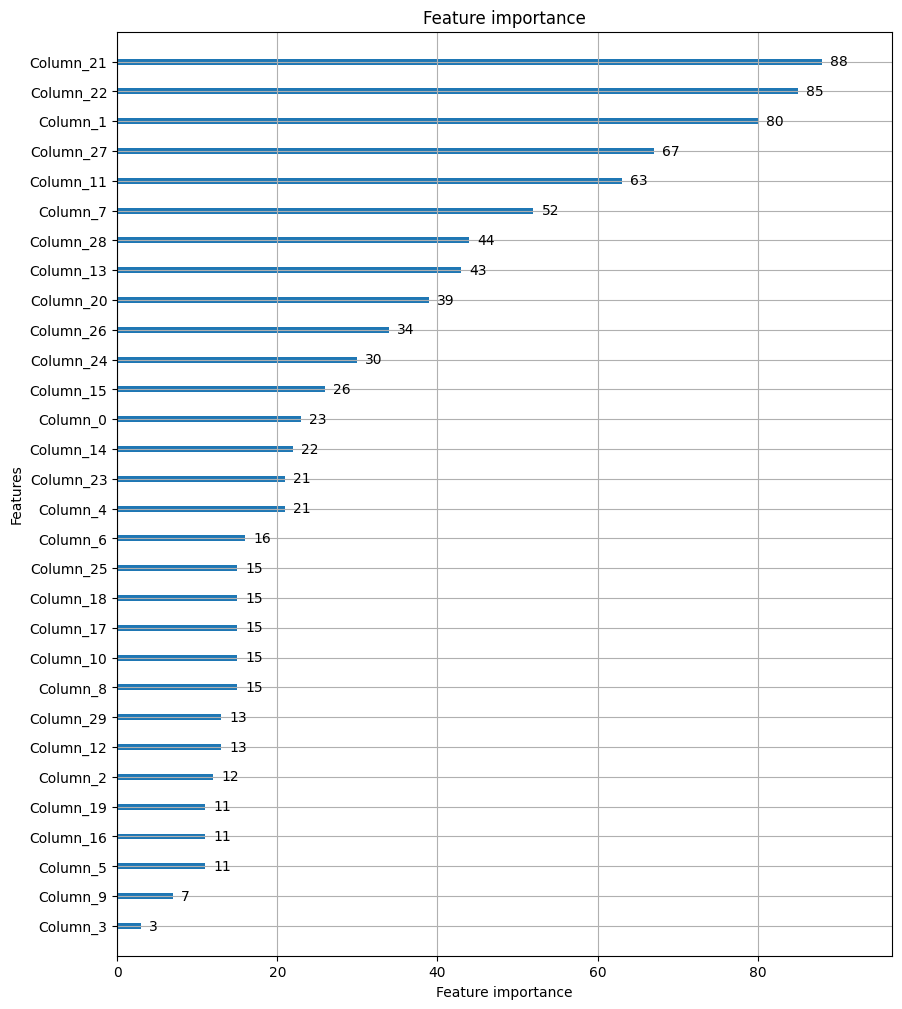

In [5]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# 7. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

Grid Search 방식은 튜닝해야 할 하이퍼 파라미터 개수가 많을 경우 최적화 수행 시간이 오래 걸린다. 여기에 개별 하이퍼 파라미터 값의 범위가 넓거나 학습 데이터가 대용량일 경우에는 최적화 시간이 더욱 늘어나게 된다.
특히 XGBoost나 LightGBM은 하이퍼 파라미터의 개수가 다른 알고리즘에 비해 많아 Grid Search 기반의 최적화는 아쉬운 상황이 될 수 있고, Grid Search 방식보다는 **베이지안 최적화 기법**을 많이 사용한다.

### 베이지안 최적화 개요

* 목적 함수 식을 제대로 알 수 없는 블랙 박스 형태의 함수에서 최대 또는 최소 함수 반환 값을 만드는 최적 입력값을 가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식

**Step 1** : 최초에는 랜덤하게 하이퍼 파라미터들을 샘플링하고 성능 결과를 관측한다
    
**Step 2** : 관측된 값을 기반으로 대체 모델은 최적 함수를 추정한다
    
**Step 3** : 추정된 최적 함수를 기반으로 획득 함수(Acquisition Function)는 다음으로 관측할 하이퍼 파라미터 값을 계산한다
    
**Step 4** : 획득 함수로부터 전달된 하이퍼 파라미터를 수행하여 관측된 값을 기반으로 대체 모델은 갱신되어 다시 최적 함수를 예측 추정한다

### HyperOpt 사용하기

1. 입력 변수명과 입력값의 검색 공간(Search Space) 설정
2. 목적 함수(Objective Function) 설정
3. 목적 함수의 반환 최솟값을 가지는 최적 입력값을 유추

In [6]:
from hyperopt import hp

# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

# hp.uniform(label, low, high, q) : label로 지정된 입력값 변수 검색 공간을 최솟값 low에서 최댓값 high까지 q의 간격을 가지고 설정
# hp.uniform(label, low, high) : 최솟값 low에서 최댓값 high까지 정규 분포 형태의 검색 공간 설정
# hp.randint(label, upper) : 0부터 최댓값 upper까지 random한 정숫값으로 검색 공간 설정
# hp.loguniform(label, low, high) : exp(uniform(low, high))값을 반환하고, 반환 값의 log 변환된 값이 정규 분포 형태의 검색 공간 설정
# hp.choice(label, options) : 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정
#                             Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion', ['gini', 'entropy'])와 같이 설정하면
#                             입력 변수 tree_criterion의 값을 'gini'와 'entropy'로 설정하여 입력

In [7]:
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값 반환
# 목적 함수 ; x**2 - 20*y
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20 * y
    
    return retval

In [8]:
import numpy as np
from hyperopt import fmin, tpe, Trials

# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

# fn : 위에서 생성한 목적 함수인 objective_func
# space : 위에서 생성한 검색 공간 딕셔니리인 search_space
# algo : 베이지안 최적화 적용 알고리즘인 tpe.suggest (HyperOpt의 기본 최적화 알고리즘인 Tree of Parzen Estimator)
# max_eval : 최적 입력값을 찾기 위한 입력값 시도 횟수
# trials : 최적 입력값을 찾기 위해 시도한 입력값 및 해당 입력값의 목적 함수 반환값 결과를 저장하는 데 사용.
# rstate : fmin()을 수행할 때마다 동일한 결괏값을 가질 수 있도록 설정하는 랜덤 시드 값

100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 997.98trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [9]:
# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 20번의 입력값 시도(max_evals=20)로 재테스트
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1538.43trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [10]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값}와 같은 딕셔너리
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [11]:
# Trials 객체의 vals 속성에 {'입력변수명': 개별 수행 시마다 입력된 값 리스트} 형태로 저장
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [12]:
import pandas as pd

# results에서 loss 키 값에 해당하는 벨류들을 추출하여 lsit로 생성
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


### HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size = 0.2, random_state = 156 )

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)

In [14]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),               # max_depth : 5에서 20까지 1간격
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),  # min_child_weight : 1에서 2까지 1간격
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),       # learning_rate : 0.01에서 0.2 사이 정규 분포된 값
                    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1)      # colsample_bytree : 0.5에서 1 사이
                    }

In [15]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators = 100,
                            max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            learinig_rate = search_space['learning_rate'],
                            colsample_bytree = search_space['colsample_bytree'],
                            eval_metric = 'logloss'
                            )
    
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring = 'accuracy', cv = 3)
    
    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK}

In [16]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn = objective_func, space = xgb_search_space, algo = tpe.suggest, max_evals = 50, trials = trial_val, rstate = np.random.default_rng(seed=9))
print('best:', best)

[14:43:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

[14:43:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767:                     
Parameters: { "learinig_rate" } are not used.

In [17]:
print('colsample_bytree: {0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'
      .format(round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree: 0.58523, learning_rate:0.03369, max_depth:19, min_child_weight:2


In [18]:
xgb_wrapper = XGBClassifier(n_estimators = 400,
                            learinig_rate = round(best['learning_rate'], 5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'], 5)
                            )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[14:43:09] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "learinig_rate" } are not used.

[0]	validation_0-logloss:0.46780	validation_1-logloss:0.53951
[1]	validation_0-logloss:0.33860	validation_1-logloss:0.45055
[2]	validation_0-logloss:0.25480	validation_1-logloss:0.38982
[3]	validation_0-logloss:0.19908	validation_1-logloss:0.36525
[4]	validation_0-logloss:0.15836	validation_1-logloss:0.34947
[5]	validation_0-logloss:0.12976	validation_1-logloss:0.32888
[6]	validation_0-logloss:0.10826	validation_1-logloss:0.31932
[7]	validation_0-logloss:0.09207	validation_1-logloss:0.31374
[8]	validation_0-logloss:0.07998	validation_1-logloss:0.31144
[9]	validation_0-logloss:0.07041	validation_1-logloss:0.31102
[10]	validation_0-logloss:0.06253	validation_1-logloss:0.29976
[11]	validation_0-logloss:0.05441	validation_1-logloss:0.28635
[12]	validation_0-logloss:0.04956	validation_1-logloss:0.27191
[13]	validation_0-logloss:0.04463	validation

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


# 8. 분류 실습 - 캐글 산탄데르 고객 만족 예측

### 데이터 전처리

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./Dataset/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [20]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [21]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [22]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [23]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355
[12]	validation_0-auc:0.83976	validation_1-auc:0.81336
[13]	validation_0-auc:0.84038	validation_1-auc:0.81365
[14]	validation_0-auc:0.84176	validation_1-auc:0.81419
[15]	validation_0-auc:0.84306	validation_1-auc:0.81586
[16]	validation_0-auc:0.84343	validation_1-auc:0.81610
[17]	validation_0-auc:0.84373	validation_1-auc:0.81584
[18]	validation_0-au

[149]	validation_0-auc:0.90500	validation_1-auc:0.83353
[150]	validation_0-auc:0.90513	validation_1-auc:0.83352
[151]	validation_0-auc:0.90531	validation_1-auc:0.83349
[152]	validation_0-auc:0.90548	validation_1-auc:0.83349
[153]	validation_0-auc:0.90551	validation_1-auc:0.83351
[154]	validation_0-auc:0.90563	validation_1-auc:0.83348
[155]	validation_0-auc:0.90572	validation_1-auc:0.83343
[156]	validation_0-auc:0.90579	validation_1-auc:0.83344
[157]	validation_0-auc:0.90591	validation_1-auc:0.83345
[158]	validation_0-auc:0.90621	validation_1-auc:0.83355
[159]	validation_0-auc:0.90630	validation_1-auc:0.83359
[160]	validation_0-auc:0.90643	validation_1-auc:0.83356
[161]	validation_0-auc:0.90657	validation_1-auc:0.83352
[162]	validation_0-auc:0.90672	validation_1-auc:0.83346
[163]	validation_0-auc:0.90694	validation_1-auc:0.83347
[164]	validation_0-auc:0.90714	validation_1-auc:0.83343
[165]	validation_0-auc:0.90720	validation_1-auc:0.83343
[166]	validation_0-auc:0.90727	validation_1-auc:

In [27]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),                # max_depth는 5에서 15까지 1 간격
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),   # min_child_weight는 1에서 6까지 1 간격
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),  # colsample_bytree는 0.5에서 0.95 사이
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)}        # learning_rate는 0.01에서 0.2 사이 정규 분포

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# fmin()에서 호출 시 search_space 값으로 XGBClassifier 교차 검증 학습 후 -1*roc_auc 평균 값을 반환
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100,
                            max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            colsample_bytree = search_space['colsample_bytree'],
                            learning_rate = search_space['learning_rate']
                            )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf = KFold(n_splits = 3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [29]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn = objective_func, space = xgb_search_space, algo = tpe.suggest, max_evals = 50, trials = trials, rstate=np.random.default_rng(seed=30))
print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81678	validation_1-auc:0.79160                                                                  
[1]	validation_0-auc:0.82454	validation_1-auc:0.79688                                                                  
[2]	validation_0-auc:0.83323	validation_1-auc:0.80572                                                                  
[3]	validation_0-auc:0.83854	validation_1-auc:0.81095                                                                  
[4]	validation_0-auc:0.83847	validation_1-auc:0.80989                                                                  
[5]	validation_0-auc:0.83879	validation_1-auc:0.80978                                                                  
[6]	validation_0-auc:0.84053	validation_1-auc:0.81042                                                                  
[7]	validation_0-auc:0.84129	validation_1-auc:0.81116                                                                  
[8]	validation_0-auc:0.84224	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81645	validation_1-auc:0.80415                                                                  
[1]	validation_0-auc:0.82149	validation_1-auc:0.80712                                                                  
[2]	validation_0-auc:0.83100	validation_1-auc:0.82058                                                                  
[3]	validation_0-auc:0.83162	validation_1-auc:0.81977                                                                  
[4]	validation_0-auc:0.83682	validation_1-auc:0.81846                                                                  
[5]	validation_0-auc:0.83858	validation_1-auc:0.82111                                                                  
[6]	validation_0-auc:0.84021	validation_1-auc:0.82048                                                                  
[7]	validation_0-auc:0.84093	validation_1-auc:0.82130                                                                  
[8]	validation_0-auc:0.84181	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82722	validation_1-auc:0.81055                                                                  
[1]	validation_0-auc:0.83004	validation_1-auc:0.81294                                                                  
[2]	validation_0-auc:0.83657	validation_1-auc:0.81821                                                                  
[3]	validation_0-auc:0.83902	validation_1-auc:0.81736                                                                  
[4]	validation_0-auc:0.84061	validation_1-auc:0.81876                                                                  
[5]	validation_0-auc:0.84373	validation_1-auc:0.82262                                                                  
[6]	validation_0-auc:0.84346	validation_1-auc:0.82117                                                                  
[7]	validation_0-auc:0.84401	validation_1-auc:0.82159                                                                  
[8]	validation_0-auc:0.84546	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82774	validation_1-auc:0.80070                                                                  
[1]	validation_0-auc:0.83281	validation_1-auc:0.80392                                                                  
[2]	validation_0-auc:0.83808	validation_1-auc:0.80674                                                                  
[3]	validation_0-auc:0.84214	validation_1-auc:0.80910                                                                  
[4]	validation_0-auc:0.84461	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84588	validation_1-auc:0.81084                                                                  
[6]	validation_0-auc:0.84962	validation_1-auc:0.81556                                                                  
[7]	validation_0-auc:0.85244	validation_1-auc:0.81731                                                                  
[8]	validation_0-auc:0.85330	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82128	validation_1-auc:0.80603                                                                  
[1]	validation_0-auc:0.82734	validation_1-auc:0.80820                                                                  
[2]	validation_0-auc:0.83693	validation_1-auc:0.81837                                                                  
[3]	validation_0-auc:0.84076	validation_1-auc:0.82377                                                                  
[4]	validation_0-auc:0.84675	validation_1-auc:0.82426                                                                  
[5]	validation_0-auc:0.84979	validation_1-auc:0.82363                                                                  
[6]	validation_0-auc:0.85384	validation_1-auc:0.82628                                                                  
[7]	validation_0-auc:0.85475	validation_1-auc:0.82713                                                                  
[8]	validation_0-auc:0.85587	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83112	validation_1-auc:0.81268                                                                  
[1]	validation_0-auc:0.83682	validation_1-auc:0.81355                                                                  
[2]	validation_0-auc:0.84258	validation_1-auc:0.81920                                                                  
[3]	validation_0-auc:0.84275	validation_1-auc:0.81851                                                                  
[4]	validation_0-auc:0.84851	validation_1-auc:0.81928                                                                  
[5]	validation_0-auc:0.85510	validation_1-auc:0.82100                                                                  
[6]	validation_0-auc:0.85611	validation_1-auc:0.82251                                                                  
[7]	validation_0-auc:0.85814	validation_1-auc:0.82231                                                                  
[8]	validation_0-auc:0.85953	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82657	validation_1-auc:0.80149                                                                  
[1]	validation_0-auc:0.83724	validation_1-auc:0.80530                                                                  
[2]	validation_0-auc:0.84620	validation_1-auc:0.81009                                                                  
[3]	validation_0-auc:0.84867	validation_1-auc:0.81020                                                                  
[4]	validation_0-auc:0.85292	validation_1-auc:0.81531                                                                  
[5]	validation_0-auc:0.85540	validation_1-auc:0.81681                                                                  
[6]	validation_0-auc:0.85916	validation_1-auc:0.81716                                                                  
[7]	validation_0-auc:0.86259	validation_1-auc:0.81789                                                                  
[8]	validation_0-auc:0.86617	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82424	validation_1-auc:0.80450                                                                  
[1]	validation_0-auc:0.83668	validation_1-auc:0.81505                                                                  
[2]	validation_0-auc:0.84661	validation_1-auc:0.82324                                                                  
[3]	validation_0-auc:0.84859	validation_1-auc:0.82247                                                                  
[4]	validation_0-auc:0.85266	validation_1-auc:0.82327                                                                  
[5]	validation_0-auc:0.85659	validation_1-auc:0.82284                                                                  
[6]	validation_0-auc:0.86155	validation_1-auc:0.82378                                                                  
[7]	validation_0-auc:0.86509	validation_1-auc:0.82397                                                                  
[8]	validation_0-auc:0.87084	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83493	validation_1-auc:0.81063                                                                  
[1]	validation_0-auc:0.84197	validation_1-auc:0.81316                                                                  
[2]	validation_0-auc:0.85026	validation_1-auc:0.81739                                                                  
[3]	validation_0-auc:0.85484	validation_1-auc:0.81605                                                                  
[4]	validation_0-auc:0.85947	validation_1-auc:0.81763                                                                  
[5]	validation_0-auc:0.86117	validation_1-auc:0.81876                                                                  
[6]	validation_0-auc:0.86492	validation_1-auc:0.82089                                                                  
[7]	validation_0-auc:0.86831	validation_1-auc:0.82248                                                                  
[8]	validation_0-auc:0.87071	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82822	validation_1-auc:0.80085                                                                  
[1]	validation_0-auc:0.83452	validation_1-auc:0.80298                                                                  
[2]	validation_0-auc:0.83879	validation_1-auc:0.80562                                                                  
[3]	validation_0-auc:0.84177	validation_1-auc:0.80715                                                                  
[4]	validation_0-auc:0.84381	validation_1-auc:0.80986                                                                  
[5]	validation_0-auc:0.84400	validation_1-auc:0.80852                                                                  
[6]	validation_0-auc:0.84627	validation_1-auc:0.81028                                                                  
[7]	validation_0-auc:0.85133	validation_1-auc:0.81525                                                                  
[8]	validation_0-auc:0.85175	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82234	validation_1-auc:0.80555                                                                  
[1]	validation_0-auc:0.82821	validation_1-auc:0.80812                                                                  
[2]	validation_0-auc:0.83272	validation_1-auc:0.81079                                                                  
[3]	validation_0-auc:0.83784	validation_1-auc:0.82045                                                                  
[4]	validation_0-auc:0.84577	validation_1-auc:0.82188                                                                  
[5]	validation_0-auc:0.84814	validation_1-auc:0.82236                                                                  
[6]	validation_0-auc:0.85202	validation_1-auc:0.82448                                                                  
[7]	validation_0-auc:0.85363	validation_1-auc:0.82626                                                                  
[8]	validation_0-auc:0.85501	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83132	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.83662	validation_1-auc:0.81285                                                                  
[2]	validation_0-auc:0.84048	validation_1-auc:0.81616                                                                  
[3]	validation_0-auc:0.84220	validation_1-auc:0.81680                                                                  
[4]	validation_0-auc:0.84545	validation_1-auc:0.81751                                                                  
[5]	validation_0-auc:0.85363	validation_1-auc:0.82067                                                                  
[6]	validation_0-auc:0.85464	validation_1-auc:0.82229                                                                  
[7]	validation_0-auc:0.85629	validation_1-auc:0.82187                                                                  
[8]	validation_0-auc:0.85654	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82730	validation_1-auc:0.80139                                                                  
[1]	validation_0-auc:0.84185	validation_1-auc:0.80782                                                                  
[2]	validation_0-auc:0.84905	validation_1-auc:0.81110                                                                  
[3]	validation_0-auc:0.85357	validation_1-auc:0.81297                                                                  
[4]	validation_0-auc:0.85984	validation_1-auc:0.81412                                                                  
[5]	validation_0-auc:0.86445	validation_1-auc:0.81503                                                                  
[6]	validation_0-auc:0.86836	validation_1-auc:0.81527                                                                  
[7]	validation_0-auc:0.87144	validation_1-auc:0.81559                                                                  
[8]	validation_0-auc:0.87841	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82403	validation_1-auc:0.80542                                                                  
[1]	validation_0-auc:0.83752	validation_1-auc:0.81644                                                                  
[2]	validation_0-auc:0.84646	validation_1-auc:0.82204                                                                  
[3]	validation_0-auc:0.85356	validation_1-auc:0.82355                                                                  
[4]	validation_0-auc:0.85684	validation_1-auc:0.82385                                                                  
[5]	validation_0-auc:0.86408	validation_1-auc:0.82520                                                                  
[6]	validation_0-auc:0.86996	validation_1-auc:0.82501                                                                  
[7]	validation_0-auc:0.87481	validation_1-auc:0.82853                                                                  
[8]	validation_0-auc:0.87960	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83591	validation_1-auc:0.80958                                                                  
[1]	validation_0-auc:0.84347	validation_1-auc:0.81172                                                                  
[2]	validation_0-auc:0.85065	validation_1-auc:0.81595                                                                  
[3]	validation_0-auc:0.85812	validation_1-auc:0.81956                                                                  
[4]	validation_0-auc:0.86408	validation_1-auc:0.82143                                                                  
[5]	validation_0-auc:0.86731	validation_1-auc:0.82281                                                                  
[6]	validation_0-auc:0.87105	validation_1-auc:0.82461                                                                  
[7]	validation_0-auc:0.87499	validation_1-auc:0.82682                                                                  
[8]	validation_0-auc:0.88082	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82360	validation_1-auc:0.80052                                                                  
[1]	validation_0-auc:0.82942	validation_1-auc:0.80498                                                                  
[2]	validation_0-auc:0.83477	validation_1-auc:0.80715                                                                  
[3]	validation_0-auc:0.83989	validation_1-auc:0.81232                                                                  
[4]	validation_0-auc:0.84115	validation_1-auc:0.81348                                                                  
[5]	validation_0-auc:0.84452	validation_1-auc:0.81346                                                                  
[6]	validation_0-auc:0.84443	validation_1-auc:0.81594                                                                  
[7]	validation_0-auc:0.84529	validation_1-auc:0.81613                                                                  
[8]	validation_0-auc:0.84627	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81887	validation_1-auc:0.80602                                                                  
[1]	validation_0-auc:0.82432	validation_1-auc:0.80828                                                                  
[2]	validation_0-auc:0.83499	validation_1-auc:0.82019                                                                  
[3]	validation_0-auc:0.83655	validation_1-auc:0.82047                                                                  
[4]	validation_0-auc:0.83983	validation_1-auc:0.81922                                                                  
[5]	validation_0-auc:0.84165	validation_1-auc:0.82002                                                                  
[6]	validation_0-auc:0.84634	validation_1-auc:0.82398                                                                  
[7]	validation_0-auc:0.84823	validation_1-auc:0.82655                                                                  
[8]	validation_0-auc:0.84958	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82782	validation_1-auc:0.81080                                                                  
[1]	validation_0-auc:0.83279	validation_1-auc:0.81373                                                                  
[2]	validation_0-auc:0.83821	validation_1-auc:0.81878                                                                  
[3]	validation_0-auc:0.83904	validation_1-auc:0.81824                                                                  
[4]	validation_0-auc:0.84237	validation_1-auc:0.81753                                                                  
[5]	validation_0-auc:0.84337	validation_1-auc:0.81881                                                                  
[6]	validation_0-auc:0.84812	validation_1-auc:0.82226                                                                  
[7]	validation_0-auc:0.85011	validation_1-auc:0.82227                                                                  
[8]	validation_0-auc:0.85116	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82382	validation_1-auc:0.80098                                                                  
[1]	validation_0-auc:0.83035	validation_1-auc:0.80555                                                                  
[2]	validation_0-auc:0.83743	validation_1-auc:0.80962                                                                  
[3]	validation_0-auc:0.84180	validation_1-auc:0.81318                                                                  
[4]	validation_0-auc:0.84380	validation_1-auc:0.81329                                                                  
[5]	validation_0-auc:0.84851	validation_1-auc:0.81871                                                                  
[6]	validation_0-auc:0.84902	validation_1-auc:0.82071                                                                  
[7]	validation_0-auc:0.85059	validation_1-auc:0.82073                                                                  
[8]	validation_0-auc:0.85241	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81929	validation_1-auc:0.80799                                                                  
[1]	validation_0-auc:0.83040	validation_1-auc:0.81782                                                                  
[2]	validation_0-auc:0.83763	validation_1-auc:0.82403                                                                  
[3]	validation_0-auc:0.84086	validation_1-auc:0.82409                                                                  
[4]	validation_0-auc:0.84220	validation_1-auc:0.82246                                                                  
[5]	validation_0-auc:0.84562	validation_1-auc:0.82468                                                                  
[6]	validation_0-auc:0.85105	validation_1-auc:0.82718                                                                  
[7]	validation_0-auc:0.85295	validation_1-auc:0.82708                                                                  
[8]	validation_0-auc:0.85431	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82845	validation_1-auc:0.81010                                                                  
[1]	validation_0-auc:0.83454	validation_1-auc:0.81359                                                                  
[2]	validation_0-auc:0.83987	validation_1-auc:0.81785                                                                  
[3]	validation_0-auc:0.84295	validation_1-auc:0.81776                                                                  
[4]	validation_0-auc:0.84591	validation_1-auc:0.81835                                                                  
[5]	validation_0-auc:0.85215	validation_1-auc:0.82004                                                                  
[6]	validation_0-auc:0.85504	validation_1-auc:0.82272                                                                  
[7]	validation_0-auc:0.85599	validation_1-auc:0.82258                                                                  
[8]	validation_0-auc:0.85749	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82941	validation_1-auc:0.79987                                                                  
[1]	validation_0-auc:0.83536	validation_1-auc:0.80324                                                                  
[2]	validation_0-auc:0.84188	validation_1-auc:0.80630                                                                  
[3]	validation_0-auc:0.84378	validation_1-auc:0.80640                                                                  
[4]	validation_0-auc:0.84639	validation_1-auc:0.80891                                                                  
[5]	validation_0-auc:0.85101	validation_1-auc:0.81278                                                                  
[6]	validation_0-auc:0.85342	validation_1-auc:0.81278                                                                  
[7]	validation_0-auc:0.85492	validation_1-auc:0.81311                                                                  
[8]	validation_0-auc:0.85831	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82501	validation_1-auc:0.80482                                                                  
[1]	validation_0-auc:0.82829	validation_1-auc:0.80807                                                                  
[2]	validation_0-auc:0.83970	validation_1-auc:0.82030                                                                  
[3]	validation_0-auc:0.84190	validation_1-auc:0.81994                                                                  
[4]	validation_0-auc:0.84854	validation_1-auc:0.81987                                                                  
[5]	validation_0-auc:0.85006	validation_1-auc:0.82088                                                                  
[6]	validation_0-auc:0.85222	validation_1-auc:0.82112                                                                  
[7]	validation_0-auc:0.85523	validation_1-auc:0.82275                                                                  
[8]	validation_0-auc:0.85818	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83124	validation_1-auc:0.81038                                                                  
[1]	validation_0-auc:0.83818	validation_1-auc:0.81239                                                                  
[2]	validation_0-auc:0.84484	validation_1-auc:0.81708                                                                  
[3]	validation_0-auc:0.84677	validation_1-auc:0.81698                                                                  
[4]	validation_0-auc:0.84693	validation_1-auc:0.81728                                                                  
[5]	validation_0-auc:0.84854	validation_1-auc:0.81836                                                                  
[6]	validation_0-auc:0.85208	validation_1-auc:0.81890                                                                  
[7]	validation_0-auc:0.85396	validation_1-auc:0.81944                                                                  
[8]	validation_0-auc:0.85633	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81859	validation_1-auc:0.79401                                                                  
[1]	validation_0-auc:0.82667	validation_1-auc:0.79829                                                                  
[2]	validation_0-auc:0.83794	validation_1-auc:0.81041                                                                  
[3]	validation_0-auc:0.83969	validation_1-auc:0.81330                                                                  
[4]	validation_0-auc:0.84122	validation_1-auc:0.81361                                                                  
[5]	validation_0-auc:0.84405	validation_1-auc:0.81629                                                                  
[6]	validation_0-auc:0.84543	validation_1-auc:0.81610                                                                  
[7]	validation_0-auc:0.84682	validation_1-auc:0.81596                                                                  
[8]	validation_0-auc:0.84842	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81571	validation_1-auc:0.80310                                                                  
[1]	validation_0-auc:0.82505	validation_1-auc:0.81416                                                                  
[2]	validation_0-auc:0.83257	validation_1-auc:0.82051                                                                  
[3]	validation_0-auc:0.83604	validation_1-auc:0.82125                                                                  
[4]	validation_0-auc:0.83892	validation_1-auc:0.82266                                                                  
[5]	validation_0-auc:0.84072	validation_1-auc:0.82336                                                                  
[6]	validation_0-auc:0.84284	validation_1-auc:0.82432                                                                  
[7]	validation_0-auc:0.84337	validation_1-auc:0.82469                                                                  
[8]	validation_0-auc:0.84714	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82584	validation_1-auc:0.81158                                                                  
[1]	validation_0-auc:0.83112	validation_1-auc:0.81209                                                                  
[2]	validation_0-auc:0.83722	validation_1-auc:0.81634                                                                  
[3]	validation_0-auc:0.83980	validation_1-auc:0.81677                                                                  
[4]	validation_0-auc:0.84295	validation_1-auc:0.82161                                                                  
[5]	validation_0-auc:0.84318	validation_1-auc:0.82100                                                                  
[6]	validation_0-auc:0.84531	validation_1-auc:0.82196                                                                  
[7]	validation_0-auc:0.84837	validation_1-auc:0.82370                                                                  
[8]	validation_0-auc:0.85030	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82870	validation_1-auc:0.80113                                                                  
[1]	validation_0-auc:0.84042	validation_1-auc:0.80454                                                                  
[2]	validation_0-auc:0.84916	validation_1-auc:0.81057                                                                  
[3]	validation_0-auc:0.85325	validation_1-auc:0.81254                                                                  
[4]	validation_0-auc:0.85792	validation_1-auc:0.81275                                                                  
[5]	validation_0-auc:0.86202	validation_1-auc:0.81323                                                                  
[6]	validation_0-auc:0.86395	validation_1-auc:0.81336                                                                  
[7]	validation_0-auc:0.86749	validation_1-auc:0.81374                                                                  
[8]	validation_0-auc:0.87323	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82341	validation_1-auc:0.80486                                                                  
[1]	validation_0-auc:0.83839	validation_1-auc:0.81601                                                                  
[2]	validation_0-auc:0.84879	validation_1-auc:0.82308                                                                  
[3]	validation_0-auc:0.85149	validation_1-auc:0.82135                                                                  
[4]	validation_0-auc:0.85814	validation_1-auc:0.82424                                                                  
[5]	validation_0-auc:0.86360	validation_1-auc:0.82476                                                                  
[6]	validation_0-auc:0.86721	validation_1-auc:0.82451                                                                  
[7]	validation_0-auc:0.86953	validation_1-auc:0.82344                                                                  
[8]	validation_0-auc:0.87521	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83765	validation_1-auc:0.80741                                                                  
[1]	validation_0-auc:0.84163	validation_1-auc:0.80971                                                                  
[2]	validation_0-auc:0.84938	validation_1-auc:0.81441                                                                  
[3]	validation_0-auc:0.85706	validation_1-auc:0.81809                                                                  
[4]	validation_0-auc:0.86035	validation_1-auc:0.81815                                                                  
[5]	validation_0-auc:0.86430	validation_1-auc:0.81808                                                                  
[6]	validation_0-auc:0.86773	validation_1-auc:0.81886                                                                  
[7]	validation_0-auc:0.87220	validation_1-auc:0.82137                                                                  
[8]	validation_0-auc:0.87487	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82926	validation_1-auc:0.80086                                                                  
[1]	validation_0-auc:0.83503	validation_1-auc:0.80194                                                                  
[2]	validation_0-auc:0.83779	validation_1-auc:0.80277                                                                  
[3]	validation_0-auc:0.84273	validation_1-auc:0.80541                                                                  
[4]	validation_0-auc:0.84638	validation_1-auc:0.80658                                                                  
[5]	validation_0-auc:0.84766	validation_1-auc:0.80842                                                                  
[6]	validation_0-auc:0.84894	validation_1-auc:0.80814                                                                  
[7]	validation_0-auc:0.84896	validation_1-auc:0.80815                                                                  
[8]	validation_0-auc:0.85010	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82638	validation_1-auc:0.80391                                                                  
[1]	validation_0-auc:0.83157	validation_1-auc:0.80608                                                                  
[2]	validation_0-auc:0.83569	validation_1-auc:0.80795                                                                  
[3]	validation_0-auc:0.83616	validation_1-auc:0.80842                                                                  
[4]	validation_0-auc:0.83968	validation_1-auc:0.81129                                                                  
[5]	validation_0-auc:0.84205	validation_1-auc:0.81258                                                                  
[6]	validation_0-auc:0.84599	validation_1-auc:0.81709                                                                  
[7]	validation_0-auc:0.84654	validation_1-auc:0.81898                                                                  
[8]	validation_0-auc:0.84709	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83743	validation_1-auc:0.80882                                                                  
[1]	validation_0-auc:0.84069	validation_1-auc:0.81092                                                                  
[2]	validation_0-auc:0.84404	validation_1-auc:0.81243                                                                  
[3]	validation_0-auc:0.84516	validation_1-auc:0.81214                                                                  
[4]	validation_0-auc:0.84882	validation_1-auc:0.81454                                                                  
[5]	validation_0-auc:0.85044	validation_1-auc:0.81520                                                                  
[6]	validation_0-auc:0.85208	validation_1-auc:0.81612                                                                  
[7]	validation_0-auc:0.85273	validation_1-auc:0.81567                                                                  
[8]	validation_0-auc:0.85445	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83081	validation_1-auc:0.80035                                                                  
[1]	validation_0-auc:0.84305	validation_1-auc:0.80465                                                                  
[2]	validation_0-auc:0.85330	validation_1-auc:0.80929                                                                  
[3]	validation_0-auc:0.85737	validation_1-auc:0.81038                                                                  
[4]	validation_0-auc:0.86174	validation_1-auc:0.81116                                                                  
[5]	validation_0-auc:0.86638	validation_1-auc:0.81160                                                                  
[6]	validation_0-auc:0.87146	validation_1-auc:0.81177                                                                  
[7]	validation_0-auc:0.87577	validation_1-auc:0.81297                                                                  
[8]	validation_0-auc:0.88057	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82655	validation_1-auc:0.80355                                                                  
[1]	validation_0-auc:0.83570	validation_1-auc:0.80849                                                                  
[2]	validation_0-auc:0.84910	validation_1-auc:0.81880                                                                  
[3]	validation_0-auc:0.85599	validation_1-auc:0.81944                                                                  
[4]	validation_0-auc:0.86283	validation_1-auc:0.82142                                                                  
[5]	validation_0-auc:0.86829	validation_1-auc:0.82297                                                                  
[6]	validation_0-auc:0.87214	validation_1-auc:0.82268                                                                  
[7]	validation_0-auc:0.87495	validation_1-auc:0.82277                                                                  
[8]	validation_0-auc:0.88032	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83909	validation_1-auc:0.80712                                                                  
[1]	validation_0-auc:0.84424	validation_1-auc:0.80999                                                                  
[2]	validation_0-auc:0.85148	validation_1-auc:0.81448                                                                  
[3]	validation_0-auc:0.85960	validation_1-auc:0.81840                                                                  
[4]	validation_0-auc:0.86404	validation_1-auc:0.81879                                                                  
[5]	validation_0-auc:0.86883	validation_1-auc:0.81822                                                                  
[6]	validation_0-auc:0.87258	validation_1-auc:0.81931                                                                  
[7]	validation_0-auc:0.87735	validation_1-auc:0.82000                                                                  
[8]	validation_0-auc:0.88343	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82501	validation_1-auc:0.80157                                                                  
[1]	validation_0-auc:0.83042	validation_1-auc:0.80420                                                                  
[2]	validation_0-auc:0.83435	validation_1-auc:0.80618                                                                  
[3]	validation_0-auc:0.83581	validation_1-auc:0.80731                                                                  
[4]	validation_0-auc:0.83811	validation_1-auc:0.80913                                                                  
[5]	validation_0-auc:0.84054	validation_1-auc:0.81026                                                                  
[6]	validation_0-auc:0.84116	validation_1-auc:0.81225                                                                  
[7]	validation_0-auc:0.84222	validation_1-auc:0.81344                                                                  
[8]	validation_0-auc:0.84223	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82045	validation_1-auc:0.80565                                                                  
[1]	validation_0-auc:0.82472	validation_1-auc:0.80795                                                                  
[2]	validation_0-auc:0.82938	validation_1-auc:0.80989                                                                  
[3]	validation_0-auc:0.83045	validation_1-auc:0.80988                                                                  
[4]	validation_0-auc:0.83511	validation_1-auc:0.81336                                                                  
[5]	validation_0-auc:0.83900	validation_1-auc:0.81655                                                                  
[6]	validation_0-auc:0.84141	validation_1-auc:0.81779                                                                  
[7]	validation_0-auc:0.84134	validation_1-auc:0.81913                                                                  
[8]	validation_0-auc:0.84333	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82931	validation_1-auc:0.80983                                                                  
[1]	validation_0-auc:0.83428	validation_1-auc:0.81236                                                                  
[2]	validation_0-auc:0.83694	validation_1-auc:0.81439                                                                  
[3]	validation_0-auc:0.83882	validation_1-auc:0.81486                                                                  
[4]	validation_0-auc:0.84300	validation_1-auc:0.81618                                                                  
[5]	validation_0-auc:0.84622	validation_1-auc:0.81941                                                                  
[6]	validation_0-auc:0.84618	validation_1-auc:0.82124                                                                  
[7]	validation_0-auc:0.84786	validation_1-auc:0.82226                                                                  
[8]	validation_0-auc:0.84799	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82778	validation_1-auc:0.80157                                                                  
[1]	validation_0-auc:0.83272	validation_1-auc:0.80312                                                                  
[2]	validation_0-auc:0.83748	validation_1-auc:0.80497                                                                  
[3]	validation_0-auc:0.84045	validation_1-auc:0.80724                                                                  
[4]	validation_0-auc:0.84129	validation_1-auc:0.80609                                                                  
[5]	validation_0-auc:0.84503	validation_1-auc:0.80930                                                                  
[6]	validation_0-auc:0.84734	validation_1-auc:0.81015                                                                  
[7]	validation_0-auc:0.84915	validation_1-auc:0.81005                                                                  
[8]	validation_0-auc:0.85081	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82222	validation_1-auc:0.80496                                                                  
[1]	validation_0-auc:0.82817	validation_1-auc:0.80698                                                                  
[2]	validation_0-auc:0.83337	validation_1-auc:0.81099                                                                  
[3]	validation_0-auc:0.83936	validation_1-auc:0.81794                                                                  
[4]	validation_0-auc:0.84110	validation_1-auc:0.81937                                                                  
[5]	validation_0-auc:0.84228	validation_1-auc:0.81867                                                                  
[6]	validation_0-auc:0.84523	validation_1-auc:0.81975                                                                  
[7]	validation_0-auc:0.84827	validation_1-auc:0.82163                                                                  
[8]	validation_0-auc:0.84932	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83623	validation_1-auc:0.80838                                                                  
[1]	validation_0-auc:0.83890	validation_1-auc:0.80926                                                                  
[2]	validation_0-auc:0.84444	validation_1-auc:0.81279                                                                  
[3]	validation_0-auc:0.84560	validation_1-auc:0.81281                                                                  
[4]	validation_0-auc:0.84649	validation_1-auc:0.81271                                                                  
[5]	validation_0-auc:0.84888	validation_1-auc:0.81534                                                                  
[6]	validation_0-auc:0.85065	validation_1-auc:0.81502                                                                  
[7]	validation_0-auc:0.85202	validation_1-auc:0.81481                                                                  
[8]	validation_0-auc:0.85414	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82021	validation_1-auc:0.79505                                                                  
[1]	validation_0-auc:0.82806	validation_1-auc:0.80351                                                                  
[2]	validation_0-auc:0.83238	validation_1-auc:0.80601                                                                  
[3]	validation_0-auc:0.83499	validation_1-auc:0.80962                                                                  
[4]	validation_0-auc:0.83677	validation_1-auc:0.81199                                                                  
[5]	validation_0-auc:0.83841	validation_1-auc:0.81201                                                                  
[6]	validation_0-auc:0.83914	validation_1-auc:0.81200                                                                  
[7]	validation_0-auc:0.83959	validation_1-auc:0.81241                                                                  
[8]	validation_0-auc:0.84177	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81725	validation_1-auc:0.80400                                                                  
[1]	validation_0-auc:0.81999	validation_1-auc:0.80754                                                                  
[2]	validation_0-auc:0.83016	validation_1-auc:0.81754                                                                  
[3]	validation_0-auc:0.83108	validation_1-auc:0.82032                                                                  
[4]	validation_0-auc:0.83544	validation_1-auc:0.81911                                                                  
[5]	validation_0-auc:0.83613	validation_1-auc:0.81869                                                                  
[6]	validation_0-auc:0.83830	validation_1-auc:0.82075                                                                  
[7]	validation_0-auc:0.83974	validation_1-auc:0.82253                                                                  
[8]	validation_0-auc:0.84004	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82490	validation_1-auc:0.81186                                                                  
[1]	validation_0-auc:0.82910	validation_1-auc:0.81454                                                                  
[2]	validation_0-auc:0.83377	validation_1-auc:0.81972                                                                  
[3]	validation_0-auc:0.83471	validation_1-auc:0.81846                                                                  
[4]	validation_0-auc:0.83471	validation_1-auc:0.81885                                                                  
[5]	validation_0-auc:0.83812	validation_1-auc:0.82288                                                                  
[6]	validation_0-auc:0.83971	validation_1-auc:0.82307                                                                  
[7]	validation_0-auc:0.84014	validation_1-auc:0.82288                                                                  
[8]	validation_0-auc:0.84139	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83048	validation_1-auc:0.80143                                                                  
[1]	validation_0-auc:0.83981	validation_1-auc:0.80512                                                                  
[2]	validation_0-auc:0.85102	validation_1-auc:0.80824                                                                  
[3]	validation_0-auc:0.85308	validation_1-auc:0.81067                                                                  
[4]	validation_0-auc:0.85771	validation_1-auc:0.81288                                                                  
[5]	validation_0-auc:0.86217	validation_1-auc:0.81610                                                                  
[6]	validation_0-auc:0.86888	validation_1-auc:0.82021                                                                  
[7]	validation_0-auc:0.87386	validation_1-auc:0.82000                                                                  
[8]	validation_0-auc:0.87710	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82236	validation_1-auc:0.80724                                                                  
[1]	validation_0-auc:0.83855	validation_1-auc:0.81789                                                                  
[2]	validation_0-auc:0.84726	validation_1-auc:0.82367                                                                  
[3]	validation_0-auc:0.85267	validation_1-auc:0.82415                                                                  
[4]	validation_0-auc:0.85865	validation_1-auc:0.82341                                                                  
[5]	validation_0-auc:0.86479	validation_1-auc:0.82370                                                                  
[6]	validation_0-auc:0.87189	validation_1-auc:0.82514                                                                  
[7]	validation_0-auc:0.87679	validation_1-auc:0.82556                                                                  
[8]	validation_0-auc:0.88103	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83231	validation_1-auc:0.80900                                                                  
[1]	validation_0-auc:0.84225	validation_1-auc:0.81175                                                                  
[2]	validation_0-auc:0.84865	validation_1-auc:0.81803                                                                  
[3]	validation_0-auc:0.85375	validation_1-auc:0.81768                                                                  
[4]	validation_0-auc:0.86245	validation_1-auc:0.81781                                                                  
[5]	validation_0-auc:0.86822	validation_1-auc:0.81936                                                                  
[6]	validation_0-auc:0.87346	validation_1-auc:0.82192                                                                  
[7]	validation_0-auc:0.87722	validation_1-auc:0.82139                                                                  
[8]	validation_0-auc:0.88085	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82369	validation_1-auc:0.80051                                                                  
[1]	validation_0-auc:0.83012	validation_1-auc:0.80430                                                                  
[2]	validation_0-auc:0.83515	validation_1-auc:0.80736                                                                  
[3]	validation_0-auc:0.83743	validation_1-auc:0.81050                                                                  
[4]	validation_0-auc:0.83961	validation_1-auc:0.81412                                                                  
[5]	validation_0-auc:0.84130	validation_1-auc:0.81356                                                                  
[6]	validation_0-auc:0.84316	validation_1-auc:0.81346                                                                  
[7]	validation_0-auc:0.84450	validation_1-auc:0.81398                                                                  
[8]	validation_0-auc:0.84570	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81813	validation_1-auc:0.80285                                                                  
[1]	validation_0-auc:0.82354	validation_1-auc:0.80794                                                                  
[2]	validation_0-auc:0.83438	validation_1-auc:0.81953                                                                  
[3]	validation_0-auc:0.83530	validation_1-auc:0.81884                                                                  
[4]	validation_0-auc:0.84010	validation_1-auc:0.82108                                                                  
[5]	validation_0-auc:0.84164	validation_1-auc:0.82378                                                                  
[6]	validation_0-auc:0.84374	validation_1-auc:0.82383                                                                  
[7]	validation_0-auc:0.84516	validation_1-auc:0.82512                                                                  
[8]	validation_0-auc:0.84605	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82823	validation_1-auc:0.80982                                                                  
[1]	validation_0-auc:0.83305	validation_1-auc:0.81221                                                                  
[2]	validation_0-auc:0.83843	validation_1-auc:0.81752                                                                  
[3]	validation_0-auc:0.83893	validation_1-auc:0.81694                                                                  
[4]	validation_0-auc:0.83956	validation_1-auc:0.81815                                                                  
[5]	validation_0-auc:0.84156	validation_1-auc:0.81935                                                                  
[6]	validation_0-auc:0.84549	validation_1-auc:0.82289                                                                  
[7]	validation_0-auc:0.84665	validation_1-auc:0.82294                                                                  
[8]	validation_0-auc:0.84834	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83007	validation_1-auc:0.80090                                                                  
[1]	validation_0-auc:0.83903	validation_1-auc:0.80474                                                                  
[2]	validation_0-auc:0.84815	validation_1-auc:0.80742                                                                  
[3]	validation_0-auc:0.85318	validation_1-auc:0.80811                                                                  
[4]	validation_0-auc:0.85865	validation_1-auc:0.81063                                                                  
[5]	validation_0-auc:0.86027	validation_1-auc:0.81129                                                                  
[6]	validation_0-auc:0.86264	validation_1-auc:0.81163                                                                  
[7]	validation_0-auc:0.86569	validation_1-auc:0.81203                                                                  
[8]	validation_0-auc:0.86805	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82909	validation_1-auc:0.80527                                                                  
[1]	validation_0-auc:0.83375	validation_1-auc:0.80772                                                                  
[2]	validation_0-auc:0.84361	validation_1-auc:0.81841                                                                  
[3]	validation_0-auc:0.84901	validation_1-auc:0.81846                                                                  
[4]	validation_0-auc:0.85490	validation_1-auc:0.81990                                                                  
[5]	validation_0-auc:0.85957	validation_1-auc:0.82105                                                                  
[6]	validation_0-auc:0.86485	validation_1-auc:0.82222                                                                  
[7]	validation_0-auc:0.86759	validation_1-auc:0.82318                                                                  
[8]	validation_0-auc:0.87234	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.84134	validation_1-auc:0.80848                                                                  
[1]	validation_0-auc:0.84646	validation_1-auc:0.80929                                                                  
[2]	validation_0-auc:0.85243	validation_1-auc:0.81404                                                                  
[3]	validation_0-auc:0.85704	validation_1-auc:0.81656                                                                  
[4]	validation_0-auc:0.86187	validation_1-auc:0.81779                                                                  
[5]	validation_0-auc:0.86359	validation_1-auc:0.81848                                                                  
[6]	validation_0-auc:0.86660	validation_1-auc:0.81648                                                                  
[7]	validation_0-auc:0.86885	validation_1-auc:0.81673                                                                  
[8]	validation_0-auc:0.87072	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82778	validation_1-auc:0.80157                                                                  
[1]	validation_0-auc:0.83476	validation_1-auc:0.80299                                                                  
[2]	validation_0-auc:0.84111	validation_1-auc:0.80642                                                                  
[3]	validation_0-auc:0.84381	validation_1-auc:0.80952                                                                  
[4]	validation_0-auc:0.84647	validation_1-auc:0.80979                                                                  
[5]	validation_0-auc:0.84910	validation_1-auc:0.81182                                                                  
[6]	validation_0-auc:0.84935	validation_1-auc:0.81133                                                                  
[7]	validation_0-auc:0.85228	validation_1-auc:0.81274                                                                  
[8]	validation_0-auc:0.85444	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82222	validation_1-auc:0.80496                                                                  
[1]	validation_0-auc:0.82852	validation_1-auc:0.80666                                                                  
[2]	validation_0-auc:0.83996	validation_1-auc:0.82127                                                                  
[3]	validation_0-auc:0.84332	validation_1-auc:0.82175                                                                  
[4]	validation_0-auc:0.84579	validation_1-auc:0.82141                                                                  
[5]	validation_0-auc:0.84896	validation_1-auc:0.82209                                                                  
[6]	validation_0-auc:0.85148	validation_1-auc:0.82071                                                                  
[7]	validation_0-auc:0.85280	validation_1-auc:0.82098                                                                  
[8]	validation_0-auc:0.85453	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83623	validation_1-auc:0.80838                                                                  
[1]	validation_0-auc:0.83938	validation_1-auc:0.80897                                                                  
[2]	validation_0-auc:0.84517	validation_1-auc:0.81405                                                                  
[3]	validation_0-auc:0.84627	validation_1-auc:0.81336                                                                  
[4]	validation_0-auc:0.85037	validation_1-auc:0.81455                                                                  
[5]	validation_0-auc:0.85190	validation_1-auc:0.81394                                                                  
[6]	validation_0-auc:0.85349	validation_1-auc:0.81383                                                                  
[7]	validation_0-auc:0.85576	validation_1-auc:0.81475                                                                  
[8]	validation_0-auc:0.85879	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82393	validation_1-auc:0.80058                                                                  
[1]	validation_0-auc:0.82957	validation_1-auc:0.80477                                                                  
[2]	validation_0-auc:0.83576	validation_1-auc:0.80698                                                                  
[3]	validation_0-auc:0.83833	validation_1-auc:0.80872                                                                  
[4]	validation_0-auc:0.84034	validation_1-auc:0.81074                                                                  
[5]	validation_0-auc:0.84422	validation_1-auc:0.81386                                                                  
[6]	validation_0-auc:0.84652	validation_1-auc:0.81442                                                                  
[7]	validation_0-auc:0.84738	validation_1-auc:0.81464                                                                  
[8]	validation_0-auc:0.85035	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81964	validation_1-auc:0.80482                                                                  
[1]	validation_0-auc:0.82254	validation_1-auc:0.80783                                                                  
[2]	validation_0-auc:0.83305	validation_1-auc:0.81928                                                                  
[3]	validation_0-auc:0.83622	validation_1-auc:0.82138                                                                  
[4]	validation_0-auc:0.84001	validation_1-auc:0.82114                                                                  
[5]	validation_0-auc:0.84168	validation_1-auc:0.82236                                                                  
[6]	validation_0-auc:0.84303	validation_1-auc:0.82348                                                                  
[7]	validation_0-auc:0.84387	validation_1-auc:0.82383                                                                  
[8]	validation_0-auc:0.84501	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82723	validation_1-auc:0.81250                                                                  
[1]	validation_0-auc:0.83174	validation_1-auc:0.81422                                                                  
[2]	validation_0-auc:0.83724	validation_1-auc:0.81953                                                                  
[3]	validation_0-auc:0.83840	validation_1-auc:0.81853                                                                  
[4]	validation_0-auc:0.83849	validation_1-auc:0.81902                                                                  
[5]	validation_0-auc:0.84280	validation_1-auc:0.82300                                                                  
[6]	validation_0-auc:0.84395	validation_1-auc:0.82360                                                                  
[7]	validation_0-auc:0.84648	validation_1-auc:0.82513                                                                  
[8]	validation_0-auc:0.84701	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82528	validation_1-auc:0.80131                                                                  
[1]	validation_0-auc:0.83238	validation_1-auc:0.80233                                                                  
[2]	validation_0-auc:0.83748	validation_1-auc:0.80652                                                                  
[3]	validation_0-auc:0.84131	validation_1-auc:0.81016                                                                  
[4]	validation_0-auc:0.84361	validation_1-auc:0.81234                                                                  
[5]	validation_0-auc:0.84915	validation_1-auc:0.81515                                                                  
[6]	validation_0-auc:0.85075	validation_1-auc:0.81599                                                                  
[7]	validation_0-auc:0.85201	validation_1-auc:0.81644                                                                  
[8]	validation_0-auc:0.85316	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82071	validation_1-auc:0.80532                                                                  
[1]	validation_0-auc:0.83027	validation_1-auc:0.81588                                                                  
[2]	validation_0-auc:0.83789	validation_1-auc:0.82153                                                                  
[3]	validation_0-auc:0.84188	validation_1-auc:0.82294                                                                  
[4]	validation_0-auc:0.84394	validation_1-auc:0.82154                                                                  
[5]	validation_0-auc:0.84682	validation_1-auc:0.82539                                                                  
[6]	validation_0-auc:0.84900	validation_1-auc:0.82528                                                                  
[7]	validation_0-auc:0.85097	validation_1-auc:0.82579                                                                  
[8]	validation_0-auc:0.85236	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82843	validation_1-auc:0.81190                                                                  
[1]	validation_0-auc:0.83414	validation_1-auc:0.81420                                                                  
[2]	validation_0-auc:0.83944	validation_1-auc:0.82038                                                                  
[3]	validation_0-auc:0.84088	validation_1-auc:0.81902                                                                  
[4]	validation_0-auc:0.84366	validation_1-auc:0.82040                                                                  
[5]	validation_0-auc:0.84775	validation_1-auc:0.82458                                                                  
[6]	validation_0-auc:0.84873	validation_1-auc:0.82425                                                                  
[7]	validation_0-auc:0.85042	validation_1-auc:0.82462                                                                  
[8]	validation_0-auc:0.85220	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82387	validation_1-auc:0.80113                                                                  
[2]	validation_0-auc:0.82494	validation_1-auc:0.80181                                                                  
[3]	validation_0-auc:0.82543	validation_1-auc:0.80198                                                                  
[4]	validation_0-auc:0.82374	validation_1-auc:0.79955                                                                  
[5]	validation_0-auc:0.82828	validation_1-auc:0.80279                                                                  
[6]	validation_0-auc:0.82739	validation_1-auc:0.80226                                                                  
[7]	validation_0-auc:0.82829	validation_1-auc:0.80355                                                                  
[8]	validation_0-auc:0.82915	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81279	validation_1-auc:0.80284                                                                  
[1]	validation_0-auc:0.81582	validation_1-auc:0.80690                                                                  
[2]	validation_0-auc:0.82091	validation_1-auc:0.80963                                                                  
[3]	validation_0-auc:0.82093	validation_1-auc:0.80921                                                                  
[4]	validation_0-auc:0.82015	validation_1-auc:0.80933                                                                  
[5]	validation_0-auc:0.82015	validation_1-auc:0.80952                                                                  
[6]	validation_0-auc:0.82022	validation_1-auc:0.80904                                                                  
[7]	validation_0-auc:0.82026	validation_1-auc:0.80934                                                                  
[8]	validation_0-auc:0.82022	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82085	validation_1-auc:0.81155                                                                  
[1]	validation_0-auc:0.82440	validation_1-auc:0.81405                                                                  
[2]	validation_0-auc:0.82556	validation_1-auc:0.81514                                                                  
[3]	validation_0-auc:0.82570	validation_1-auc:0.81482                                                                  
[4]	validation_0-auc:0.82645	validation_1-auc:0.81591                                                                  
[5]	validation_0-auc:0.82725	validation_1-auc:0.81710                                                                  
[6]	validation_0-auc:0.82773	validation_1-auc:0.81707                                                                  
[7]	validation_0-auc:0.82848	validation_1-auc:0.81749                                                                  
[8]	validation_0-auc:0.82869	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81712	validation_1-auc:0.79246                                                                  
[1]	validation_0-auc:0.82853	validation_1-auc:0.80529                                                                  
[2]	validation_0-auc:0.83376	validation_1-auc:0.81011                                                                  
[3]	validation_0-auc:0.83479	validation_1-auc:0.81006                                                                  
[4]	validation_0-auc:0.83730	validation_1-auc:0.81475                                                                  
[5]	validation_0-auc:0.84043	validation_1-auc:0.81961                                                                  
[6]	validation_0-auc:0.84382	validation_1-auc:0.82165                                                                  
[7]	validation_0-auc:0.84620	validation_1-auc:0.82243                                                                  
[8]	validation_0-auc:0.84656	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81376	validation_1-auc:0.80482                                                                  
[1]	validation_0-auc:0.82359	validation_1-auc:0.81629                                                                  
[2]	validation_0-auc:0.83238	validation_1-auc:0.82395                                                                  
[3]	validation_0-auc:0.83323	validation_1-auc:0.82383                                                                  
[4]	validation_0-auc:0.83717	validation_1-auc:0.82536                                                                  
[5]	validation_0-auc:0.84080	validation_1-auc:0.82675                                                                  
[6]	validation_0-auc:0.84414	validation_1-auc:0.82792                                                                  
[7]	validation_0-auc:0.84463	validation_1-auc:0.82773                                                                  
[8]	validation_0-auc:0.84660	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82067	validation_1-auc:0.81192                                                                  
[1]	validation_0-auc:0.82565	validation_1-auc:0.81283                                                                  
[2]	validation_0-auc:0.83161	validation_1-auc:0.81916                                                                  
[3]	validation_0-auc:0.83257	validation_1-auc:0.81900                                                                  
[4]	validation_0-auc:0.83502	validation_1-auc:0.81995                                                                  
[5]	validation_0-auc:0.84129	validation_1-auc:0.82239                                                                  
[6]	validation_0-auc:0.84477	validation_1-auc:0.82441                                                                  
[7]	validation_0-auc:0.84662	validation_1-auc:0.82554                                                                  
[8]	validation_0-auc:0.84875	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82745	validation_1-auc:0.80284                                                                  
[2]	validation_0-auc:0.83434	validation_1-auc:0.81104                                                                  
[3]	validation_0-auc:0.83503	validation_1-auc:0.81125                                                                  
[4]	validation_0-auc:0.83778	validation_1-auc:0.81515                                                                  
[5]	validation_0-auc:0.84021	validation_1-auc:0.82004                                                                  
[6]	validation_0-auc:0.84295	validation_1-auc:0.82131                                                                  
[7]	validation_0-auc:0.84394	validation_1-auc:0.82204                                                                  
[8]	validation_0-auc:0.84571	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.82349	validation_1-auc:0.81628                                                                  
[2]	validation_0-auc:0.83100	validation_1-auc:0.82349                                                                  
[3]	validation_0-auc:0.83222	validation_1-auc:0.82309                                                                  
[4]	validation_0-auc:0.83661	validation_1-auc:0.82513                                                                  
[5]	validation_0-auc:0.84016	validation_1-auc:0.82640                                                                  
[6]	validation_0-auc:0.84289	validation_1-auc:0.82802                                                                  
[7]	validation_0-auc:0.84439	validation_1-auc:0.82800                                                                  
[8]	validation_0-auc:0.84622	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82555	validation_1-auc:0.81325                                                                  
[2]	validation_0-auc:0.83263	validation_1-auc:0.82286                                                                  
[3]	validation_0-auc:0.83247	validation_1-auc:0.82019                                                                  
[4]	validation_0-auc:0.83185	validation_1-auc:0.81988                                                                  
[5]	validation_0-auc:0.84014	validation_1-auc:0.82255                                                                  
[6]	validation_0-auc:0.84412	validation_1-auc:0.82388                                                                  
[7]	validation_0-auc:0.84526	validation_1-auc:0.82496                                                                  
[8]	validation_0-auc:0.84668	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.80643	validation_1-auc:0.78471                                                                  
[1]	validation_0-auc:0.82557	validation_1-auc:0.80387                                                                  
[2]	validation_0-auc:0.83317	validation_1-auc:0.81170                                                                  
[3]	validation_0-auc:0.83590	validation_1-auc:0.81215                                                                  
[4]	validation_0-auc:0.83816	validation_1-auc:0.81561                                                                  
[5]	validation_0-auc:0.84126	validation_1-auc:0.81992                                                                  
[6]	validation_0-auc:0.83820	validation_1-auc:0.81475                                                                  
[7]	validation_0-auc:0.84489	validation_1-auc:0.81997                                                                  
[8]	validation_0-auc:0.84799	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.80614	validation_1-auc:0.80564                                                                  
[1]	validation_0-auc:0.82380	validation_1-auc:0.81972                                                                  
[2]	validation_0-auc:0.82999	validation_1-auc:0.82292                                                                  
[3]	validation_0-auc:0.83213	validation_1-auc:0.82450                                                                  
[4]	validation_0-auc:0.83895	validation_1-auc:0.82489                                                                  
[5]	validation_0-auc:0.84153	validation_1-auc:0.82560                                                                  
[6]	validation_0-auc:0.84319	validation_1-auc:0.82073                                                                  
[7]	validation_0-auc:0.84748	validation_1-auc:0.82552                                                                  
[8]	validation_0-auc:0.84926	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.80374	validation_1-auc:0.79933                                                                  
[1]	validation_0-auc:0.82374	validation_1-auc:0.81358                                                                  
[2]	validation_0-auc:0.83163	validation_1-auc:0.81951                                                                  
[3]	validation_0-auc:0.83370	validation_1-auc:0.82114                                                                  
[4]	validation_0-auc:0.83704	validation_1-auc:0.82251                                                                  
[5]	validation_0-auc:0.84292	validation_1-auc:0.82335                                                                  
[6]	validation_0-auc:0.84087	validation_1-auc:0.82152                                                                  
[7]	validation_0-auc:0.84691	validation_1-auc:0.82411                                                                  
[8]	validation_0-auc:0.85000	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82528	validation_1-auc:0.80131                                                                  
[1]	validation_0-auc:0.83225	validation_1-auc:0.80257                                                                  
[2]	validation_0-auc:0.84067	validation_1-auc:0.81004                                                                  
[3]	validation_0-auc:0.84639	validation_1-auc:0.81243                                                                  
[4]	validation_0-auc:0.85146	validation_1-auc:0.81522                                                                  
[5]	validation_0-auc:0.85388	validation_1-auc:0.81918                                                                  
[6]	validation_0-auc:0.85983	validation_1-auc:0.82437                                                                  
[7]	validation_0-auc:0.86142	validation_1-auc:0.82511                                                                  
[8]	validation_0-auc:0.86511	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81871	validation_1-auc:0.80650                                                                  
[1]	validation_0-auc:0.83158	validation_1-auc:0.81657                                                                  
[2]	validation_0-auc:0.84167	validation_1-auc:0.82322                                                                  
[3]	validation_0-auc:0.84321	validation_1-auc:0.82438                                                                  
[4]	validation_0-auc:0.85170	validation_1-auc:0.82909                                                                  
[5]	validation_0-auc:0.85482	validation_1-auc:0.82757                                                                  
[6]	validation_0-auc:0.86013	validation_1-auc:0.82779                                                                  
[7]	validation_0-auc:0.86314	validation_1-auc:0.82895                                                                  
[8]	validation_0-auc:0.86809	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82833	validation_1-auc:0.81194                                                                  
[1]	validation_0-auc:0.83522	validation_1-auc:0.81423                                                                  
[2]	validation_0-auc:0.84026	validation_1-auc:0.82092                                                                  
[3]	validation_0-auc:0.84404	validation_1-auc:0.82200                                                                  
[4]	validation_0-auc:0.85078	validation_1-auc:0.82198                                                                  
[5]	validation_0-auc:0.85705	validation_1-auc:0.82274                                                                  
[6]	validation_0-auc:0.85973	validation_1-auc:0.82529                                                                  
[7]	validation_0-auc:0.86388	validation_1-auc:0.82594                                                                  
[8]	validation_0-auc:0.86686	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81712	validation_1-auc:0.79246                                                                  
[1]	validation_0-auc:0.82863	validation_1-auc:0.80541                                                                  
[2]	validation_0-auc:0.83384	validation_1-auc:0.81025                                                                  
[3]	validation_0-auc:0.83469	validation_1-auc:0.80962                                                                  
[4]	validation_0-auc:0.83609	validation_1-auc:0.81359                                                                  
[5]	validation_0-auc:0.83972	validation_1-auc:0.81918                                                                  
[6]	validation_0-auc:0.84361	validation_1-auc:0.82123                                                                  
[7]	validation_0-auc:0.84471	validation_1-auc:0.82143                                                                  
[8]	validation_0-auc:0.84539	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81376	validation_1-auc:0.80482                                                                  
[1]	validation_0-auc:0.82362	validation_1-auc:0.81598                                                                  
[2]	validation_0-auc:0.83240	validation_1-auc:0.82364                                                                  
[3]	validation_0-auc:0.83322	validation_1-auc:0.82347                                                                  
[4]	validation_0-auc:0.83697	validation_1-auc:0.82518                                                                  
[5]	validation_0-auc:0.84057	validation_1-auc:0.82662                                                                  
[6]	validation_0-auc:0.84393	validation_1-auc:0.82771                                                                  
[7]	validation_0-auc:0.84435	validation_1-auc:0.82771                                                                  
[8]	validation_0-auc:0.84630	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82067	validation_1-auc:0.81192                                                                  
[1]	validation_0-auc:0.82565	validation_1-auc:0.81283                                                                  
[2]	validation_0-auc:0.83276	validation_1-auc:0.82250                                                                  
[3]	validation_0-auc:0.83257	validation_1-auc:0.81974                                                                  
[4]	validation_0-auc:0.83194	validation_1-auc:0.81951                                                                  
[5]	validation_0-auc:0.84044	validation_1-auc:0.82310                                                                  
[6]	validation_0-auc:0.84393	validation_1-auc:0.82401                                                                  
[7]	validation_0-auc:0.84454	validation_1-auc:0.82393                                                                  
[8]	validation_0-auc:0.84752	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82659	validation_1-auc:0.80112                                                                  
[1]	validation_0-auc:0.83393	validation_1-auc:0.80352                                                                  
[2]	validation_0-auc:0.84200	validation_1-auc:0.81118                                                                  
[3]	validation_0-auc:0.84392	validation_1-auc:0.81075                                                                  
[4]	validation_0-auc:0.84837	validation_1-auc:0.81615                                                                  
[5]	validation_0-auc:0.85196	validation_1-auc:0.81701                                                                  
[6]	validation_0-auc:0.85365	validation_1-auc:0.81719                                                                  
[7]	validation_0-auc:0.85750	validation_1-auc:0.81930                                                                  
[8]	validation_0-auc:0.86183	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81988	validation_1-auc:0.80600                                                                  
[1]	validation_0-auc:0.83225	validation_1-auc:0.81661                                                                  
[2]	validation_0-auc:0.84296	validation_1-auc:0.82305                                                                  
[3]	validation_0-auc:0.84472	validation_1-auc:0.82361                                                                  
[4]	validation_0-auc:0.85135	validation_1-auc:0.82763                                                                  
[5]	validation_0-auc:0.85385	validation_1-auc:0.82758                                                                  
[6]	validation_0-auc:0.85809	validation_1-auc:0.82751                                                                  
[7]	validation_0-auc:0.86231	validation_1-auc:0.82914                                                                  
[8]	validation_0-auc:0.86470	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82956	validation_1-auc:0.81246                                                                  
[1]	validation_0-auc:0.83622	validation_1-auc:0.81218                                                                  
[2]	validation_0-auc:0.84218	validation_1-auc:0.81871                                                                  
[3]	validation_0-auc:0.84406	validation_1-auc:0.81912                                                                  
[4]	validation_0-auc:0.85012	validation_1-auc:0.82050                                                                  
[5]	validation_0-auc:0.85331	validation_1-auc:0.82463                                                                  
[6]	validation_0-auc:0.85709	validation_1-auc:0.82701                                                                  
[7]	validation_0-auc:0.86046	validation_1-auc:0.82855                                                                  
[8]	validation_0-auc:0.86552	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81156	validation_1-auc:0.79028                                                                  
[1]	validation_0-auc:0.82565	validation_1-auc:0.79953                                                                  
[2]	validation_0-auc:0.83599	validation_1-auc:0.81039                                                                  
[3]	validation_0-auc:0.83946	validation_1-auc:0.81247                                                                  
[4]	validation_0-auc:0.84326	validation_1-auc:0.81601                                                                  
[5]	validation_0-auc:0.84617	validation_1-auc:0.82051                                                                  
[6]	validation_0-auc:0.84946	validation_1-auc:0.82353                                                                  
[7]	validation_0-auc:0.85060	validation_1-auc:0.82417                                                                  
[8]	validation_0-auc:0.85358	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81287	validation_1-auc:0.80844                                                                  
[1]	validation_0-auc:0.82597	validation_1-auc:0.81781                                                                  
[2]	validation_0-auc:0.83404	validation_1-auc:0.82359                                                                  
[3]	validation_0-auc:0.83683	validation_1-auc:0.82438                                                                  
[4]	validation_0-auc:0.84278	validation_1-auc:0.82534                                                                  
[5]	validation_0-auc:0.84714	validation_1-auc:0.82690                                                                  
[6]	validation_0-auc:0.84989	validation_1-auc:0.82649                                                                  
[7]	validation_0-auc:0.85183	validation_1-auc:0.82986                                                                  
[8]	validation_0-auc:0.85512	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81151	validation_1-auc:0.80666                                                                  
[1]	validation_0-auc:0.83050	validation_1-auc:0.81759                                                                  
[2]	validation_0-auc:0.83510	validation_1-auc:0.82063                                                                  
[3]	validation_0-auc:0.83869	validation_1-auc:0.82355                                                                  
[4]	validation_0-auc:0.84128	validation_1-auc:0.82337                                                                  
[5]	validation_0-auc:0.84720	validation_1-auc:0.82294                                                                  
[6]	validation_0-auc:0.85162	validation_1-auc:0.82417                                                                  
[7]	validation_0-auc:0.85335	validation_1-auc:0.82468                                                                  
[8]	validation_0-auc:0.85507	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81704	validation_1-auc:0.79248                                                                  
[1]	validation_0-auc:0.82745	validation_1-auc:0.80284                                                                  
[2]	validation_0-auc:0.83434	validation_1-auc:0.81104                                                                  
[3]	validation_0-auc:0.83503	validation_1-auc:0.81125                                                                  
[4]	validation_0-auc:0.83770	validation_1-auc:0.81515                                                                  
[5]	validation_0-auc:0.84022	validation_1-auc:0.82006                                                                  
[6]	validation_0-auc:0.84298	validation_1-auc:0.82198                                                                  
[7]	validation_0-auc:0.84401	validation_1-auc:0.82236                                                                  
[8]	validation_0-auc:0.84557	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81374	validation_1-auc:0.80485                                                                  
[1]	validation_0-auc:0.82351	validation_1-auc:0.81592                                                                  
[2]	validation_0-auc:0.83103	validation_1-auc:0.82316                                                                  
[3]	validation_0-auc:0.83224	validation_1-auc:0.82274                                                                  
[4]	validation_0-auc:0.83640	validation_1-auc:0.82503                                                                  
[5]	validation_0-auc:0.84013	validation_1-auc:0.82621                                                                  
[6]	validation_0-auc:0.84179	validation_1-auc:0.82714                                                                  
[7]	validation_0-auc:0.84352	validation_1-auc:0.82664                                                                  
[8]	validation_0-auc:0.84492	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82066	validation_1-auc:0.81205                                                                  
[1]	validation_0-auc:0.82555	validation_1-auc:0.81325                                                                  
[2]	validation_0-auc:0.83263	validation_1-auc:0.82285                                                                  
[3]	validation_0-auc:0.83247	validation_1-auc:0.82019                                                                  
[4]	validation_0-auc:0.83185	validation_1-auc:0.81989                                                                  
[5]	validation_0-auc:0.84009	validation_1-auc:0.82256                                                                  
[6]	validation_0-auc:0.84432	validation_1-auc:0.82376                                                                  
[7]	validation_0-auc:0.84447	validation_1-auc:0.82384                                                                  
[8]	validation_0-auc:0.84691	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82676	validation_1-auc:0.80125                                                                  
[1]	validation_0-auc:0.83383	validation_1-auc:0.80353                                                                  
[2]	validation_0-auc:0.84374	validation_1-auc:0.80996                                                                  
[3]	validation_0-auc:0.84534	validation_1-auc:0.81066                                                                  
[4]	validation_0-auc:0.85285	validation_1-auc:0.81437                                                                  
[5]	validation_0-auc:0.85743	validation_1-auc:0.82010                                                                  
[6]	validation_0-auc:0.86188	validation_1-auc:0.82257                                                                  
[7]	validation_0-auc:0.86542	validation_1-auc:0.82312                                                                  
[8]	validation_0-auc:0.86866	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82022	validation_1-auc:0.80646                                                                  
[1]	validation_0-auc:0.83403	validation_1-auc:0.81556                                                                  
[2]	validation_0-auc:0.84278	validation_1-auc:0.82306                                                                  
[3]	validation_0-auc:0.84514	validation_1-auc:0.82367                                                                  
[4]	validation_0-auc:0.85522	validation_1-auc:0.82954                                                                  
[5]	validation_0-auc:0.85819	validation_1-auc:0.82793                                                                  
[6]	validation_0-auc:0.86257	validation_1-auc:0.82958                                                                  
[7]	validation_0-auc:0.86715	validation_1-auc:0.83345                                                                  
[8]	validation_0-auc:0.87374	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83003	validation_1-auc:0.81199                                                                  
[1]	validation_0-auc:0.83756	validation_1-auc:0.81345                                                                  
[2]	validation_0-auc:0.84244	validation_1-auc:0.81970                                                                  
[3]	validation_0-auc:0.84645	validation_1-auc:0.82048                                                                  
[4]	validation_0-auc:0.85161	validation_1-auc:0.82024                                                                  
[5]	validation_0-auc:0.86033	validation_1-auc:0.82246                                                                  
[6]	validation_0-auc:0.86354	validation_1-auc:0.82460                                                                  
[7]	validation_0-auc:0.86799	validation_1-auc:0.82573                                                                  
[8]	validation_0-auc:0.87264	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82010	validation_1-auc:0.79498                                                                  
[1]	validation_0-auc:0.83196	validation_1-auc:0.80748                                                                  
[2]	validation_0-auc:0.83792	validation_1-auc:0.81010                                                                  
[3]	validation_0-auc:0.84158	validation_1-auc:0.81222                                                                  
[4]	validation_0-auc:0.84343	validation_1-auc:0.81374                                                                  
[5]	validation_0-auc:0.84674	validation_1-auc:0.81786                                                                  
[6]	validation_0-auc:0.85044	validation_1-auc:0.82089                                                                  
[7]	validation_0-auc:0.85206	validation_1-auc:0.82194                                                                  
[8]	validation_0-auc:0.85377	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81701	validation_1-auc:0.80430                                                                  
[1]	validation_0-auc:0.82730	validation_1-auc:0.81608                                                                  
[2]	validation_0-auc:0.83651	validation_1-auc:0.82317                                                                  
[3]	validation_0-auc:0.83772	validation_1-auc:0.82348                                                                  
[4]	validation_0-auc:0.84438	validation_1-auc:0.82673                                                                  
[5]	validation_0-auc:0.84688	validation_1-auc:0.82763                                                                  
[6]	validation_0-auc:0.85089	validation_1-auc:0.82820                                                                  
[7]	validation_0-auc:0.85328	validation_1-auc:0.82973                                                                  
[8]	validation_0-auc:0.85684	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82477	validation_1-auc:0.81253                                                                  
[1]	validation_0-auc:0.82978	validation_1-auc:0.81521                                                                  
[2]	validation_0-auc:0.83472	validation_1-auc:0.82086                                                                  
[3]	validation_0-auc:0.83877	validation_1-auc:0.82357                                                                  
[4]	validation_0-auc:0.84268	validation_1-auc:0.82354                                                                  
[5]	validation_0-auc:0.84533	validation_1-auc:0.82554                                                                  
[6]	validation_0-auc:0.84833	validation_1-auc:0.82817                                                                  
[7]	validation_0-auc:0.85142	validation_1-auc:0.82954                                                                  
[8]	validation_0-auc:0.85666	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82710	validation_1-auc:0.80078                                                                  
[1]	validation_0-auc:0.83403	validation_1-auc:0.80440                                                                  
[2]	validation_0-auc:0.84467	validation_1-auc:0.81153                                                                  
[3]	validation_0-auc:0.84865	validation_1-auc:0.81400                                                                  
[4]	validation_0-auc:0.85201	validation_1-auc:0.81832                                                                  
[5]	validation_0-auc:0.85444	validation_1-auc:0.81929                                                                  
[6]	validation_0-auc:0.85999	validation_1-auc:0.82176                                                                  
[7]	validation_0-auc:0.86317	validation_1-auc:0.82270                                                                  
[8]	validation_0-auc:0.86594	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82203	validation_1-auc:0.80527                                                                  
[1]	validation_0-auc:0.83263	validation_1-auc:0.81666                                                                  
[2]	validation_0-auc:0.84380	validation_1-auc:0.82383                                                                  
[3]	validation_0-auc:0.84608	validation_1-auc:0.82433                                                                  
[4]	validation_0-auc:0.85270	validation_1-auc:0.82629                                                                  
[5]	validation_0-auc:0.85665	validation_1-auc:0.82749                                                                  
[6]	validation_0-auc:0.86064	validation_1-auc:0.82941                                                                  
[7]	validation_0-auc:0.86427	validation_1-auc:0.82998                                                                  
[8]	validation_0-auc:0.86736	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83007	validation_1-auc:0.81112                                                                  
[1]	validation_0-auc:0.83689	validation_1-auc:0.81332                                                                  
[2]	validation_0-auc:0.84176	validation_1-auc:0.81947                                                                  
[3]	validation_0-auc:0.84663	validation_1-auc:0.81904                                                                  
[4]	validation_0-auc:0.85229	validation_1-auc:0.81977                                                                  
[5]	validation_0-auc:0.85679	validation_1-auc:0.82476                                                                  
[6]	validation_0-auc:0.86053	validation_1-auc:0.82581                                                                  
[7]	validation_0-auc:0.86544	validation_1-auc:0.82671                                                                  
[8]	validation_0-auc:0.86991	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81675	validation_1-auc:0.79233                                                                  
[1]	validation_0-auc:0.82828	validation_1-auc:0.80514                                                                  
[2]	validation_0-auc:0.83359	validation_1-auc:0.81003                                                                  
[3]	validation_0-auc:0.83551	validation_1-auc:0.80975                                                                  
[4]	validation_0-auc:0.83681	validation_1-auc:0.81356                                                                  
[5]	validation_0-auc:0.84002	validation_1-auc:0.81883                                                                  
[6]	validation_0-auc:0.84334	validation_1-auc:0.82069                                                                  
[7]	validation_0-auc:0.84403	validation_1-auc:0.82023                                                                  
[8]	validation_0-auc:0.84523	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81392	validation_1-auc:0.80491                                                                  
[1]	validation_0-auc:0.82379	validation_1-auc:0.81623                                                                  
[2]	validation_0-auc:0.83266	validation_1-auc:0.82411                                                                  
[3]	validation_0-auc:0.83327	validation_1-auc:0.82374                                                                  
[4]	validation_0-auc:0.83767	validation_1-auc:0.82445                                                                  
[5]	validation_0-auc:0.84078	validation_1-auc:0.82573                                                                  
[6]	validation_0-auc:0.84383	validation_1-auc:0.82650                                                                  
[7]	validation_0-auc:0.84441	validation_1-auc:0.82678                                                                  
[8]	validation_0-auc:0.84659	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82201	validation_1-auc:0.81132                                                                  
[1]	validation_0-auc:0.82729	validation_1-auc:0.81328                                                                  
[2]	validation_0-auc:0.83460	validation_1-auc:0.82247                                                                  
[3]	validation_0-auc:0.83609	validation_1-auc:0.82277                                                                  
[4]	validation_0-auc:0.83452	validation_1-auc:0.81980                                                                  
[5]	validation_0-auc:0.84174	validation_1-auc:0.82298                                                                  
[6]	validation_0-auc:0.84550	validation_1-auc:0.82312                                                                  
[7]	validation_0-auc:0.84579	validation_1-auc:0.82304                                                                  
[8]	validation_0-auc:0.84746	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81694	validation_1-auc:0.79165                                                                  
[1]	validation_0-auc:0.82911	validation_1-auc:0.80345                                                                  
[2]	validation_0-auc:0.83427	validation_1-auc:0.80737                                                                  
[3]	validation_0-auc:0.83947	validation_1-auc:0.81197                                                                  
[4]	validation_0-auc:0.84023	validation_1-auc:0.81445                                                                  
[5]	validation_0-auc:0.84272	validation_1-auc:0.81880                                                                  
[6]	validation_0-auc:0.84294	validation_1-auc:0.81949                                                                  
[7]	validation_0-auc:0.84454	validation_1-auc:0.81970                                                                  
[8]	validation_0-auc:0.84534	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81557	validation_1-auc:0.80298                                                                  
[1]	validation_0-auc:0.82103	validation_1-auc:0.80640                                                                  
[2]	validation_0-auc:0.82958	validation_1-auc:0.81689                                                                  
[3]	validation_0-auc:0.83100	validation_1-auc:0.81614                                                                  
[4]	validation_0-auc:0.83627	validation_1-auc:0.81792                                                                  
[5]	validation_0-auc:0.83953	validation_1-auc:0.82123                                                                  
[6]	validation_0-auc:0.84415	validation_1-auc:0.82429                                                                  
[7]	validation_0-auc:0.84584	validation_1-auc:0.82647                                                                  
[8]	validation_0-auc:0.84650	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82735	validation_1-auc:0.81196                                                                  
[1]	validation_0-auc:0.83284	validation_1-auc:0.81394                                                                  
[2]	validation_0-auc:0.83745	validation_1-auc:0.81793                                                                  
[3]	validation_0-auc:0.83908	validation_1-auc:0.81772                                                                  
[4]	validation_0-auc:0.84039	validation_1-auc:0.81929                                                                  
[5]	validation_0-auc:0.84530	validation_1-auc:0.82083                                                                  
[6]	validation_0-auc:0.84868	validation_1-auc:0.82270                                                                  
[7]	validation_0-auc:0.84853	validation_1-auc:0.82290                                                                  
[8]	validation_0-auc:0.85004	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82423	validation_1-auc:0.80020                                                                  
[1]	validation_0-auc:0.83567	validation_1-auc:0.80857                                                                  
[2]	validation_0-auc:0.83981	validation_1-auc:0.80994                                                                  
[3]	validation_0-auc:0.84345	validation_1-auc:0.81043                                                                  
[4]	validation_0-auc:0.84672	validation_1-auc:0.81364                                                                  
[5]	validation_0-auc:0.85156	validation_1-auc:0.81902                                                                  
[6]	validation_0-auc:0.85673	validation_1-auc:0.82231                                                                  
[7]	validation_0-auc:0.85751	validation_1-auc:0.82327                                                                  
[8]	validation_0-auc:0.86066	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81798	validation_1-auc:0.80533                                                                  
[1]	validation_0-auc:0.83050	validation_1-auc:0.81597                                                                  
[2]	validation_0-auc:0.84001	validation_1-auc:0.82271                                                                  
[3]	validation_0-auc:0.84252	validation_1-auc:0.82471                                                                  
[4]	validation_0-auc:0.84998	validation_1-auc:0.82776                                                                  
[5]	validation_0-auc:0.85332	validation_1-auc:0.82736                                                                  
[6]	validation_0-auc:0.85769	validation_1-auc:0.82702                                                                  
[7]	validation_0-auc:0.85954	validation_1-auc:0.82925                                                                  
[8]	validation_0-auc:0.86297	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82685	validation_1-auc:0.81310                                                                  
[1]	validation_0-auc:0.83318	validation_1-auc:0.81559                                                                  
[2]	validation_0-auc:0.83817	validation_1-auc:0.82115                                                                  
[3]	validation_0-auc:0.84299	validation_1-auc:0.82538                                                                  
[4]	validation_0-auc:0.84813	validation_1-auc:0.82528                                                                  
[5]	validation_0-auc:0.85402	validation_1-auc:0.82461                                                                  
[6]	validation_0-auc:0.85662	validation_1-auc:0.82690                                                                  
[7]	validation_0-auc:0.86007	validation_1-auc:0.82668                                                                  
[8]	validation_0-auc:0.86330	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82537	validation_1-auc:0.80128                                                                  
[1]	validation_0-auc:0.83242	validation_1-auc:0.80244                                                                  
[2]	validation_0-auc:0.83967	validation_1-auc:0.80895                                                                  
[3]	validation_0-auc:0.84424	validation_1-auc:0.81206                                                                  
[4]	validation_0-auc:0.84748	validation_1-auc:0.81474                                                                  
[5]	validation_0-auc:0.84944	validation_1-auc:0.81547                                                                  
[6]	validation_0-auc:0.85101	validation_1-auc:0.81909                                                                  
[7]	validation_0-auc:0.85216	validation_1-auc:0.81877                                                                  
[8]	validation_0-auc:0.85369	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82119	validation_1-auc:0.80423                                                                  
[1]	validation_0-auc:0.83105	validation_1-auc:0.81571                                                                  
[2]	validation_0-auc:0.83896	validation_1-auc:0.82106                                                                  
[3]	validation_0-auc:0.84314	validation_1-auc:0.82261                                                                  
[4]	validation_0-auc:0.84503	validation_1-auc:0.82259                                                                  
[5]	validation_0-auc:0.84801	validation_1-auc:0.82395                                                                  
[6]	validation_0-auc:0.85559	validation_1-auc:0.82834                                                                  
[7]	validation_0-auc:0.85686	validation_1-auc:0.82860                                                                  
[8]	validation_0-auc:0.85798	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82886	validation_1-auc:0.81109                                                                  
[1]	validation_0-auc:0.83548	validation_1-auc:0.81417                                                                  
[2]	validation_0-auc:0.84016	validation_1-auc:0.81996                                                                  
[3]	validation_0-auc:0.84299	validation_1-auc:0.81968                                                                  
[4]	validation_0-auc:0.84728	validation_1-auc:0.82101                                                                  
[5]	validation_0-auc:0.84902	validation_1-auc:0.82193                                                                  
[6]	validation_0-auc:0.85363	validation_1-auc:0.82378                                                                  
[7]	validation_0-auc:0.85582	validation_1-auc:0.82400                                                                  
[8]	validation_0-auc:0.85772	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82924	validation_1-auc:0.80165                                                                  
[1]	validation_0-auc:0.83832	validation_1-auc:0.80544                                                                  
[2]	validation_0-auc:0.84813	validation_1-auc:0.81032                                                                  
[3]	validation_0-auc:0.85124	validation_1-auc:0.81118                                                                  
[4]	validation_0-auc:0.85806	validation_1-auc:0.81238                                                                  
[5]	validation_0-auc:0.86216	validation_1-auc:0.81236                                                                  
[6]	validation_0-auc:0.87234	validation_1-auc:0.81832                                                                  
[7]	validation_0-auc:0.87564	validation_1-auc:0.81843                                                                  
[8]	validation_0-auc:0.87955	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82366	validation_1-auc:0.80724                                                                  
[1]	validation_0-auc:0.83868	validation_1-auc:0.81523                                                                  
[2]	validation_0-auc:0.84904	validation_1-auc:0.82188                                                                  
[3]	validation_0-auc:0.85330	validation_1-auc:0.82395                                                                  
[4]	validation_0-auc:0.85860	validation_1-auc:0.82396                                                                  
[5]	validation_0-auc:0.86445	validation_1-auc:0.82337                                                                  
[6]	validation_0-auc:0.87198	validation_1-auc:0.82616                                                                  
[7]	validation_0-auc:0.87925	validation_1-auc:0.82662                                                                  
[8]	validation_0-auc:0.88665	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83233	validation_1-auc:0.80930                                                                  
[1]	validation_0-auc:0.84218	validation_1-auc:0.81014                                                                  
[2]	validation_0-auc:0.84995	validation_1-auc:0.81697                                                                  
[3]	validation_0-auc:0.85551	validation_1-auc:0.81607                                                                  
[4]	validation_0-auc:0.86313	validation_1-auc:0.81721                                                                  
[5]	validation_0-auc:0.87040	validation_1-auc:0.82053                                                                  
[6]	validation_0-auc:0.87606	validation_1-auc:0.82228                                                                  
[7]	validation_0-auc:0.88157	validation_1-auc:0.82270                                                                  
[8]	validation_0-auc:0.88499	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82796	validation_1-auc:0.80019                                                                  
[1]	validation_0-auc:0.83684	validation_1-auc:0.80487                                                                  
[2]	validation_0-auc:0.84464	validation_1-auc:0.81083                                                                  
[3]	validation_0-auc:0.84698	validation_1-auc:0.81097                                                                  
[4]	validation_0-auc:0.85218	validation_1-auc:0.81371                                                                  
[5]	validation_0-auc:0.85596	validation_1-auc:0.81712                                                                  
[6]	validation_0-auc:0.86087	validation_1-auc:0.82114                                                                  
[7]	validation_0-auc:0.86562	validation_1-auc:0.82091                                                                  
[8]	validation_0-auc:0.86873	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82224	validation_1-auc:0.80722                                                                  
[1]	validation_0-auc:0.83698	validation_1-auc:0.81713                                                                  
[2]	validation_0-auc:0.84680	validation_1-auc:0.82450                                                                  
[3]	validation_0-auc:0.84894	validation_1-auc:0.82348                                                                  
[4]	validation_0-auc:0.85277	validation_1-auc:0.82452                                                                  
[5]	validation_0-auc:0.85812	validation_1-auc:0.82649                                                                  
[6]	validation_0-auc:0.86598	validation_1-auc:0.82731                                                                  
[7]	validation_0-auc:0.87147	validation_1-auc:0.82830                                                                  
[8]	validation_0-auc:0.87898	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83077	validation_1-auc:0.81005                                                                  
[1]	validation_0-auc:0.83967	validation_1-auc:0.81226                                                                  
[2]	validation_0-auc:0.84587	validation_1-auc:0.81815                                                                  
[3]	validation_0-auc:0.85001	validation_1-auc:0.81757                                                                  
[4]	validation_0-auc:0.85754	validation_1-auc:0.81839                                                                  
[5]	validation_0-auc:0.86519	validation_1-auc:0.82026                                                                  
[6]	validation_0-auc:0.86873	validation_1-auc:0.82242                                                                  
[7]	validation_0-auc:0.87244	validation_1-auc:0.82234                                                                  
[8]	validation_0-auc:0.87629	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82021	validation_1-auc:0.79505                                                                  
[1]	validation_0-auc:0.83178	validation_1-auc:0.80659                                                                  
[2]	validation_0-auc:0.83861	validation_1-auc:0.81142                                                                  
[3]	validation_0-auc:0.83961	validation_1-auc:0.81092                                                                  
[4]	validation_0-auc:0.84043	validation_1-auc:0.81345                                                                  
[5]	validation_0-auc:0.84396	validation_1-auc:0.81388                                                                  
[6]	validation_0-auc:0.84450	validation_1-auc:0.81446                                                                  
[7]	validation_0-auc:0.84544	validation_1-auc:0.81500                                                                  
[8]	validation_0-auc:0.84720	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81731	validation_1-auc:0.80376                                                                  
[1]	validation_0-auc:0.82604	validation_1-auc:0.81635                                                                  
[2]	validation_0-auc:0.83386	validation_1-auc:0.82275                                                                  
[3]	validation_0-auc:0.83756	validation_1-auc:0.82386                                                                  
[4]	validation_0-auc:0.84010	validation_1-auc:0.82355                                                                  
[5]	validation_0-auc:0.84298	validation_1-auc:0.82703                                                                  
[6]	validation_0-auc:0.84496	validation_1-auc:0.82653                                                                  
[7]	validation_0-auc:0.84531	validation_1-auc:0.82537                                                                  
[8]	validation_0-auc:0.84646	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82497	validation_1-auc:0.81196                                                                  
[1]	validation_0-auc:0.83065	validation_1-auc:0.81549                                                                  
[2]	validation_0-auc:0.83498	validation_1-auc:0.82085                                                                  
[3]	validation_0-auc:0.83597	validation_1-auc:0.81956                                                                  
[4]	validation_0-auc:0.83713	validation_1-auc:0.82048                                                                  
[5]	validation_0-auc:0.84140	validation_1-auc:0.82479                                                                  
[6]	validation_0-auc:0.84221	validation_1-auc:0.82456                                                                  
[7]	validation_0-auc:0.84317	validation_1-auc:0.82530                                                                  
[8]	validation_0-auc:0.84576	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82423	validation_1-auc:0.80020                                                                  
[1]	validation_0-auc:0.83542	validation_1-auc:0.80884                                                                  
[2]	validation_0-auc:0.83882	validation_1-auc:0.80949                                                                  
[3]	validation_0-auc:0.84161	validation_1-auc:0.80954                                                                  
[4]	validation_0-auc:0.84411	validation_1-auc:0.81337                                                                  
[5]	validation_0-auc:0.84641	validation_1-auc:0.81439                                                                  
[6]	validation_0-auc:0.84845	validation_1-auc:0.81650                                                                  
[7]	validation_0-auc:0.84982	validation_1-auc:0.81598                                                                  
[8]	validation_0-auc:0.85377	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81933	validation_1-auc:0.80493                                                                  
[1]	validation_0-auc:0.82860	validation_1-auc:0.81682                                                                  
[2]	validation_0-auc:0.83905	validation_1-auc:0.82385                                                                  
[3]	validation_0-auc:0.84000	validation_1-auc:0.82360                                                                  
[4]	validation_0-auc:0.84457	validation_1-auc:0.82639                                                                  
[5]	validation_0-auc:0.84571	validation_1-auc:0.82723                                                                  
[6]	validation_0-auc:0.84831	validation_1-auc:0.82828                                                                  
[7]	validation_0-auc:0.85087	validation_1-auc:0.82966                                                                  
[8]	validation_0-auc:0.85226	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82690	validation_1-auc:0.81294                                                                  
[1]	validation_0-auc:0.83261	validation_1-auc:0.81488                                                                  
[2]	validation_0-auc:0.83720	validation_1-auc:0.82070                                                                  
[3]	validation_0-auc:0.83840	validation_1-auc:0.81999                                                                  
[4]	validation_0-auc:0.84070	validation_1-auc:0.82107                                                                  
[5]	validation_0-auc:0.84544	validation_1-auc:0.82578                                                                  
[6]	validation_0-auc:0.84715	validation_1-auc:0.82603                                                                  
[7]	validation_0-auc:0.84939	validation_1-auc:0.82663                                                                  
[8]	validation_0-auc:0.85222	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81675	validation_1-auc:0.79233                                                                  
[1]	validation_0-auc:0.82469	validation_1-auc:0.80136                                                                  
[2]	validation_0-auc:0.82954	validation_1-auc:0.80399                                                                  
[3]	validation_0-auc:0.83366	validation_1-auc:0.80873                                                                  
[4]	validation_0-auc:0.83526	validation_1-auc:0.81330                                                                  
[5]	validation_0-auc:0.83871	validation_1-auc:0.81746                                                                  
[6]	validation_0-auc:0.84033	validation_1-auc:0.81864                                                                  
[7]	validation_0-auc:0.84056	validation_1-auc:0.81870                                                                  
[8]	validation_0-auc:0.84233	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81392	validation_1-auc:0.80491                                                                  
[1]	validation_0-auc:0.82344	validation_1-auc:0.81620                                                                  
[2]	validation_0-auc:0.82768	validation_1-auc:0.81996                                                                  
[3]	validation_0-auc:0.83037	validation_1-auc:0.81812                                                                  
[4]	validation_0-auc:0.83222	validation_1-auc:0.81762                                                                  
[5]	validation_0-auc:0.83431	validation_1-auc:0.81937                                                                  
[6]	validation_0-auc:0.83871	validation_1-auc:0.82198                                                                  
[7]	validation_0-auc:0.83963	validation_1-auc:0.82352                                                                  
[8]	validation_0-auc:0.83967	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82201	validation_1-auc:0.81132                                                                  
[1]	validation_0-auc:0.82615	validation_1-auc:0.81363                                                                  
[2]	validation_0-auc:0.83256	validation_1-auc:0.82200                                                                  
[3]	validation_0-auc:0.83248	validation_1-auc:0.81936                                                                  
[4]	validation_0-auc:0.83551	validation_1-auc:0.81943                                                                  
[5]	validation_0-auc:0.84047	validation_1-auc:0.82136                                                                  
[6]	validation_0-auc:0.84358	validation_1-auc:0.82374                                                                  
[7]	validation_0-auc:0.84410	validation_1-auc:0.82321                                                                  
[8]	validation_0-auc:0.84413	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82821	validation_1-auc:0.80066                                                                  
[1]	validation_0-auc:0.83752	validation_1-auc:0.80422                                                                  
[2]	validation_0-auc:0.84857	validation_1-auc:0.80878                                                                  
[3]	validation_0-auc:0.84941	validation_1-auc:0.81037                                                                  
[4]	validation_0-auc:0.85493	validation_1-auc:0.81532                                                                  
[5]	validation_0-auc:0.85946	validation_1-auc:0.81636                                                                  
[6]	validation_0-auc:0.86728	validation_1-auc:0.82068                                                                  
[7]	validation_0-auc:0.87148	validation_1-auc:0.82194                                                                  
[8]	validation_0-auc:0.87573	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82390	validation_1-auc:0.80421                                                                  
[1]	validation_0-auc:0.83473	validation_1-auc:0.81583                                                                  
[2]	validation_0-auc:0.84680	validation_1-auc:0.82208                                                                  
[3]	validation_0-auc:0.85240	validation_1-auc:0.82473                                                                  
[4]	validation_0-auc:0.86083	validation_1-auc:0.82887                                                                  
[5]	validation_0-auc:0.86466	validation_1-auc:0.82691                                                                  
[6]	validation_0-auc:0.86916	validation_1-auc:0.82679                                                                  
[7]	validation_0-auc:0.87467	validation_1-auc:0.82839                                                                  
[8]	validation_0-auc:0.87742	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83107	validation_1-auc:0.81207                                                                  
[1]	validation_0-auc:0.83860	validation_1-auc:0.81313                                                                  
[2]	validation_0-auc:0.84499	validation_1-auc:0.81760                                                                  
[3]	validation_0-auc:0.85088	validation_1-auc:0.81903                                                                  
[4]	validation_0-auc:0.85915	validation_1-auc:0.82058                                                                  
[5]	validation_0-auc:0.86424	validation_1-auc:0.82419                                                                  
[6]	validation_0-auc:0.87005	validation_1-auc:0.82387                                                                  
[7]	validation_0-auc:0.87352	validation_1-auc:0.82576                                                                  
[8]	validation_0-auc:0.88057	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82701	validation_1-auc:0.80070                                                                  
[1]	validation_0-auc:0.83920	validation_1-auc:0.80734                                                                  
[2]	validation_0-auc:0.84536	validation_1-auc:0.81200                                                                  
[3]	validation_0-auc:0.84947	validation_1-auc:0.81436                                                                  
[4]	validation_0-auc:0.85496	validation_1-auc:0.81755                                                                  
[5]	validation_0-auc:0.85701	validation_1-auc:0.81749                                                                  
[6]	validation_0-auc:0.86053	validation_1-auc:0.81776                                                                  
[7]	validation_0-auc:0.86661	validation_1-auc:0.81968                                                                  
[8]	validation_0-auc:0.86890	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82287	validation_1-auc:0.80524                                                                  
[1]	validation_0-auc:0.83494	validation_1-auc:0.81625                                                                  
[2]	validation_0-auc:0.84523	validation_1-auc:0.82280                                                                  
[3]	validation_0-auc:0.84913	validation_1-auc:0.82403                                                                  
[4]	validation_0-auc:0.85552	validation_1-auc:0.82560                                                                  
[5]	validation_0-auc:0.85886	validation_1-auc:0.82743                                                                  
[6]	validation_0-auc:0.86422	validation_1-auc:0.82969                                                                  
[7]	validation_0-auc:0.86731	validation_1-auc:0.83007                                                                  
[8]	validation_0-auc:0.87137	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83033	validation_1-auc:0.81014                                                                  
[1]	validation_0-auc:0.83857	validation_1-auc:0.81097                                                                  
[2]	validation_0-auc:0.84521	validation_1-auc:0.81628                                                                  
[3]	validation_0-auc:0.85219	validation_1-auc:0.82010                                                                  
[4]	validation_0-auc:0.85633	validation_1-auc:0.82065                                                                  
[5]	validation_0-auc:0.86096	validation_1-auc:0.82570                                                                  
[6]	validation_0-auc:0.86494	validation_1-auc:0.82722                                                                  
[7]	validation_0-auc:0.86899	validation_1-auc:0.82736                                                                  
[8]	validation_0-auc:0.87428	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82982	validation_1-auc:0.80146                                                                  
[1]	validation_0-auc:0.83996	validation_1-auc:0.80552                                                                  
[2]	validation_0-auc:0.85010	validation_1-auc:0.81067                                                                  
[3]	validation_0-auc:0.85470	validation_1-auc:0.81171                                                                  
[4]	validation_0-auc:0.85813	validation_1-auc:0.81382                                                                  
[5]	validation_0-auc:0.86405	validation_1-auc:0.81273                                                                  
[6]	validation_0-auc:0.87208	validation_1-auc:0.81594                                                                  
[7]	validation_0-auc:0.87881	validation_1-auc:0.81806                                                                  
[8]	validation_0-auc:0.88316	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82425	validation_1-auc:0.80723                                                                  
[1]	validation_0-auc:0.83983	validation_1-auc:0.81537                                                                  
[2]	validation_0-auc:0.85102	validation_1-auc:0.82115                                                                  
[3]	validation_0-auc:0.85444	validation_1-auc:0.82271                                                                  
[4]	validation_0-auc:0.86536	validation_1-auc:0.82661                                                                  
[5]	validation_0-auc:0.87028	validation_1-auc:0.82687                                                                  
[6]	validation_0-auc:0.87686	validation_1-auc:0.82822                                                                  
[7]	validation_0-auc:0.88310	validation_1-auc:0.82928                                                                  
[8]	validation_0-auc:0.89181	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83266	validation_1-auc:0.80903                                                                  
[1]	validation_0-auc:0.84354	validation_1-auc:0.81115                                                                  
[2]	validation_0-auc:0.85132	validation_1-auc:0.81677                                                                  
[3]	validation_0-auc:0.85697	validation_1-auc:0.81516                                                                  
[4]	validation_0-auc:0.86593	validation_1-auc:0.81653                                                                  
[5]	validation_0-auc:0.87376	validation_1-auc:0.81937                                                                  
[6]	validation_0-auc:0.88116	validation_1-auc:0.82169                                                                  
[7]	validation_0-auc:0.88516	validation_1-auc:0.82184                                                                  
[8]	validation_0-auc:0.89116	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82528	validation_1-auc:0.80131                                                                  
[1]	validation_0-auc:0.83028	validation_1-auc:0.80406                                                                  
[2]	validation_0-auc:0.83592	validation_1-auc:0.80730                                                                  
[3]	validation_0-auc:0.83770	validation_1-auc:0.81015                                                                  
[4]	validation_0-auc:0.83938	validation_1-auc:0.81333                                                                  
[5]	validation_0-auc:0.84041	validation_1-auc:0.81262                                                                  
[6]	validation_0-auc:0.84314	validation_1-auc:0.81736                                                                  
[7]	validation_0-auc:0.84593	validation_1-auc:0.81881                                                                  
[8]	validation_0-auc:0.84560	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81894	validation_1-auc:0.80669                                                                  
[1]	validation_0-auc:0.82432	validation_1-auc:0.80811                                                                  
[2]	validation_0-auc:0.83254	validation_1-auc:0.81951                                                                  
[3]	validation_0-auc:0.83663	validation_1-auc:0.82215                                                                  
[4]	validation_0-auc:0.84100	validation_1-auc:0.82147                                                                  
[5]	validation_0-auc:0.84433	validation_1-auc:0.82285                                                                  
[6]	validation_0-auc:0.84703	validation_1-auc:0.82426                                                                  
[7]	validation_0-auc:0.84778	validation_1-auc:0.82569                                                                  
[8]	validation_0-auc:0.84902	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82833	validation_1-auc:0.81194                                                                  
[1]	validation_0-auc:0.83382	validation_1-auc:0.81363                                                                  
[2]	validation_0-auc:0.83715	validation_1-auc:0.81741                                                                  
[3]	validation_0-auc:0.83896	validation_1-auc:0.81793                                                                  
[4]	validation_0-auc:0.84361	validation_1-auc:0.81868                                                                  
[5]	validation_0-auc:0.85101	validation_1-auc:0.82076                                                                  
[6]	validation_0-auc:0.85106	validation_1-auc:0.82153                                                                  
[7]	validation_0-auc:0.85111	validation_1-auc:0.82209                                                                  
[8]	validation_0-auc:0.85248	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82927	validation_1-auc:0.80012                                                                  
[1]	validation_0-auc:0.83942	validation_1-auc:0.80418                                                                  
[2]	validation_0-auc:0.84737	validation_1-auc:0.80944                                                                  
[3]	validation_0-auc:0.85086	validation_1-auc:0.81027                                                                  
[4]	validation_0-auc:0.85524	validation_1-auc:0.81294                                                                  
[5]	validation_0-auc:0.85835	validation_1-auc:0.81702                                                                  
[6]	validation_0-auc:0.86499	validation_1-auc:0.82079                                                                  
[7]	validation_0-auc:0.87030	validation_1-auc:0.82088                                                                  
[8]	validation_0-auc:0.87302	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82194	validation_1-auc:0.80639                                                                  
[1]	validation_0-auc:0.83760	validation_1-auc:0.81748                                                                  
[2]	validation_0-auc:0.84608	validation_1-auc:0.82358                                                                  
[3]	validation_0-auc:0.85214	validation_1-auc:0.82404                                                                  
[4]	validation_0-auc:0.85587	validation_1-auc:0.82509                                                                  
[5]	validation_0-auc:0.86099	validation_1-auc:0.82567                                                                  
[6]	validation_0-auc:0.86911	validation_1-auc:0.82651                                                                  
[7]	validation_0-auc:0.87265	validation_1-auc:0.82785                                                                  
[8]	validation_0-auc:0.87702	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83106	validation_1-auc:0.80997                                                                  
[1]	validation_0-auc:0.84082	validation_1-auc:0.81242                                                                  
[2]	validation_0-auc:0.84579	validation_1-auc:0.81802                                                                  
[3]	validation_0-auc:0.85072	validation_1-auc:0.81776                                                                  
[4]	validation_0-auc:0.85952	validation_1-auc:0.81929                                                                  
[5]	validation_0-auc:0.86558	validation_1-auc:0.82068                                                                  
[6]	validation_0-auc:0.87098	validation_1-auc:0.82318                                                                  
[7]	validation_0-auc:0.87462	validation_1-auc:0.82203                                                                  
[8]	validation_0-auc:0.87893	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82021	validation_1-auc:0.79505                                                                  
[1]	validation_0-auc:0.82806	validation_1-auc:0.80352                                                                  
[2]	validation_0-auc:0.83325	validation_1-auc:0.80637                                                                  
[3]	validation_0-auc:0.83775	validation_1-auc:0.81179                                                                  
[4]	validation_0-auc:0.83825	validation_1-auc:0.81346                                                                  
[5]	validation_0-auc:0.83998	validation_1-auc:0.81351                                                                  
[6]	validation_0-auc:0.84165	validation_1-auc:0.81441                                                                  
[7]	validation_0-auc:0.84247	validation_1-auc:0.81419                                                                  
[8]	validation_0-auc:0.84324	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.81725	validation_1-auc:0.80400                                                                  
[1]	validation_0-auc:0.82000	validation_1-auc:0.80762                                                                  
[2]	validation_0-auc:0.83174	validation_1-auc:0.81947                                                                  
[3]	validation_0-auc:0.83355	validation_1-auc:0.82071                                                                  
[4]	validation_0-auc:0.83655	validation_1-auc:0.81943                                                                  
[5]	validation_0-auc:0.83719	validation_1-auc:0.81910                                                                  
[6]	validation_0-auc:0.83836	validation_1-auc:0.81970                                                                  
[7]	validation_0-auc:0.83977	validation_1-auc:0.82082                                                                  
[8]	validation_0-auc:0.84169	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82490	validation_1-auc:0.81186                                                                  
[1]	validation_0-auc:0.82912	validation_1-auc:0.81463                                                                  
[2]	validation_0-auc:0.83421	validation_1-auc:0.82064                                                                  
[3]	validation_0-auc:0.83552	validation_1-auc:0.81964                                                                  
[4]	validation_0-auc:0.83575	validation_1-auc:0.81966                                                                  
[5]	validation_0-auc:0.83869	validation_1-auc:0.82346                                                                  
[6]	validation_0-auc:0.83974	validation_1-auc:0.82344                                                                  
[7]	validation_0-auc:0.84142	validation_1-auc:0.82423                                                                  
[8]	validation_0-auc:0.84259	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82822	validation_1-auc:0.80085                                                                  
[1]	validation_0-auc:0.83785	validation_1-auc:0.80448                                                                  
[2]	validation_0-auc:0.84551	validation_1-auc:0.80948                                                                  
[3]	validation_0-auc:0.84863	validation_1-auc:0.81053                                                                  
[4]	validation_0-auc:0.85372	validation_1-auc:0.81153                                                                  
[5]	validation_0-auc:0.85934	validation_1-auc:0.81462                                                                  
[6]	validation_0-auc:0.86536	validation_1-auc:0.81992                                                                  
[7]	validation_0-auc:0.87048	validation_1-auc:0.82100                                                                  
[8]	validation_0-auc:0.87349	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82211	validation_1-auc:0.80564                                                                  
[1]	validation_0-auc:0.83669	validation_1-auc:0.81637                                                                  
[2]	validation_0-auc:0.84693	validation_1-auc:0.82406                                                                  
[3]	validation_0-auc:0.84870	validation_1-auc:0.82331                                                                  
[4]	validation_0-auc:0.85635	validation_1-auc:0.82766                                                                  
[5]	validation_0-auc:0.86135	validation_1-auc:0.82678                                                                  
[6]	validation_0-auc:0.86736	validation_1-auc:0.82645                                                                  
[7]	validation_0-auc:0.87232	validation_1-auc:0.82858                                                                  
[8]	validation_0-auc:0.87537	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83147	validation_1-auc:0.81174                                                                  
[1]	validation_0-auc:0.84004	validation_1-auc:0.81289                                                                  
[2]	validation_0-auc:0.84631	validation_1-auc:0.81785                                                                  
[3]	validation_0-auc:0.85063	validation_1-auc:0.81858                                                                  
[4]	validation_0-auc:0.85691	validation_1-auc:0.81916                                                                  
[5]	validation_0-auc:0.86547	validation_1-auc:0.82075                                                                  
[6]	validation_0-auc:0.86999	validation_1-auc:0.82398                                                                  
[7]	validation_0-auc:0.87357	validation_1-auc:0.82395                                                                  
[8]	validation_0-auc:0.87952	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82765	validation_1-auc:0.80030                                                                  
[1]	validation_0-auc:0.83571	validation_1-auc:0.80383                                                                  
[2]	validation_0-auc:0.84131	validation_1-auc:0.80740                                                                  
[3]	validation_0-auc:0.84543	validation_1-auc:0.81140                                                                  
[4]	validation_0-auc:0.84804	validation_1-auc:0.81333                                                                  
[5]	validation_0-auc:0.85039	validation_1-auc:0.81534                                                                  
[6]	validation_0-auc:0.85344	validation_1-auc:0.81723                                                                  
[7]	validation_0-auc:0.85558	validation_1-auc:0.81813                                                                  
[8]	validation_0-auc:0.85753	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.82208	validation_1-auc:0.80473                                                                  
[1]	validation_0-auc:0.83174	validation_1-auc:0.81745                                                                  
[2]	validation_0-auc:0.83931	validation_1-auc:0.82230                                                                  
[3]	validation_0-auc:0.84601	validation_1-auc:0.82363                                                                  
[4]	validation_0-auc:0.84829	validation_1-auc:0.82400                                                                  
[5]	validation_0-auc:0.84961	validation_1-auc:0.82427                                                                  
[6]	validation_0-auc:0.85279	validation_1-auc:0.82448                                                                  
[7]	validation_0-auc:0.85576	validation_1-auc:0.82495                                                                  
[8]	validation_0-auc:0.85812	validation_

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[0]	validation_0-auc:0.83005	validation_1-auc:0.81220                                                                  
[1]	validation_0-auc:0.83615	validation_1-auc:0.81388                                                                  
[2]	validation_0-auc:0.84162	validation_1-auc:0.81830                                                                  
[3]	validation_0-auc:0.84315	validation_1-auc:0.81682                                                                  
[4]	validation_0-auc:0.84644	validation_1-auc:0.81915                                                                  
[5]	validation_0-auc:0.85022	validation_1-auc:0.82251                                                                  
[6]	validation_0-auc:0.85521	validation_1-auc:0.82583                                                                  
[7]	validation_0-auc:0.85766	validation_1-auc:0.82545                                                                  
[8]	validation_0-auc:0.85905	validation_

In [30]:
# n_estimators는 500 증가 후 최적으로 찾은 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = round(best['learning_rate'], 5),
                        max_depth = int(best['max_depth']),
                        min_child_weight = int(best['min_child_weight']),
                        colsample_bytree = round(best['colsample_bytree'], 5)
                        )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81902	validation_1-auc:0.80646
[1]	validation_0-auc:0.82802	validation_1-auc:0.81008
[2]	validation_0-auc:0.83126	validation_1-auc:0.81286
[3]	validation_0-auc:0.83239	validation_1-auc:0.81221
[4]	validation_0-auc:0.83608	validation_1-auc:0.81141
[5]	validation_0-auc:0.84103	validation_1-auc:0.81686
[6]	validation_0-auc:0.84462	validation_1-auc:0.81850
[7]	validation_0-auc:0.84498	validation_1-auc:0.81835
[8]	validation_0-auc:0.84650	validation_1-auc:0.81916
[9]	validation_0-auc:0.84669	validation_1-auc:0.81866
[10]	validation_0-auc:0.84426	validation_1-auc:0.81671
[11]	validation_0-auc:0.84402	validation_1-auc:0.81706
[12]	validation_0-auc:0.84707	validation_1-auc:0.81956
[13]	validation_0-auc:0.85083	validation_1-auc:0.82234
[14]	validation_0-auc:0.85245	validation_1-auc:0.82425
[15]	validation_0-auc:0.85463	validation_1-auc:0.82629
[16]	validation_0-auc:0.85502	validation_1-auc:0.82669
[17]	validation_0-auc:0.85736	validation_1-auc:0.82757
[18]	validation_0-au

[149]	validation_0-auc:0.90590	validation_1-auc:0.83480
[150]	validation_0-auc:0.90622	validation_1-auc:0.83468
[151]	validation_0-auc:0.90626	validation_1-auc:0.83471
[152]	validation_0-auc:0.90640	validation_1-auc:0.83470
[153]	validation_0-auc:0.90653	validation_1-auc:0.83474
[154]	validation_0-auc:0.90684	validation_1-auc:0.83477
[155]	validation_0-auc:0.90699	validation_1-auc:0.83469
[156]	validation_0-auc:0.90714	validation_1-auc:0.83481
[157]	validation_0-auc:0.90721	validation_1-auc:0.83473
[158]	validation_0-auc:0.90735	validation_1-auc:0.83453
[159]	validation_0-auc:0.90763	validation_1-auc:0.83426
[160]	validation_0-auc:0.90779	validation_1-auc:0.83417
[161]	validation_0-auc:0.90813	validation_1-auc:0.83406
[162]	validation_0-auc:0.90814	validation_1-auc:0.83398
[163]	validation_0-auc:0.90819	validation_1-auc:0.83399
[164]	validation_0-auc:0.90846	validation_1-auc:0.83388
[165]	validation_0-auc:0.90861	validation_1-auc:0.83381
[166]	validation_0-auc:0.90866	validation_1-auc:

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

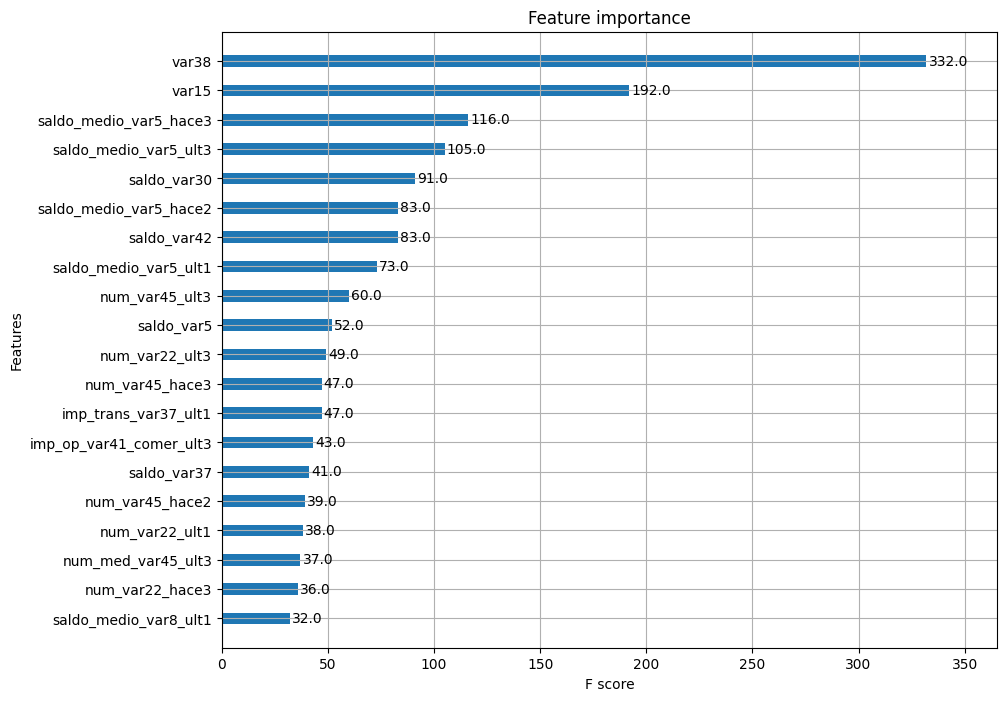

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [32]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average = 'macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [33]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                     }

In [42]:
def objective_func(search_space):
    lgbm_clf = LGBMClassifier(n_estimators=100,
                              num_leaves=int(search_space['num_leaves']),
                              max_depth=int(search_space['max_depth']),
                              min_child_samples=int(search_space['min_child_samples']),
                              subsample=search_space['subsample'],
                              learning_rate=search_space['learning_rate']
                              )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold 방식 적용
    kf=KFold(n_splits=3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결괏값 담음
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환
    return -1 * np.mean(roc_auc_list)

In [43]:
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import KFold

trials = Trials()

# fmin() 함수를 호출. max_evals 지정된 횟수만큼 반복 후 목적함수의 최솟값을 가지는 최적 입력값 추출
best = fmin(fn=objective_func,
            space=lgbm_search_space,
            algo=tpe.suggest,
            max_evals=50,     # 최대 반복 횟수를 지정
            trials=trials,
            rstate=np.random.default_rng(seed=30)
            )

print('best:', best)

  0%|                                                                           | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826374	training's binary_logloss: 0.164747	valid_1's auc: 0.813652	valid_1's binary_logloss: 0.158892
[2]	training's auc: 0.828688	training's binary_logloss: 0.16274	valid_1's auc: 0.814697	valid_1's binary_logloss: 0.157243
[3]	training's auc: 0.831453	training's binary_logloss: 0.160948	valid_1's auc: 0.817983	valid_1's binary_logloss: 0.155679
[4]	training's auc: 0.832427	training's binary_logloss: 0.159315	valid_1's auc: 0.818151	valid_1's binary_logloss: 0.154326
[5]	training's auc: 0.835396	training's binary_logloss: 0.1578	valid_1's auc: 0.81967	valid_1's binary_logloss: 0.153072
[6]	training's auc: 0.838759	training's binary_logloss: 0.156414	valid_1's auc: 0.821771	valid_1's binary_logloss: 0.15188
[7]	training's auc: 0.840479	training's binary_logloss: 0.155141	valid_1's auc: 0.824454	valid_1's binary_logloss: 0.150827
[8]	training's auc: 0.84112	training's binary_logloss: 0.153937	valid_1's auc: 0.824531	valid_1's binary_logloss: 0.149835
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827078	training's binary_logloss: 0.160957	valid_1's auc: 0.806826	valid_1's binary_logloss: 0.166539
[2]	training's auc: 0.829428	training's binary_logloss: 0.159062	valid_1's auc: 0.81121	valid_1's binary_logloss: 0.1647
[3]	training's auc: 0.834189	training's binary_logloss: 0.157388	valid_1's auc: 0.814212	valid_1's binary_logloss: 0.163126
[4]	training's auc: 0.834898	training's binary_logloss: 0.15584	valid_1's auc: 0.816332	valid_1's binary_logloss: 0.161663
[5]	training's auc: 0.836613	training's binary_logloss: 0.154385	valid_1's auc: 0.817578	valid_1's binary_logloss: 0.160308
[6]	training's auc: 0.837141	training's binary_logloss: 0.153051	valid_1's auc: 0.817975	valid_1's binary_logloss: 0.159098
[7]	training's auc: 0.84037	training's binary_logloss: 0.15182	valid_1's auc: 0.821337	valid_1's binary_logloss: 0.157941
[8]	training's auc: 0.841178	training's binary_logloss: 0.150681	valid_1's auc: 0.821845	valid_1's binary_logloss: 0.156842
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840138	training's binary_logloss: 0.15221	valid_1's auc: 0.812785	valid_1's binary_logloss: 0.155558
[2]	training's auc: 0.84777	training's binary_logloss: 0.145745	valid_1's auc: 0.815828	valid_1's binary_logloss: 0.150616
[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	training's auc: 0.872721	training's binary_logloss: 0.130404	valid_1's auc: 0.829742	valid_1's binary_logloss: 0.1403
[8]	training's auc: 0.876014	training's binary_logloss: 0.128648	valid_1's auc: 0.830458	valid_1's binary_logloss: 0.139332
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835385	training's binary_logloss: 0.155035	valid_1's auc: 0.820986	valid_1's binary_logloss: 0.151103
[2]	training's auc: 0.843742	training's binary_logloss: 0.148306	valid_1's auc: 0.823826	valid_1's binary_logloss: 0.146172
[3]	training's auc: 0.853372	training's binary_logloss: 0.143655	valid_1's auc: 0.829	valid_1's binary_logloss: 0.14287
[4]	training's auc: 0.859239	training's binary_logloss: 0.140159	valid_1's auc: 0.831548	valid_1's binary_logloss: 0.140399
[5]	training's auc: 0.864747	training's binary_logloss: 0.137227	valid_1's auc: 0.832085	valid_1's binary_logloss: 0.138509
[6]	training's auc: 0.867488	training's binary_logloss: 0.134833	valid_1's auc: 0.833908	valid_1's binary_logloss: 0.136874
[7]	training's auc: 0.871497	training's binary_logloss: 0.132791	valid_1's auc: 0.834228	valid_1's binary_logloss: 0.135671
[8]	training's auc: 0.872984	training's binary_logloss: 0.131078	valid_1's auc: 0.834811	valid_1's binary_logloss: 0.134752
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833555	training's binary_logloss: 0.151597	valid_1's auc: 0.810326	valid_1's binary_logloss: 0.158643
[2]	training's auc: 0.846544	training's binary_logloss: 0.145078	valid_1's auc: 0.816486	valid_1's binary_logloss: 0.153114
[3]	training's auc: 0.853639	training's binary_logloss: 0.140283	valid_1's auc: 0.821862	valid_1's binary_logloss: 0.149441
[4]	training's auc: 0.859777	training's binary_logloss: 0.13683	valid_1's auc: 0.824145	valid_1's binary_logloss: 0.146764
[5]	training's auc: 0.863141	training's binary_logloss: 0.133972	valid_1's auc: 0.824348	valid_1's binary_logloss: 0.144863
[6]	training's auc: 0.86626	training's binary_logloss: 0.13162	valid_1's auc: 0.826186	valid_1's binary_logloss: 0.143307
[7]	training's auc: 0.869463	training's binary_logloss: 0.129614	valid_1's auc: 0.82667	valid_1's binary_logloss: 0.142102
[8]	training's auc: 0.872344	training's binary_logloss: 0.127958	valid_1's auc: 0.8277	valid_1's binary_logloss: 0.141201
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839116	training's binary_logloss: 0.158407	valid_1's auc: 0.808457	valid_1's binary_logloss: 0.160442
[2]	training's auc: 0.84236	training's binary_logloss: 0.153995	valid_1's auc: 0.808509	valid_1's binary_logloss: 0.156958
[3]	training's auc: 0.845859	training's binary_logloss: 0.150591	valid_1's auc: 0.811508	valid_1's binary_logloss: 0.154196
[4]	training's auc: 0.852968	training's binary_logloss: 0.147664	valid_1's auc: 0.81863	valid_1's binary_logloss: 0.151787
[5]	training's auc: 0.855483	training's binary_logloss: 0.145139	valid_1's auc: 0.820538	valid_1's binary_logloss: 0.149919
[6]	training's auc: 0.856827	training's binary_logloss: 0.14298	valid_1's auc: 0.821063	valid_1's binary_logloss: 0.148333
[7]	training's auc: 0.858639	training's binary_logloss: 0.14107	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146983
[8]	training's auc: 0.859908	training's binary_logloss: 0.139361	valid_1's auc: 0.822497	valid_1's binary_logloss: 0.145726
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835511	training's binary_logloss: 0.160929	valid_1's auc: 0.819654	valid_1's binary_logloss: 0.155831
[2]	training's auc: 0.840626	training's binary_logloss: 0.156494	valid_1's auc: 0.822946	valid_1's binary_logloss: 0.152183
[3]	training's auc: 0.844525	training's binary_logloss: 0.152878	valid_1's auc: 0.825064	valid_1's binary_logloss: 0.149383
[4]	training's auc: 0.851467	training's binary_logloss: 0.149991	valid_1's auc: 0.829936	valid_1's binary_logloss: 0.147084
[5]	training's auc: 0.854447	training's binary_logloss: 0.147533	valid_1's auc: 0.83216	valid_1's binary_logloss: 0.14519
[6]	training's auc: 0.857472	training's binary_logloss: 0.145319	valid_1's auc: 0.833905	valid_1's binary_logloss: 0.143543
[7]	training's auc: 0.860339	training's binary_logloss: 0.143397	valid_1's auc: 0.834078	valid_1's binary_logloss: 0.142131
[8]	training's auc: 0.861304	training's binary_logloss: 0.141745	valid_1's auc: 0.834468	valid_1's binary_logloss: 0.140892
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834503	training's binary_logloss: 0.157399	valid_1's auc: 0.813411	valid_1's binary_logloss: 0.163404
[2]	training's auc: 0.839454	training's binary_logloss: 0.153182	valid_1's auc: 0.819011	valid_1's binary_logloss: 0.159561
[3]	training's auc: 0.846944	training's binary_logloss: 0.149714	valid_1's auc: 0.826293	valid_1's binary_logloss: 0.156293
[4]	training's auc: 0.851065	training's binary_logloss: 0.146888	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.153789
[5]	training's auc: 0.852662	training's binary_logloss: 0.14446	valid_1's auc: 0.826574	valid_1's binary_logloss: 0.151732
[6]	training's auc: 0.855441	training's binary_logloss: 0.142282	valid_1's auc: 0.828235	valid_1's binary_logloss: 0.149964
[7]	training's auc: 0.856989	training's binary_logloss: 0.140392	valid_1's auc: 0.828256	valid_1's binary_logloss: 0.148457
[8]	training's auc: 0.859909	training's binary_logloss: 0.138736	valid_1's auc: 0.828911	valid_1's binary_logloss: 0.14717
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842505	training's binary_logloss: 0.154575	valid_1's auc: 0.808054	valid_1's binary_logloss: 0.157515
[2]	training's auc: 0.84905	training's binary_logloss: 0.148601	valid_1's auc: 0.812705	valid_1's binary_logloss: 0.152991
[3]	training's auc: 0.858257	training's binary_logloss: 0.144161	valid_1's auc: 0.818699	valid_1's binary_logloss: 0.149736
[4]	training's auc: 0.861388	training's binary_logloss: 0.140701	valid_1's auc: 0.822829	valid_1's binary_logloss: 0.147176
[5]	training's auc: 0.863741	training's binary_logloss: 0.137779	valid_1's auc: 0.824119	valid_1's binary_logloss: 0.145182
[6]	training's auc: 0.867855	training's binary_logloss: 0.135354	valid_1's auc: 0.824776	valid_1's binary_logloss: 0.143786
[7]	training's auc: 0.871623	training's binary_logloss: 0.13321	valid_1's auc: 0.826166	valid_1's binary_logloss: 0.14244
[8]	training's auc: 0.873921	training's binary_logloss: 0.131346	valid_1's auc: 0.827566	valid_1's binary_logloss: 0.141253
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837198	training's binary_logloss: 0.157173	valid_1's auc: 0.819819	valid_1's binary_logloss: 0.153053
[2]	training's auc: 0.846143	training's binary_logloss: 0.150948	valid_1's auc: 0.824533	valid_1's binary_logloss: 0.148361
[3]	training's auc: 0.855841	training's binary_logloss: 0.146394	valid_1's auc: 0.830547	valid_1's binary_logloss: 0.145049
[4]	training's auc: 0.860602	training's binary_logloss: 0.142819	valid_1's auc: 0.830676	valid_1's binary_logloss: 0.142575
[5]	training's auc: 0.863461	training's binary_logloss: 0.139988	valid_1's auc: 0.831777	valid_1's binary_logloss: 0.140612
[6]	training's auc: 0.869579	training's binary_logloss: 0.137439	valid_1's auc: 0.832399	valid_1's binary_logloss: 0.138964
[7]	training's auc: 0.872434	training's binary_logloss: 0.135255	valid_1's auc: 0.833923	valid_1's binary_logloss: 0.137628
[8]	training's auc: 0.875089	training's binary_logloss: 0.133378	valid_1's auc: 0.833948	valid_1's binary_logloss: 0.136537
[9]	trai

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839507	training's binary_logloss: 0.15372	valid_1's auc: 0.813992	valid_1's binary_logloss: 0.160635
[2]	training's auc: 0.848498	training's binary_logloss: 0.147776	valid_1's auc: 0.821284	valid_1's binary_logloss: 0.155561
[3]	training's auc: 0.857619	training's binary_logloss: 0.143331	valid_1's auc: 0.82337	valid_1's binary_logloss: 0.151964
[4]	training's auc: 0.861851	training's binary_logloss: 0.139678	valid_1's auc: 0.82534	valid_1's binary_logloss: 0.149262
[5]	training's auc: 0.865752	training's binary_logloss: 0.136765	valid_1's auc: 0.827254	valid_1's binary_logloss: 0.147084
[6]	training's auc: 0.868268	training's binary_logloss: 0.134361	valid_1's auc: 0.827763	valid_1's binary_logloss: 0.145391
[7]	training's auc: 0.870669	training's binary_logloss: 0.132206	valid_1's auc: 0.827993	valid_1's binary_logloss: 0.144066
[8]	training's auc: 0.87337	training's binary_logloss: 0.130415	valid_1's auc: 0.828218	valid_1's binary_logloss: 0.143004
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839988	training's binary_logloss: 0.158915	valid_1's auc: 0.80402	valid_1's binary_logloss: 0.160845
[2]	training's auc: 0.845611	training's binary_logloss: 0.15473	valid_1's auc: 0.808466	valid_1's binary_logloss: 0.157503
[3]	training's auc: 0.850413	training's binary_logloss: 0.151467	valid_1's auc: 0.81197	valid_1's binary_logloss: 0.154969
[4]	training's auc: 0.854082	training's binary_logloss: 0.148694	valid_1's auc: 0.815343	valid_1's binary_logloss: 0.152791
[5]	training's auc: 0.858498	training's binary_logloss: 0.146257	valid_1's auc: 0.818991	valid_1's binary_logloss: 0.150852
[6]	training's auc: 0.860564	training's binary_logloss: 0.144088	valid_1's auc: 0.821491	valid_1's binary_logloss: 0.149217
[7]	training's auc: 0.861725	training's binary_logloss: 0.142182	valid_1's auc: 0.822291	valid_1's binary_logloss: 0.147829
[8]	training's auc: 0.863498	training's binary_logloss: 0.140436	valid_1's auc: 0.824234	valid_1's binary_logloss: 0.146526
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836609	training's binary_logloss: 0.161338	valid_1's auc: 0.815477	valid_1's binary_logloss: 0.156299
[2]	training's auc: 0.842726	training's binary_logloss: 0.157153	valid_1's auc: 0.820686	valid_1's binary_logloss: 0.152792
[3]	training's auc: 0.846403	training's binary_logloss: 0.15377	valid_1's auc: 0.82216	valid_1's binary_logloss: 0.150098
[4]	training's auc: 0.852579	training's binary_logloss: 0.150957	valid_1's auc: 0.828798	valid_1's binary_logloss: 0.147805
[5]	training's auc: 0.856698	training's binary_logloss: 0.148509	valid_1's auc: 0.830437	valid_1's binary_logloss: 0.145963
[6]	training's auc: 0.859482	training's binary_logloss: 0.146373	valid_1's auc: 0.831649	valid_1's binary_logloss: 0.144443
[7]	training's auc: 0.861336	training's binary_logloss: 0.14448	valid_1's auc: 0.831881	valid_1's binary_logloss: 0.143066
[8]	training's auc: 0.861845	training's binary_logloss: 0.142803	valid_1's auc: 0.832382	valid_1's binary_logloss: 0.141842
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838009	training's binary_logloss: 0.15785	valid_1's auc: 0.816064	valid_1's binary_logloss: 0.163853
[2]	training's auc: 0.842866	training's binary_logloss: 0.153851	valid_1's auc: 0.821346	valid_1's binary_logloss: 0.160188
[3]	training's auc: 0.849387	training's binary_logloss: 0.150557	valid_1's auc: 0.824199	valid_1's binary_logloss: 0.157216
[4]	training's auc: 0.852024	training's binary_logloss: 0.147809	valid_1's auc: 0.82622	valid_1's binary_logloss: 0.154772
[5]	training's auc: 0.855155	training's binary_logloss: 0.145337	valid_1's auc: 0.825562	valid_1's binary_logloss: 0.152726
[6]	training's auc: 0.857892	training's binary_logloss: 0.14321	valid_1's auc: 0.826847	valid_1's binary_logloss: 0.150986
[7]	training's auc: 0.859307	training's binary_logloss: 0.141367	valid_1's auc: 0.827065	valid_1's binary_logloss: 0.149508
[8]	training's auc: 0.861324	training's binary_logloss: 0.13968	valid_1's auc: 0.828058	valid_1's binary_logloss: 0.148156
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833828	training's binary_logloss: 0.163235	valid_1's auc: 0.809771	valid_1's binary_logloss: 0.16433
[2]	training's auc: 0.834179	training's binary_logloss: 0.161985	valid_1's auc: 0.810036	valid_1's binary_logloss: 0.163293
[3]	training's auc: 0.834939	training's binary_logloss: 0.160813	valid_1's auc: 0.809567	valid_1's binary_logloss: 0.162334
[4]	training's auc: 0.835195	training's binary_logloss: 0.159725	valid_1's auc: 0.809769	valid_1's binary_logloss: 0.161432
[5]	training's auc: 0.83658	training's binary_logloss: 0.158699	valid_1's auc: 0.81153	valid_1's binary_logloss: 0.160564
[6]	training's auc: 0.838752	training's binary_logloss: 0.157727	valid_1's auc: 0.812415	valid_1's binary_logloss: 0.159769
[7]	training's auc: 0.840544	training's binary_logloss: 0.156809	valid_1's auc: 0.813045	valid_1's binary_logloss: 0.159006
[8]	training's auc: 0.841508	training's binary_logloss: 0.155933	valid_1's auc: 0.813588	valid_1's binary_logloss: 0.15826
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82749	training's binary_logloss: 0.16565	valid_1's auc: 0.813829	valid_1's binary_logloss: 0.159659
[2]	training's auc: 0.830751	training's binary_logloss: 0.16443	valid_1's auc: 0.816626	valid_1's binary_logloss: 0.158641
[3]	training's auc: 0.831422	training's binary_logloss: 0.163283	valid_1's auc: 0.817276	valid_1's binary_logloss: 0.157694
[4]	training's auc: 0.832973	training's binary_logloss: 0.162198	valid_1's auc: 0.81793	valid_1's binary_logloss: 0.156781
[5]	training's auc: 0.835583	training's binary_logloss: 0.161178	valid_1's auc: 0.820495	valid_1's binary_logloss: 0.155894
[6]	training's auc: 0.838046	training's binary_logloss: 0.1602	valid_1's auc: 0.821946	valid_1's binary_logloss: 0.155084
[7]	training's auc: 0.838769	training's binary_logloss: 0.159291	valid_1's auc: 0.821719	valid_1's binary_logloss: 0.154309
[8]	training's auc: 0.84063	training's binary_logloss: 0.158396	valid_1's auc: 0.82363	valid_1's binary_logloss: 0.153594
[9]	training's a

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828425	training's binary_logloss: 0.161829	valid_1's auc: 0.806691	valid_1's binary_logloss: 0.167347
[2]	training's auc: 0.828951	training's binary_logloss: 0.160663	valid_1's auc: 0.807902	valid_1's binary_logloss: 0.166272
[3]	training's auc: 0.833007	training's binary_logloss: 0.159562	valid_1's auc: 0.81241	valid_1's binary_logloss: 0.165224
[4]	training's auc: 0.83539	training's binary_logloss: 0.15854	valid_1's auc: 0.813209	valid_1's binary_logloss: 0.164289
[5]	training's auc: 0.836111	training's binary_logloss: 0.157568	valid_1's auc: 0.814964	valid_1's binary_logloss: 0.163392
[6]	training's auc: 0.836422	training's binary_logloss: 0.156633	valid_1's auc: 0.814882	valid_1's binary_logloss: 0.162531
[7]	training's auc: 0.837542	training's binary_logloss: 0.155731	valid_1's auc: 0.816475	valid_1's binary_logloss: 0.161714
[8]	training's auc: 0.838132	training's binary_logloss: 0.154878	valid_1's auc: 0.81704	valid_1's binary_logloss: 0.160902
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83341	training's binary_logloss: 0.151714	valid_1's auc: 0.808519	valid_1's binary_logloss: 0.155061
[2]	training's auc: 0.844218	training's binary_logloss: 0.145441	valid_1's auc: 0.81196	valid_1's binary_logloss: 0.150109
[3]	training's auc: 0.853411	training's binary_logloss: 0.141113	valid_1's auc: 0.820102	valid_1's binary_logloss: 0.146697
[4]	training's auc: 0.859233	training's binary_logloss: 0.137789	valid_1's auc: 0.824479	valid_1's binary_logloss: 0.144156
[5]	training's auc: 0.861488	training's binary_logloss: 0.135069	valid_1's auc: 0.825021	valid_1's binary_logloss: 0.142327
[6]	training's auc: 0.864267	training's binary_logloss: 0.132912	valid_1's auc: 0.826967	valid_1's binary_logloss: 0.140739
[7]	training's auc: 0.867639	training's binary_logloss: 0.131036	valid_1's auc: 0.826732	valid_1's binary_logloss: 0.139748
[8]	training's auc: 0.870029	training's binary_logloss: 0.12946	valid_1's auc: 0.827625	valid_1's binary_logloss: 0.138912
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827763	training's binary_logloss: 0.154444	valid_1's auc: 0.813826	valid_1's binary_logloss: 0.150629
[2]	training's auc: 0.840659	training's binary_logloss: 0.14789	valid_1's auc: 0.824297	valid_1's binary_logloss: 0.145342
[3]	training's auc: 0.849291	training's binary_logloss: 0.143543	valid_1's auc: 0.827749	valid_1's binary_logloss: 0.142075
[4]	training's auc: 0.853148	training's binary_logloss: 0.140144	valid_1's auc: 0.828916	valid_1's binary_logloss: 0.139623
[5]	training's auc: 0.858434	training's binary_logloss: 0.137418	valid_1's auc: 0.833438	valid_1's binary_logloss: 0.137591
[6]	training's auc: 0.862685	training's binary_logloss: 0.135198	valid_1's auc: 0.833679	valid_1's binary_logloss: 0.136221
[7]	training's auc: 0.86528	training's binary_logloss: 0.133394	valid_1's auc: 0.832464	valid_1's binary_logloss: 0.135201
[8]	training's auc: 0.868221	training's binary_logloss: 0.131827	valid_1's auc: 0.833365	valid_1's binary_logloss: 0.134324
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828295	training's binary_logloss: 0.15115	valid_1's auc: 0.807922	valid_1's binary_logloss: 0.157742
[2]	training's auc: 0.839999	training's binary_logloss: 0.144773	valid_1's auc: 0.81813	valid_1's binary_logloss: 0.151807
[3]	training's auc: 0.849834	training's binary_logloss: 0.140265	valid_1's auc: 0.826173	valid_1's binary_logloss: 0.148056
[4]	training's auc: 0.853229	training's binary_logloss: 0.136959	valid_1's auc: 0.827736	valid_1's binary_logloss: 0.145438
[5]	training's auc: 0.858015	training's binary_logloss: 0.134357	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.143565
[6]	training's auc: 0.861489	training's binary_logloss: 0.132111	valid_1's auc: 0.829608	valid_1's binary_logloss: 0.142111
[7]	training's auc: 0.864164	training's binary_logloss: 0.130256	valid_1's auc: 0.830298	valid_1's binary_logloss: 0.141005
[8]	training's auc: 0.867383	training's binary_logloss: 0.128639	valid_1's auc: 0.830377	valid_1's binary_logloss: 0.140085
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842291	training's binary_logloss: 0.149488	valid_1's auc: 0.808525	valid_1's binary_logloss: 0.153638
[2]	training's auc: 0.855548	training's binary_logloss: 0.142676	valid_1's auc: 0.821485	valid_1's binary_logloss: 0.148557
[3]	training's auc: 0.863334	training's binary_logloss: 0.137901	valid_1's auc: 0.82616	valid_1's binary_logloss: 0.145042
[4]	training's auc: 0.868691	training's binary_logloss: 0.134262	valid_1's auc: 0.828279	valid_1's binary_logloss: 0.142756
[5]	training's auc: 0.872492	training's binary_logloss: 0.131434	valid_1's auc: 0.830256	valid_1's binary_logloss: 0.140936
[6]	training's auc: 0.877909	training's binary_logloss: 0.129022	valid_1's auc: 0.831019	valid_1's binary_logloss: 0.139605
[7]	training's auc: 0.881502	training's binary_logloss: 0.126985	valid_1's auc: 0.830458	valid_1's binary_logloss: 0.138684
[8]	training's auc: 0.884816	training's binary_logloss: 0.125199	valid_1's auc: 0.83016	valid_1's binary_logloss: 0.138134
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837218	training's binary_logloss: 0.152244	valid_1's auc: 0.819659	valid_1's binary_logloss: 0.14919
[2]	training's auc: 0.853479	training's binary_logloss: 0.14503	valid_1's auc: 0.828919	valid_1's binary_logloss: 0.144072
[3]	training's auc: 0.860313	training's binary_logloss: 0.140218	valid_1's auc: 0.832238	valid_1's binary_logloss: 0.140713
[4]	training's auc: 0.86584	training's binary_logloss: 0.136529	valid_1's auc: 0.831744	valid_1's binary_logloss: 0.138395
[5]	training's auc: 0.87104	training's binary_logloss: 0.133395	valid_1's auc: 0.832706	valid_1's binary_logloss: 0.1365
[6]	training's auc: 0.875595	training's binary_logloss: 0.130965	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.135173
[7]	training's auc: 0.879191	training's binary_logloss: 0.128858	valid_1's auc: 0.83487	valid_1's binary_logloss: 0.134108
[8]	training's auc: 0.882764	training's binary_logloss: 0.126909	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.133306
[9]	training's 

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840707	training's binary_logloss: 0.149007	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.156543
[2]	training's auc: 0.851035	training's binary_logloss: 0.142021	valid_1's auc: 0.822227	valid_1's binary_logloss: 0.150774
[3]	training's auc: 0.861684	training's binary_logloss: 0.137135	valid_1's auc: 0.823666	valid_1's binary_logloss: 0.147313
[4]	training's auc: 0.865277	training's binary_logloss: 0.133586	valid_1's auc: 0.824686	valid_1's binary_logloss: 0.144893
[5]	training's auc: 0.868512	training's binary_logloss: 0.130712	valid_1's auc: 0.827427	valid_1's binary_logloss: 0.142941
[6]	training's auc: 0.873325	training's binary_logloss: 0.128304	valid_1's auc: 0.829335	valid_1's binary_logloss: 0.141472
[7]	training's auc: 0.876611	training's binary_logloss: 0.126286	valid_1's auc: 0.83015	valid_1's binary_logloss: 0.140432
[8]	training's auc: 0.879634	training's binary_logloss: 0.124469	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.139821
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826987	training's binary_logloss: 0.151997	valid_1's auc: 0.803689	valid_1's binary_logloss: 0.155158
[2]	training's auc: 0.839255	training's binary_logloss: 0.146027	valid_1's auc: 0.811856	valid_1's binary_logloss: 0.150317
[3]	training's auc: 0.847657	training's binary_logloss: 0.141654	valid_1's auc: 0.820698	valid_1's binary_logloss: 0.146759
[4]	training's auc: 0.852742	training's binary_logloss: 0.138372	valid_1's auc: 0.823726	valid_1's binary_logloss: 0.144289
[5]	training's auc: 0.856314	training's binary_logloss: 0.135792	valid_1's auc: 0.823333	valid_1's binary_logloss: 0.142578
[6]	training's auc: 0.858236	training's binary_logloss: 0.1337	valid_1's auc: 0.825073	valid_1's binary_logloss: 0.14105
[7]	training's auc: 0.862585	training's binary_logloss: 0.13192	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.139907
[8]	training's auc: 0.865855	training's binary_logloss: 0.130321	valid_1's auc: 0.827066	valid_1's binary_logloss: 0.139038
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826784	training's binary_logloss: 0.154714	valid_1's auc: 0.813873	valid_1's binary_logloss: 0.150705
[2]	training's auc: 0.837819	training's binary_logloss: 0.14823	valid_1's auc: 0.822785	valid_1's binary_logloss: 0.145495
[3]	training's auc: 0.846617	training's binary_logloss: 0.144011	valid_1's auc: 0.827298	valid_1's binary_logloss: 0.14214
[4]	training's auc: 0.850175	training's binary_logloss: 0.140713	valid_1's auc: 0.82918	valid_1's binary_logloss: 0.139608
[5]	training's auc: 0.85502	training's binary_logloss: 0.137986	valid_1's auc: 0.833372	valid_1's binary_logloss: 0.137615
[6]	training's auc: 0.857946	training's binary_logloss: 0.135802	valid_1's auc: 0.83324	valid_1's binary_logloss: 0.13621
[7]	training's auc: 0.861406	training's binary_logloss: 0.134062	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.135139
[8]	training's auc: 0.864751	training's binary_logloss: 0.132567	valid_1's auc: 0.833489	valid_1's binary_logloss: 0.134292
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827379	training's binary_logloss: 0.151464	valid_1's auc: 0.809232	valid_1's binary_logloss: 0.157783
[2]	training's auc: 0.837603	training's binary_logloss: 0.145299	valid_1's auc: 0.818267	valid_1's binary_logloss: 0.151836
[3]	training's auc: 0.847927	training's binary_logloss: 0.14086	valid_1's auc: 0.826173	valid_1's binary_logloss: 0.148167
[4]	training's auc: 0.852055	training's binary_logloss: 0.137466	valid_1's auc: 0.827742	valid_1's binary_logloss: 0.145664
[5]	training's auc: 0.855439	training's binary_logloss: 0.134877	valid_1's auc: 0.828994	valid_1's binary_logloss: 0.143773
[6]	training's auc: 0.858953	training's binary_logloss: 0.132777	valid_1's auc: 0.830169	valid_1's binary_logloss: 0.142227
[7]	training's auc: 0.861578	training's binary_logloss: 0.131069	valid_1's auc: 0.830567	valid_1's binary_logloss: 0.141015
[8]	training's auc: 0.863715	training's binary_logloss: 0.129541	valid_1's auc: 0.831709	valid_1's binary_logloss: 0.140005
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839893	training's binary_logloss: 0.157898	valid_1's auc: 0.808511	valid_1's binary_logloss: 0.160042
[2]	training's auc: 0.843516	training's binary_logloss: 0.153248	valid_1's auc: 0.810458	valid_1's binary_logloss: 0.156427
[3]	training's auc: 0.847106	training's binary_logloss: 0.14965	valid_1's auc: 0.810286	valid_1's binary_logloss: 0.153651
[4]	training's auc: 0.854672	training's binary_logloss: 0.146616	valid_1's auc: 0.816639	valid_1's binary_logloss: 0.151207
[5]	training's auc: 0.856814	training's binary_logloss: 0.144027	valid_1's auc: 0.819587	valid_1's binary_logloss: 0.149282
[6]	training's auc: 0.858444	training's binary_logloss: 0.141831	valid_1's auc: 0.820256	valid_1's binary_logloss: 0.147672
[7]	training's auc: 0.86017	training's binary_logloss: 0.139823	valid_1's auc: 0.822239	valid_1's binary_logloss: 0.146152
[8]	training's auc: 0.863392	training's binary_logloss: 0.138089	valid_1's auc: 0.824008	valid_1's binary_logloss: 0.144894
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836632	training's binary_logloss: 0.160373	valid_1's auc: 0.819718	valid_1's binary_logloss: 0.155457
[2]	training's auc: 0.84326	training's binary_logloss: 0.155574	valid_1's auc: 0.821805	valid_1's binary_logloss: 0.151654
[3]	training's auc: 0.846733	training's binary_logloss: 0.151871	valid_1's auc: 0.824699	valid_1's binary_logloss: 0.148729
[4]	training's auc: 0.853304	training's binary_logloss: 0.14889	valid_1's auc: 0.830163	valid_1's binary_logloss: 0.146307
[5]	training's auc: 0.858467	training's binary_logloss: 0.1463	valid_1's auc: 0.832164	valid_1's binary_logloss: 0.144403
[6]	training's auc: 0.860449	training's binary_logloss: 0.144063	valid_1's auc: 0.832539	valid_1's binary_logloss: 0.142805
[7]	training's auc: 0.862669	training's binary_logloss: 0.142075	valid_1's auc: 0.83256	valid_1's binary_logloss: 0.141435
[8]	training's auc: 0.865004	training's binary_logloss: 0.14024	valid_1's auc: 0.834013	valid_1's binary_logloss: 0.140124
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837929	training's binary_logloss: 0.156929	valid_1's auc: 0.815704	valid_1's binary_logloss: 0.163007
[2]	training's auc: 0.842423	training's binary_logloss: 0.152431	valid_1's auc: 0.822657	valid_1's binary_logloss: 0.158915
[3]	training's auc: 0.848618	training's binary_logloss: 0.14881	valid_1's auc: 0.826492	valid_1's binary_logloss: 0.155543
[4]	training's auc: 0.852258	training's binary_logloss: 0.145754	valid_1's auc: 0.828684	valid_1's binary_logloss: 0.152939
[5]	training's auc: 0.855326	training's binary_logloss: 0.143184	valid_1's auc: 0.829683	valid_1's binary_logloss: 0.150844
[6]	training's auc: 0.857524	training's binary_logloss: 0.140988	valid_1's auc: 0.829609	valid_1's binary_logloss: 0.149111
[7]	training's auc: 0.860594	training's binary_logloss: 0.139045	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.147644
[8]	training's auc: 0.863468	training's binary_logloss: 0.137312	valid_1's auc: 0.831632	valid_1's binary_logloss: 0.146289
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842984	training's binary_logloss: 0.146244	valid_1's auc: 0.8072	valid_1's binary_logloss: 0.151389
[2]	training's auc: 0.861067	training's binary_logloss: 0.139208	valid_1's auc: 0.819527	valid_1's binary_logloss: 0.146278
[3]	training's auc: 0.869851	training's binary_logloss: 0.134326	valid_1's auc: 0.824541	valid_1's binary_logloss: 0.143124
[4]	training's auc: 0.873405	training's binary_logloss: 0.130662	valid_1's auc: 0.824047	valid_1's binary_logloss: 0.141246
[5]	training's auc: 0.880538	training's binary_logloss: 0.12764	valid_1's auc: 0.827101	valid_1's binary_logloss: 0.13967
[6]	training's auc: 0.884965	training's binary_logloss: 0.125126	valid_1's auc: 0.826541	valid_1's binary_logloss: 0.138655
[7]	training's auc: 0.888174	training's binary_logloss: 0.123002	valid_1's auc: 0.826506	valid_1's binary_logloss: 0.137952
[8]	training's auc: 0.893276	training's binary_logloss: 0.120949	valid_1's auc: 0.827578	valid_1's binary_logloss: 0.137381
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837661	training's binary_logloss: 0.148983	valid_1's auc: 0.819796	valid_1's binary_logloss: 0.147155
[2]	training's auc: 0.855164	training's binary_logloss: 0.141602	valid_1's auc: 0.827475	valid_1's binary_logloss: 0.142331
[3]	training's auc: 0.864368	training's binary_logloss: 0.136425	valid_1's auc: 0.829094	valid_1's binary_logloss: 0.139252
[4]	training's auc: 0.871483	training's binary_logloss: 0.132698	valid_1's auc: 0.828493	valid_1's binary_logloss: 0.13743
[5]	training's auc: 0.877055	training's binary_logloss: 0.129612	valid_1's auc: 0.828273	valid_1's binary_logloss: 0.136125
[6]	training's auc: 0.881427	training's binary_logloss: 0.127144	valid_1's auc: 0.82878	valid_1's binary_logloss: 0.135256
[7]	training's auc: 0.884601	training's binary_logloss: 0.125048	valid_1's auc: 0.82896	valid_1's binary_logloss: 0.134553
[8]	training's auc: 0.888557	training's binary_logloss: 0.123077	valid_1's auc: 0.829973	valid_1's binary_logloss: 0.13395
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840005	training's binary_logloss: 0.145852	valid_1's auc: 0.814016	valid_1's binary_logloss: 0.154527
[2]	training's auc: 0.855209	training's binary_logloss: 0.138299	valid_1's auc: 0.820132	valid_1's binary_logloss: 0.148936
[3]	training's auc: 0.862712	training's binary_logloss: 0.133468	valid_1's auc: 0.823275	valid_1's binary_logloss: 0.145594
[4]	training's auc: 0.869125	training's binary_logloss: 0.129798	valid_1's auc: 0.824435	valid_1's binary_logloss: 0.143537
[5]	training's auc: 0.873604	training's binary_logloss: 0.126831	valid_1's auc: 0.823621	valid_1's binary_logloss: 0.142239
[6]	training's auc: 0.879521	training's binary_logloss: 0.124324	valid_1's auc: 0.825508	valid_1's binary_logloss: 0.1411
[7]	training's auc: 0.885507	training's binary_logloss: 0.122052	valid_1's auc: 0.828451	valid_1's binary_logloss: 0.140296
[8]	training's auc: 0.891505	training's binary_logloss: 0.119988	valid_1's auc: 0.829185	valid_1's binary_logloss: 0.139789
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841697	training's binary_logloss: 0.158609	valid_1's auc: 0.803876	valid_1's binary_logloss: 0.160756
[2]	training's auc: 0.84697	training's binary_logloss: 0.154218	valid_1's auc: 0.809302	valid_1's binary_logloss: 0.157373
[3]	training's auc: 0.853184	training's binary_logloss: 0.150795	valid_1's auc: 0.811905	valid_1's binary_logloss: 0.154709
[4]	training's auc: 0.857654	training's binary_logloss: 0.147889	valid_1's auc: 0.816713	valid_1's binary_logloss: 0.152383
[5]	training's auc: 0.863062	training's binary_logloss: 0.145431	valid_1's auc: 0.819836	valid_1's binary_logloss: 0.150507
[6]	training's auc: 0.864785	training's binary_logloss: 0.143176	valid_1's auc: 0.822365	valid_1's binary_logloss: 0.148848
[7]	training's auc: 0.867025	training's binary_logloss: 0.141191	valid_1's auc: 0.823514	valid_1's binary_logloss: 0.147455
[8]	training's auc: 0.86737	training's binary_logloss: 0.139431	valid_1's auc: 0.824628	valid_1's binary_logloss: 0.146232
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839164	training's binary_logloss: 0.161062	valid_1's auc: 0.819765	valid_1's binary_logloss: 0.156089
[2]	training's auc: 0.844855	training's binary_logloss: 0.156695	valid_1's auc: 0.822073	valid_1's binary_logloss: 0.152549
[3]	training's auc: 0.849887	training's binary_logloss: 0.153062	valid_1's auc: 0.824329	valid_1's binary_logloss: 0.14985
[4]	training's auc: 0.856036	training's binary_logloss: 0.150104	valid_1's auc: 0.829805	valid_1's binary_logloss: 0.147525
[5]	training's auc: 0.860812	training's binary_logloss: 0.147551	valid_1's auc: 0.832349	valid_1's binary_logloss: 0.145585
[6]	training's auc: 0.862939	training's binary_logloss: 0.145339	valid_1's auc: 0.833589	valid_1's binary_logloss: 0.1439
[7]	training's auc: 0.8651	training's binary_logloss: 0.143413	valid_1's auc: 0.833878	valid_1's binary_logloss: 0.142532
[8]	training's auc: 0.86651	training's binary_logloss: 0.141683	valid_1's auc: 0.83295	valid_1's binary_logloss: 0.141399
[9]	training's 

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841566	training's binary_logloss: 0.157579	valid_1's auc: 0.815088	valid_1's binary_logloss: 0.163686
[2]	training's auc: 0.847268	training's binary_logloss: 0.153376	valid_1's auc: 0.823562	valid_1's binary_logloss: 0.160001
[3]	training's auc: 0.850393	training's binary_logloss: 0.149947	valid_1's auc: 0.826381	valid_1's binary_logloss: 0.156891
[4]	training's auc: 0.855601	training's binary_logloss: 0.14711	valid_1's auc: 0.825873	valid_1's binary_logloss: 0.154483
[5]	training's auc: 0.858089	training's binary_logloss: 0.144554	valid_1's auc: 0.827488	valid_1's binary_logloss: 0.152338
[6]	training's auc: 0.860972	training's binary_logloss: 0.142324	valid_1's auc: 0.828963	valid_1's binary_logloss: 0.150622
[7]	training's auc: 0.864168	training's binary_logloss: 0.140339	valid_1's auc: 0.82864	valid_1's binary_logloss: 0.149169
[8]	training's auc: 0.86559	training's binary_logloss: 0.138605	valid_1's auc: 0.828184	valid_1's binary_logloss: 0.147944
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834394	training's binary_logloss: 0.147579	valid_1's auc: 0.808964	valid_1's binary_logloss: 0.151943
[2]	training's auc: 0.848525	training's binary_logloss: 0.140999	valid_1's auc: 0.816509	valid_1's binary_logloss: 0.14718
[3]	training's auc: 0.85943	training's binary_logloss: 0.136488	valid_1's auc: 0.823615	valid_1's binary_logloss: 0.143843
[4]	training's auc: 0.86192	training's binary_logloss: 0.133179	valid_1's auc: 0.824678	valid_1's binary_logloss: 0.141541
[5]	training's auc: 0.867483	training's binary_logloss: 0.130685	valid_1's auc: 0.827186	valid_1's binary_logloss: 0.139863
[6]	training's auc: 0.871125	training's binary_logloss: 0.128552	valid_1's auc: 0.827725	valid_1's binary_logloss: 0.138679
[7]	training's auc: 0.874313	training's binary_logloss: 0.126741	valid_1's auc: 0.827242	valid_1's binary_logloss: 0.138022
[8]	training's auc: 0.878214	training's binary_logloss: 0.125086	valid_1's auc: 0.828045	valid_1's binary_logloss: 0.137294
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828233	training's binary_logloss: 0.150476	valid_1's auc: 0.814958	valid_1's binary_logloss: 0.147598
[2]	training's auc: 0.843373	training's binary_logloss: 0.143544	valid_1's auc: 0.822354	valid_1's binary_logloss: 0.142486
[3]	training's auc: 0.852049	training's binary_logloss: 0.139123	valid_1's auc: 0.829813	valid_1's binary_logloss: 0.139385
[4]	training's auc: 0.858021	training's binary_logloss: 0.135679	valid_1's auc: 0.831119	valid_1's binary_logloss: 0.13724
[5]	training's auc: 0.864999	training's binary_logloss: 0.132814	valid_1's auc: 0.83232	valid_1's binary_logloss: 0.135822
[6]	training's auc: 0.86954	training's binary_logloss: 0.130554	valid_1's auc: 0.831593	valid_1's binary_logloss: 0.134778
[7]	training's auc: 0.871884	training's binary_logloss: 0.128842	valid_1's auc: 0.831589	valid_1's binary_logloss: 0.133989
[8]	training's auc: 0.874289	training's binary_logloss: 0.127258	valid_1's auc: 0.832476	valid_1's binary_logloss: 0.133365
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828959	training's binary_logloss: 0.147207	valid_1's auc: 0.805905	valid_1's binary_logloss: 0.15472
[2]	training's auc: 0.845243	training's binary_logloss: 0.140488	valid_1's auc: 0.821103	valid_1's binary_logloss: 0.148964
[3]	training's auc: 0.852674	training's binary_logloss: 0.135758	valid_1's auc: 0.824989	valid_1's binary_logloss: 0.145528
[4]	training's auc: 0.85898	training's binary_logloss: 0.132421	valid_1's auc: 0.826375	valid_1's binary_logloss: 0.143102
[5]	training's auc: 0.862124	training's binary_logloss: 0.129982	valid_1's auc: 0.827978	valid_1's binary_logloss: 0.141678
[6]	training's auc: 0.867042	training's binary_logloss: 0.127727	valid_1's auc: 0.827737	valid_1's binary_logloss: 0.140602
[7]	training's auc: 0.872648	training's binary_logloss: 0.126022	valid_1's auc: 0.830796	valid_1's binary_logloss: 0.13966
[8]	training's auc: 0.876353	training's binary_logloss: 0.124465	valid_1's auc: 0.831399	valid_1's binary_logloss: 0.139051
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838036	training's binary_logloss: 0.159904	valid_1's auc: 0.810516	valid_1's binary_logloss: 0.16165
[2]	training's auc: 0.840031	training's binary_logloss: 0.15623	valid_1's auc: 0.810634	valid_1's binary_logloss: 0.158768
[3]	training's auc: 0.844934	training's binary_logloss: 0.15325	valid_1's auc: 0.812074	valid_1's binary_logloss: 0.156367
[4]	training's auc: 0.849529	training's binary_logloss: 0.150646	valid_1's auc: 0.815847	valid_1's binary_logloss: 0.15427
[5]	training's auc: 0.855099	training's binary_logloss: 0.148375	valid_1's auc: 0.819986	valid_1's binary_logloss: 0.15253
[6]	training's auc: 0.856375	training's binary_logloss: 0.146399	valid_1's auc: 0.820321	valid_1's binary_logloss: 0.15101
[7]	training's auc: 0.858022	training's binary_logloss: 0.144608	valid_1's auc: 0.821017	valid_1's binary_logloss: 0.149707
[8]	training's auc: 0.860624	training's binary_logloss: 0.142973	valid_1's auc: 0.823021	valid_1's binary_logloss: 0.148471
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833047	training's binary_logloss: 0.162438	valid_1's auc: 0.820168	valid_1's binary_logloss: 0.157052
[2]	training's auc: 0.841261	training's binary_logloss: 0.158806	valid_1's auc: 0.824065	valid_1's binary_logloss: 0.15408
[3]	training's auc: 0.844689	training's binary_logloss: 0.155731	valid_1's auc: 0.824953	valid_1's binary_logloss: 0.151754
[4]	training's auc: 0.847688	training's binary_logloss: 0.153187	valid_1's auc: 0.82602	valid_1's binary_logloss: 0.149654
[5]	training's auc: 0.849687	training's binary_logloss: 0.150904	valid_1's auc: 0.827382	valid_1's binary_logloss: 0.147899
[6]	training's auc: 0.854733	training's binary_logloss: 0.148855	valid_1's auc: 0.830719	valid_1's binary_logloss: 0.146369
[7]	training's auc: 0.85619	training's binary_logloss: 0.147049	valid_1's auc: 0.830924	valid_1's binary_logloss: 0.145049
[8]	training's auc: 0.859101	training's binary_logloss: 0.145462	valid_1's auc: 0.831174	valid_1's binary_logloss: 0.143871
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832013	training's binary_logloss: 0.158746	valid_1's auc: 0.807047	valid_1's binary_logloss: 0.164738
[2]	training's auc: 0.839478	training's binary_logloss: 0.155212	valid_1's auc: 0.814671	valid_1's binary_logloss: 0.161574
[3]	training's auc: 0.843493	training's binary_logloss: 0.15231	valid_1's auc: 0.821546	valid_1's binary_logloss: 0.15889
[4]	training's auc: 0.847877	training's binary_logloss: 0.149752	valid_1's auc: 0.82469	valid_1's binary_logloss: 0.156669
[5]	training's auc: 0.850318	training's binary_logloss: 0.147567	valid_1's auc: 0.82543	valid_1's binary_logloss: 0.154801
[6]	training's auc: 0.852449	training's binary_logloss: 0.145583	valid_1's auc: 0.826208	valid_1's binary_logloss: 0.153101
[7]	training's auc: 0.855694	training's binary_logloss: 0.143785	valid_1's auc: 0.828369	valid_1's binary_logloss: 0.151616
[8]	training's auc: 0.856457	training's binary_logloss: 0.142185	valid_1's auc: 0.828143	valid_1's binary_logloss: 0.15032
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827368	training's binary_logloss: 0.153759	valid_1's auc: 0.804853	valid_1's binary_logloss: 0.156547
[2]	training's auc: 0.83748	training's binary_logloss: 0.14785	valid_1's auc: 0.811892	valid_1's binary_logloss: 0.151608
[3]	training's auc: 0.845173	training's binary_logloss: 0.143775	valid_1's auc: 0.817212	valid_1's binary_logloss: 0.148274
[4]	training's auc: 0.851186	training's binary_logloss: 0.14037	valid_1's auc: 0.82289	valid_1's binary_logloss: 0.145719
[5]	training's auc: 0.856316	training's binary_logloss: 0.137657	valid_1's auc: 0.825027	valid_1's binary_logloss: 0.14364
[6]	training's auc: 0.858729	training's binary_logloss: 0.135466	valid_1's auc: 0.826263	valid_1's binary_logloss: 0.142088
[7]	training's auc: 0.860866	training's binary_logloss: 0.133676	valid_1's auc: 0.828441	valid_1's binary_logloss: 0.140695
[8]	training's auc: 0.863593	training's binary_logloss: 0.132155	valid_1's auc: 0.830297	valid_1's binary_logloss: 0.139719
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826374	training's binary_logloss: 0.156533	valid_1's auc: 0.813652	valid_1's binary_logloss: 0.152104
[2]	training's auc: 0.83681	training's binary_logloss: 0.150422	valid_1's auc: 0.822984	valid_1's binary_logloss: 0.147075
[3]	training's auc: 0.845348	training's binary_logloss: 0.146031	valid_1's auc: 0.828091	valid_1's binary_logloss: 0.143671
[4]	training's auc: 0.849796	training's binary_logloss: 0.1428	valid_1's auc: 0.827681	valid_1's binary_logloss: 0.141309
[5]	training's auc: 0.85354	training's binary_logloss: 0.140107	valid_1's auc: 0.831145	valid_1's binary_logloss: 0.139337
[6]	training's auc: 0.856277	training's binary_logloss: 0.137855	valid_1's auc: 0.833832	valid_1's binary_logloss: 0.13778
[7]	training's auc: 0.859846	training's binary_logloss: 0.135973	valid_1's auc: 0.833963	valid_1's binary_logloss: 0.136551
[8]	training's auc: 0.863692	training's binary_logloss: 0.134322	valid_1's auc: 0.833681	valid_1's binary_logloss: 0.135493
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827193	training's binary_logloss: 0.153031	valid_1's auc: 0.806721	valid_1's binary_logloss: 0.159404
[2]	training's auc: 0.838003	training's binary_logloss: 0.14706	valid_1's auc: 0.815233	valid_1's binary_logloss: 0.154033
[3]	training's auc: 0.845852	training's binary_logloss: 0.14276	valid_1's auc: 0.822398	valid_1's binary_logloss: 0.150372
[4]	training's auc: 0.849987	training's binary_logloss: 0.139511	valid_1's auc: 0.825753	valid_1's binary_logloss: 0.147621
[5]	training's auc: 0.851516	training's binary_logloss: 0.136768	valid_1's auc: 0.827215	valid_1's binary_logloss: 0.145477
[6]	training's auc: 0.854338	training's binary_logloss: 0.134556	valid_1's auc: 0.828085	valid_1's binary_logloss: 0.14397
[7]	training's auc: 0.856951	training's binary_logloss: 0.132778	valid_1's auc: 0.829117	valid_1's binary_logloss: 0.142646
[8]	training's auc: 0.86068	training's binary_logloss: 0.13125	valid_1's auc: 0.829207	valid_1's binary_logloss: 0.141651
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842839	training's binary_logloss: 0.159048	valid_1's auc: 0.805016	valid_1's binary_logloss: 0.161113
[2]	training's auc: 0.851005	training's binary_logloss: 0.154883	valid_1's auc: 0.811121	valid_1's binary_logloss: 0.157889
[3]	training's auc: 0.855851	training's binary_logloss: 0.151585	valid_1's auc: 0.813363	valid_1's binary_logloss: 0.155276
[4]	training's auc: 0.858589	training's binary_logloss: 0.148772	valid_1's auc: 0.815311	valid_1's binary_logloss: 0.153071
[5]	training's auc: 0.860827	training's binary_logloss: 0.146365	valid_1's auc: 0.818331	valid_1's binary_logloss: 0.151173
[6]	training's auc: 0.86503	training's binary_logloss: 0.144203	valid_1's auc: 0.820965	valid_1's binary_logloss: 0.149552
[7]	training's auc: 0.866624	training's binary_logloss: 0.142208	valid_1's auc: 0.82226	valid_1's binary_logloss: 0.148197
[8]	training's auc: 0.868936	training's binary_logloss: 0.140418	valid_1's auc: 0.823986	valid_1's binary_logloss: 0.147039
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840078	training's binary_logloss: 0.161489	valid_1's auc: 0.817902	valid_1's binary_logloss: 0.156465
[2]	training's auc: 0.846081	training's binary_logloss: 0.157313	valid_1's auc: 0.820753	valid_1's binary_logloss: 0.153188
[3]	training's auc: 0.851312	training's binary_logloss: 0.153796	valid_1's auc: 0.823334	valid_1's binary_logloss: 0.150586
[4]	training's auc: 0.857171	training's binary_logloss: 0.150929	valid_1's auc: 0.828772	valid_1's binary_logloss: 0.148321
[5]	training's auc: 0.858902	training's binary_logloss: 0.148441	valid_1's auc: 0.828159	valid_1's binary_logloss: 0.146536
[6]	training's auc: 0.86373	training's binary_logloss: 0.146215	valid_1's auc: 0.830846	valid_1's binary_logloss: 0.145026
[7]	training's auc: 0.865806	training's binary_logloss: 0.144324	valid_1's auc: 0.831719	valid_1's binary_logloss: 0.143676
[8]	training's auc: 0.868102	training's binary_logloss: 0.142576	valid_1's auc: 0.832137	valid_1's binary_logloss: 0.142391
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842586	training's binary_logloss: 0.157952	valid_1's auc: 0.814437	valid_1's binary_logloss: 0.164048
[2]	training's auc: 0.849905	training's binary_logloss: 0.153961	valid_1's auc: 0.824712	valid_1's binary_logloss: 0.16049
[3]	training's auc: 0.852056	training's binary_logloss: 0.150653	valid_1's auc: 0.826882	valid_1's binary_logloss: 0.1576
[4]	training's auc: 0.856892	training's binary_logloss: 0.147895	valid_1's auc: 0.826492	valid_1's binary_logloss: 0.155235
[5]	training's auc: 0.858914	training's binary_logloss: 0.145453	valid_1's auc: 0.826485	valid_1's binary_logloss: 0.153299
[6]	training's auc: 0.861836	training's binary_logloss: 0.143252	valid_1's auc: 0.82729	valid_1's binary_logloss: 0.151555
[7]	training's auc: 0.864151	training's binary_logloss: 0.141356	valid_1's auc: 0.827889	valid_1's binary_logloss: 0.150049
[8]	training's auc: 0.865874	training's binary_logloss: 0.139626	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.148722
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833982	training's binary_logloss: 0.162207	valid_1's auc: 0.809518	valid_1's binary_logloss: 0.163497
[2]	training's auc: 0.83507	training's binary_logloss: 0.16011	valid_1's auc: 0.809677	valid_1's binary_logloss: 0.16177
[3]	training's auc: 0.837326	training's binary_logloss: 0.158265	valid_1's auc: 0.812369	valid_1's binary_logloss: 0.160195
[4]	training's auc: 0.840082	training's binary_logloss: 0.156577	valid_1's auc: 0.813142	valid_1's binary_logloss: 0.158802
[5]	training's auc: 0.842367	training's binary_logloss: 0.155058	valid_1's auc: 0.814121	valid_1's binary_logloss: 0.157558
[6]	training's auc: 0.843349	training's binary_logloss: 0.153656	valid_1's auc: 0.813782	valid_1's binary_logloss: 0.156439
[7]	training's auc: 0.845468	training's binary_logloss: 0.152357	valid_1's auc: 0.815681	valid_1's binary_logloss: 0.155376
[8]	training's auc: 0.846213	training's binary_logloss: 0.151125	valid_1's auc: 0.815813	valid_1's binary_logloss: 0.154389
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828332	training's binary_logloss: 0.16466	valid_1's auc: 0.81505	valid_1's binary_logloss: 0.158833
[2]	training's auc: 0.831427	training's binary_logloss: 0.162605	valid_1's auc: 0.818514	valid_1's binary_logloss: 0.157139
[3]	training's auc: 0.837341	training's binary_logloss: 0.160743	valid_1's auc: 0.821587	valid_1's binary_logloss: 0.155553
[4]	training's auc: 0.838106	training's binary_logloss: 0.159087	valid_1's auc: 0.821137	valid_1's binary_logloss: 0.154157
[5]	training's auc: 0.840904	training's binary_logloss: 0.157507	valid_1's auc: 0.824349	valid_1's binary_logloss: 0.15289
[6]	training's auc: 0.842127	training's binary_logloss: 0.156087	valid_1's auc: 0.8242	valid_1's binary_logloss: 0.151721
[7]	training's auc: 0.843055	training's binary_logloss: 0.154782	valid_1's auc: 0.82494	valid_1's binary_logloss: 0.150653
[8]	training's auc: 0.843526	training's binary_logloss: 0.153543	valid_1's auc: 0.825451	valid_1's binary_logloss: 0.149662
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828625	training's binary_logloss: 0.160875	valid_1's auc: 0.806383	valid_1's binary_logloss: 0.166497
[2]	training's auc: 0.830617	training's binary_logloss: 0.158912	valid_1's auc: 0.810465	valid_1's binary_logloss: 0.164632
[3]	training's auc: 0.835428	training's binary_logloss: 0.157187	valid_1's auc: 0.813725	valid_1's binary_logloss: 0.16304
[4]	training's auc: 0.836389	training's binary_logloss: 0.155585	valid_1's auc: 0.81517	valid_1's binary_logloss: 0.161558
[5]	training's auc: 0.838076	training's binary_logloss: 0.154083	valid_1's auc: 0.81699	valid_1's binary_logloss: 0.16016
[6]	training's auc: 0.838467	training's binary_logloss: 0.152703	valid_1's auc: 0.818098	valid_1's binary_logloss: 0.158919
[7]	training's auc: 0.841724	training's binary_logloss: 0.151434	valid_1's auc: 0.820876	valid_1's binary_logloss: 0.15774
[8]	training's auc: 0.844529	training's binary_logloss: 0.150259	valid_1's auc: 0.824315	valid_1's binary_logloss: 0.156607
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841967	training's binary_logloss: 0.154699	valid_1's auc: 0.808454	valid_1's binary_logloss: 0.157576
[2]	training's auc: 0.848045	training's binary_logloss: 0.148799	valid_1's auc: 0.81328	valid_1's binary_logloss: 0.152919
[3]	training's auc: 0.857687	training's binary_logloss: 0.144557	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.149641
[4]	training's auc: 0.860302	training's binary_logloss: 0.141075	valid_1's auc: 0.821677	valid_1's binary_logloss: 0.147239
[5]	training's auc: 0.863256	training's binary_logloss: 0.138172	valid_1's auc: 0.823157	valid_1's binary_logloss: 0.145345
[6]	training's auc: 0.867304	training's binary_logloss: 0.135811	valid_1's auc: 0.82517	valid_1's binary_logloss: 0.143705
[7]	training's auc: 0.870346	training's binary_logloss: 0.133718	valid_1's auc: 0.827092	valid_1's binary_logloss: 0.142274
[8]	training's auc: 0.873149	training's binary_logloss: 0.131938	valid_1's auc: 0.827581	valid_1's binary_logloss: 0.141079
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837407	training's binary_logloss: 0.157294	valid_1's auc: 0.817633	valid_1's binary_logloss: 0.153109
[2]	training's auc: 0.845997	training's binary_logloss: 0.151125	valid_1's auc: 0.822063	valid_1's binary_logloss: 0.148502
[3]	training's auc: 0.856919	training's binary_logloss: 0.146718	valid_1's auc: 0.828639	valid_1's binary_logloss: 0.145274
[4]	training's auc: 0.862384	training's binary_logloss: 0.143295	valid_1's auc: 0.830294	valid_1's binary_logloss: 0.142841
[5]	training's auc: 0.864208	training's binary_logloss: 0.140488	valid_1's auc: 0.830584	valid_1's binary_logloss: 0.140931
[6]	training's auc: 0.867802	training's binary_logloss: 0.137976	valid_1's auc: 0.830232	valid_1's binary_logloss: 0.13936
[7]	training's auc: 0.870508	training's binary_logloss: 0.135847	valid_1's auc: 0.831592	valid_1's binary_logloss: 0.138013
[8]	training's auc: 0.872928	training's binary_logloss: 0.133947	valid_1's auc: 0.831696	valid_1's binary_logloss: 0.136897
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839635	training's binary_logloss: 0.153941	valid_1's auc: 0.81658	valid_1's binary_logloss: 0.160482
[2]	training's auc: 0.847263	training's binary_logloss: 0.148202	valid_1's auc: 0.823801	valid_1's binary_logloss: 0.155329
[3]	training's auc: 0.855753	training's binary_logloss: 0.143844	valid_1's auc: 0.825658	valid_1's binary_logloss: 0.151638
[4]	training's auc: 0.860017	training's binary_logloss: 0.140354	valid_1's auc: 0.827773	valid_1's binary_logloss: 0.148976
[5]	training's auc: 0.863711	training's binary_logloss: 0.137474	valid_1's auc: 0.828195	valid_1's binary_logloss: 0.146934
[6]	training's auc: 0.866372	training's binary_logloss: 0.135099	valid_1's auc: 0.829161	valid_1's binary_logloss: 0.145243
[7]	training's auc: 0.867455	training's binary_logloss: 0.133198	valid_1's auc: 0.82944	valid_1's binary_logloss: 0.143907
[8]	training's auc: 0.869861	training's binary_logloss: 0.131487	valid_1's auc: 0.829604	valid_1's binary_logloss: 0.142842
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83726	training's binary_logloss: 0.14894	valid_1's auc: 0.811449	valid_1's binary_logloss: 0.152965
[2]	training's auc: 0.851628	training's binary_logloss: 0.14227	valid_1's auc: 0.820884	valid_1's binary_logloss: 0.147686
[3]	training's auc: 0.861449	training's binary_logloss: 0.137768	valid_1's auc: 0.822965	valid_1's binary_logloss: 0.144531
[4]	training's auc: 0.86631	training's binary_logloss: 0.134355	valid_1's auc: 0.825952	valid_1's binary_logloss: 0.142282
[5]	training's auc: 0.869293	training's binary_logloss: 0.131551	valid_1's auc: 0.827803	valid_1's binary_logloss: 0.140397
[6]	training's auc: 0.873635	training's binary_logloss: 0.129278	valid_1's auc: 0.828466	valid_1's binary_logloss: 0.139173
[7]	training's auc: 0.876667	training's binary_logloss: 0.127375	valid_1's auc: 0.829708	valid_1's binary_logloss: 0.138311
[8]	training's auc: 0.880072	training's binary_logloss: 0.125705	valid_1's auc: 0.829576	valid_1's binary_logloss: 0.137654
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834977	training's binary_logloss: 0.151901	valid_1's auc: 0.821076	valid_1's binary_logloss: 0.148573
[2]	training's auc: 0.850069	training's binary_logloss: 0.144858	valid_1's auc: 0.830318	valid_1's binary_logloss: 0.143351
[3]	training's auc: 0.856787	training's binary_logloss: 0.140217	valid_1's auc: 0.832612	valid_1's binary_logloss: 0.140112
[4]	training's auc: 0.861967	training's binary_logloss: 0.136667	valid_1's auc: 0.83279	valid_1's binary_logloss: 0.137938
[5]	training's auc: 0.866165	training's binary_logloss: 0.133851	valid_1's auc: 0.832653	valid_1's binary_logloss: 0.136397
[6]	training's auc: 0.869003	training's binary_logloss: 0.131621	valid_1's auc: 0.833731	valid_1's binary_logloss: 0.134972
[7]	training's auc: 0.873249	training's binary_logloss: 0.129588	valid_1's auc: 0.832667	valid_1's binary_logloss: 0.134188
[8]	training's auc: 0.876999	training's binary_logloss: 0.127784	valid_1's auc: 0.832139	valid_1's binary_logloss: 0.133572
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.831682	training's binary_logloss: 0.148555	valid_1's auc: 0.806544	valid_1's binary_logloss: 0.156098
[2]	training's auc: 0.848507	training's binary_logloss: 0.14181	valid_1's auc: 0.819692	valid_1's binary_logloss: 0.150361
[3]	training's auc: 0.854948	training's binary_logloss: 0.137158	valid_1's auc: 0.823772	valid_1's binary_logloss: 0.146817
[4]	training's auc: 0.859913	training's binary_logloss: 0.133581	valid_1's auc: 0.825153	valid_1's binary_logloss: 0.144513
[5]	training's auc: 0.864851	training's binary_logloss: 0.130781	valid_1's auc: 0.826261	valid_1's binary_logloss: 0.142768
[6]	training's auc: 0.86817	training's binary_logloss: 0.128634	valid_1's auc: 0.827312	valid_1's binary_logloss: 0.141433
[7]	training's auc: 0.873927	training's binary_logloss: 0.126798	valid_1's auc: 0.831338	valid_1's binary_logloss: 0.140246
[8]	training's auc: 0.876851	training's binary_logloss: 0.125154	valid_1's auc: 0.831579	valid_1's binary_logloss: 0.139454
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834251	training's binary_logloss: 0.162179	valid_1's auc: 0.809266	valid_1's binary_logloss: 0.16348
[2]	training's auc: 0.835174	training's binary_logloss: 0.160063	valid_1's auc: 0.809502	valid_1's binary_logloss: 0.161752
[3]	training's auc: 0.837613	training's binary_logloss: 0.158203	valid_1's auc: 0.812125	valid_1's binary_logloss: 0.160171
[4]	training's auc: 0.839696	training's binary_logloss: 0.156515	valid_1's auc: 0.812818	valid_1's binary_logloss: 0.158793
[5]	training's auc: 0.843036	training's binary_logloss: 0.154967	valid_1's auc: 0.813983	valid_1's binary_logloss: 0.157493
[6]	training's auc: 0.843581	training's binary_logloss: 0.153553	valid_1's auc: 0.813968	valid_1's binary_logloss: 0.156365
[7]	training's auc: 0.845808	training's binary_logloss: 0.152215	valid_1's auc: 0.816422	valid_1's binary_logloss: 0.155289
[8]	training's auc: 0.846724	training's binary_logloss: 0.150982	valid_1's auc: 0.816151	valid_1's binary_logloss: 0.154312
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828463	training's binary_logloss: 0.16464	valid_1's auc: 0.815038	valid_1's binary_logloss: 0.158817
[2]	training's auc: 0.831921	training's binary_logloss: 0.162561	valid_1's auc: 0.817338	valid_1's binary_logloss: 0.157122
[3]	training's auc: 0.837989	training's binary_logloss: 0.160678	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.155535
[4]	training's auc: 0.838817	training's binary_logloss: 0.158999	valid_1's auc: 0.820219	valid_1's binary_logloss: 0.154151
[5]	training's auc: 0.841776	training's binary_logloss: 0.157414	valid_1's auc: 0.823294	valid_1's binary_logloss: 0.152882
[6]	training's auc: 0.842651	training's binary_logloss: 0.155982	valid_1's auc: 0.823546	valid_1's binary_logloss: 0.15169
[7]	training's auc: 0.844094	training's binary_logloss: 0.154665	valid_1's auc: 0.825184	valid_1's binary_logloss: 0.150607
[8]	training's auc: 0.84481	training's binary_logloss: 0.153436	valid_1's auc: 0.825781	valid_1's binary_logloss: 0.14961
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828756	training's binary_logloss: 0.160855	valid_1's auc: 0.806893	valid_1's binary_logloss: 0.166476
[2]	training's auc: 0.830839	training's binary_logloss: 0.158872	valid_1's auc: 0.810619	valid_1's binary_logloss: 0.1646
[3]	training's auc: 0.835612	training's binary_logloss: 0.157128	valid_1's auc: 0.813745	valid_1's binary_logloss: 0.162997
[4]	training's auc: 0.836397	training's binary_logloss: 0.155513	valid_1's auc: 0.815628	valid_1's binary_logloss: 0.16149
[5]	training's auc: 0.838023	training's binary_logloss: 0.154003	valid_1's auc: 0.817072	valid_1's binary_logloss: 0.16011
[6]	training's auc: 0.838631	training's binary_logloss: 0.152617	valid_1's auc: 0.817618	valid_1's binary_logloss: 0.158871
[7]	training's auc: 0.842571	training's binary_logloss: 0.151336	valid_1's auc: 0.821544	valid_1's binary_logloss: 0.157694
[8]	training's auc: 0.845201	training's binary_logloss: 0.150152	valid_1's auc: 0.824925	valid_1's binary_logloss: 0.156599
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837021	training's binary_logloss: 0.161415	valid_1's auc: 0.809021	valid_1's binary_logloss: 0.162837
[2]	training's auc: 0.839173	training's binary_logloss: 0.158769	valid_1's auc: 0.809351	valid_1's binary_logloss: 0.160653
[3]	training's auc: 0.841381	training's binary_logloss: 0.156483	valid_1's auc: 0.808907	valid_1's binary_logloss: 0.158842
[4]	training's auc: 0.842316	training's binary_logloss: 0.154484	valid_1's auc: 0.809951	valid_1's binary_logloss: 0.157226
[5]	training's auc: 0.842583	training's binary_logloss: 0.152674	valid_1's auc: 0.808695	valid_1's binary_logloss: 0.155811
[6]	training's auc: 0.844362	training's binary_logloss: 0.151054	valid_1's auc: 0.811082	valid_1's binary_logloss: 0.154478
[7]	training's auc: 0.847786	training's binary_logloss: 0.149545	valid_1's auc: 0.813962	valid_1's binary_logloss: 0.153274
[8]	training's auc: 0.850705	training's binary_logloss: 0.14816	valid_1's auc: 0.816025	valid_1's binary_logloss: 0.152178
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.830428	training's binary_logloss: 0.163845	valid_1's auc: 0.811112	valid_1's binary_logloss: 0.158235
[2]	training's auc: 0.838052	training's binary_logloss: 0.161206	valid_1's auc: 0.818134	valid_1's binary_logloss: 0.156021
[3]	training's auc: 0.839002	training's binary_logloss: 0.158882	valid_1's auc: 0.81929	valid_1's binary_logloss: 0.154104
[4]	training's auc: 0.841713	training's binary_logloss: 0.156863	valid_1's auc: 0.82153	valid_1's binary_logloss: 0.152461
[5]	training's auc: 0.843919	training's binary_logloss: 0.155018	valid_1's auc: 0.824818	valid_1's binary_logloss: 0.150951
[6]	training's auc: 0.845149	training's binary_logloss: 0.153378	valid_1's auc: 0.826328	valid_1's binary_logloss: 0.149581
[7]	training's auc: 0.845782	training's binary_logloss: 0.151851	valid_1's auc: 0.826191	valid_1's binary_logloss: 0.14839
[8]	training's auc: 0.849883	training's binary_logloss: 0.15047	valid_1's auc: 0.828808	valid_1's binary_logloss: 0.147283
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834018	training's binary_logloss: 0.160181	valid_1's auc: 0.813538	valid_1's binary_logloss: 0.165817
[2]	training's auc: 0.837632	training's binary_logloss: 0.157699	valid_1's auc: 0.816687	valid_1's binary_logloss: 0.163525
[3]	training's auc: 0.841397	training's binary_logloss: 0.155475	valid_1's auc: 0.820629	valid_1's binary_logloss: 0.161541
[4]	training's auc: 0.842911	training's binary_logloss: 0.153484	valid_1's auc: 0.823401	valid_1's binary_logloss: 0.159694
[5]	training's auc: 0.843821	training's binary_logloss: 0.151725	valid_1's auc: 0.82317	valid_1's binary_logloss: 0.158133
[6]	training's auc: 0.846655	training's binary_logloss: 0.150127	valid_1's auc: 0.825493	valid_1's binary_logloss: 0.156644
[7]	training's auc: 0.848275	training's binary_logloss: 0.148641	valid_1's auc: 0.826169	valid_1's binary_logloss: 0.15529
[8]	training's auc: 0.849376	training's binary_logloss: 0.14725	valid_1's auc: 0.826389	valid_1's binary_logloss: 0.154055
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835032	training's binary_logloss: 0.156876	valid_1's auc: 0.811435	valid_1's binary_logloss: 0.159092
[2]	training's auc: 0.840177	training's binary_logloss: 0.151731	valid_1's auc: 0.812605	valid_1's binary_logloss: 0.155067
[3]	training's auc: 0.845962	training's binary_logloss: 0.147883	valid_1's auc: 0.814402	valid_1's binary_logloss: 0.151968
[4]	training's auc: 0.853695	training's binary_logloss: 0.144715	valid_1's auc: 0.820072	valid_1's binary_logloss: 0.149576
[5]	training's auc: 0.855582	training's binary_logloss: 0.142005	valid_1's auc: 0.822045	valid_1's binary_logloss: 0.147567
[6]	training's auc: 0.858271	training's binary_logloss: 0.139767	valid_1's auc: 0.822569	valid_1's binary_logloss: 0.145999
[7]	training's auc: 0.862238	training's binary_logloss: 0.137782	valid_1's auc: 0.825416	valid_1's binary_logloss: 0.144594
[8]	training's auc: 0.863711	training's binary_logloss: 0.136055	valid_1's auc: 0.825154	valid_1's binary_logloss: 0.143459
[9]	trai

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828158	training's binary_logloss: 0.159467	valid_1's auc: 0.813856	valid_1's binary_logloss: 0.154708
[2]	training's auc: 0.839521	training's binary_logloss: 0.154207	valid_1's auc: 0.820727	valid_1's binary_logloss: 0.15048
[3]	training's auc: 0.84434	training's binary_logloss: 0.150257	valid_1's auc: 0.824802	valid_1's binary_logloss: 0.147344
[4]	training's auc: 0.850802	training's binary_logloss: 0.147034	valid_1's auc: 0.828129	valid_1's binary_logloss: 0.144992
[5]	training's auc: 0.853924	training's binary_logloss: 0.144357	valid_1's auc: 0.828351	valid_1's binary_logloss: 0.143089
[6]	training's auc: 0.856937	training's binary_logloss: 0.142152	valid_1's auc: 0.830999	valid_1's binary_logloss: 0.141344
[7]	training's auc: 0.860891	training's binary_logloss: 0.140129	valid_1's auc: 0.831551	valid_1's binary_logloss: 0.140102
[8]	training's auc: 0.862915	training's binary_logloss: 0.138239	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.138898
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828591	training's binary_logloss: 0.155871	valid_1's auc: 0.805912	valid_1's binary_logloss: 0.162302
[2]	training's auc: 0.838376	training's binary_logloss: 0.150892	valid_1's auc: 0.814147	valid_1's binary_logloss: 0.157753
[3]	training's auc: 0.846643	training's binary_logloss: 0.147038	valid_1's auc: 0.824025	valid_1's binary_logloss: 0.154262
[4]	training's auc: 0.850446	training's binary_logloss: 0.143969	valid_1's auc: 0.824459	valid_1's binary_logloss: 0.151563
[5]	training's auc: 0.854015	training's binary_logloss: 0.14132	valid_1's auc: 0.826143	valid_1's binary_logloss: 0.149469
[6]	training's auc: 0.856228	training's binary_logloss: 0.139	valid_1's auc: 0.827843	valid_1's binary_logloss: 0.147702
[7]	training's auc: 0.858073	training's binary_logloss: 0.137089	valid_1's auc: 0.828426	valid_1's binary_logloss: 0.146292
[8]	training's auc: 0.860495	training's binary_logloss: 0.135412	valid_1's auc: 0.828661	valid_1's binary_logloss: 0.145012
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826645	training's binary_logloss: 0.16326	valid_1's auc: 0.804582	valid_1's binary_logloss: 0.164339
[2]	training's auc: 0.833347	training's binary_logloss: 0.162035	valid_1's auc: 0.810401	valid_1's binary_logloss: 0.1633
[3]	training's auc: 0.832818	training's binary_logloss: 0.160886	valid_1's auc: 0.808999	valid_1's binary_logloss: 0.162345
[4]	training's auc: 0.835047	training's binary_logloss: 0.159813	valid_1's auc: 0.809904	valid_1's binary_logloss: 0.161439
[5]	training's auc: 0.836979	training's binary_logloss: 0.158805	valid_1's auc: 0.812836	valid_1's binary_logloss: 0.160539
[6]	training's auc: 0.837111	training's binary_logloss: 0.157849	valid_1's auc: 0.812866	valid_1's binary_logloss: 0.159743
[7]	training's auc: 0.837162	training's binary_logloss: 0.156947	valid_1's auc: 0.812774	valid_1's binary_logloss: 0.158982
[8]	training's auc: 0.837601	training's binary_logloss: 0.15608	valid_1's auc: 0.812984	valid_1's binary_logloss: 0.158242
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826103	training's binary_logloss: 0.165672	valid_1's auc: 0.813834	valid_1's binary_logloss: 0.159658
[2]	training's auc: 0.827983	training's binary_logloss: 0.164457	valid_1's auc: 0.814429	valid_1's binary_logloss: 0.158655
[3]	training's auc: 0.828414	training's binary_logloss: 0.163333	valid_1's auc: 0.815245	valid_1's binary_logloss: 0.157701
[4]	training's auc: 0.829066	training's binary_logloss: 0.162265	valid_1's auc: 0.816742	valid_1's binary_logloss: 0.156768
[5]	training's auc: 0.82978	training's binary_logloss: 0.16126	valid_1's auc: 0.816752	valid_1's binary_logloss: 0.155919
[6]	training's auc: 0.831323	training's binary_logloss: 0.160313	valid_1's auc: 0.818192	valid_1's binary_logloss: 0.155094
[7]	training's auc: 0.831848	training's binary_logloss: 0.159406	valid_1's auc: 0.818093	valid_1's binary_logloss: 0.154328
[8]	training's auc: 0.834746	training's binary_logloss: 0.158525	valid_1's auc: 0.819858	valid_1's binary_logloss: 0.153596
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826609	training's binary_logloss: 0.161853	valid_1's auc: 0.808619	valid_1's binary_logloss: 0.167334
[2]	training's auc: 0.827068	training's binary_logloss: 0.160714	valid_1's auc: 0.809501	valid_1's binary_logloss: 0.166254
[3]	training's auc: 0.8307	training's binary_logloss: 0.159639	valid_1's auc: 0.814594	valid_1's binary_logloss: 0.165198
[4]	training's auc: 0.831505	training's binary_logloss: 0.158627	valid_1's auc: 0.815635	valid_1's binary_logloss: 0.164215
[5]	training's auc: 0.83262	training's binary_logloss: 0.157679	valid_1's auc: 0.816065	valid_1's binary_logloss: 0.16332
[6]	training's auc: 0.832764	training's binary_logloss: 0.156769	valid_1's auc: 0.816605	valid_1's binary_logloss: 0.16247
[7]	training's auc: 0.832956	training's binary_logloss: 0.155902	valid_1's auc: 0.816701	valid_1's binary_logloss: 0.161654
[8]	training's auc: 0.834134	training's binary_logloss: 0.155062	valid_1's auc: 0.817926	valid_1's binary_logloss: 0.160857
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832414	training's binary_logloss: 0.161185	valid_1's auc: 0.810153	valid_1's binary_logloss: 0.162542
[2]	training's auc: 0.83323	training's binary_logloss: 0.158375	valid_1's auc: 0.809459	valid_1's binary_logloss: 0.160214
[3]	training's auc: 0.836144	training's binary_logloss: 0.155988	valid_1's auc: 0.810815	valid_1's binary_logloss: 0.158238
[4]	training's auc: 0.837691	training's binary_logloss: 0.15389	valid_1's auc: 0.81258	valid_1's binary_logloss: 0.156485
[5]	training's auc: 0.840131	training's binary_logloss: 0.152035	valid_1's auc: 0.814562	valid_1's binary_logloss: 0.154987
[6]	training's auc: 0.842011	training's binary_logloss: 0.15035	valid_1's auc: 0.815267	valid_1's binary_logloss: 0.153584
[7]	training's auc: 0.845275	training's binary_logloss: 0.148818	valid_1's auc: 0.818235	valid_1's binary_logloss: 0.152325
[8]	training's auc: 0.846348	training's binary_logloss: 0.147415	valid_1's auc: 0.818426	valid_1's binary_logloss: 0.151203
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827641	training's binary_logloss: 0.163625	valid_1's auc: 0.813497	valid_1's binary_logloss: 0.157967
[2]	training's auc: 0.830555	training's binary_logloss: 0.16084	valid_1's auc: 0.817899	valid_1's binary_logloss: 0.155524
[3]	training's auc: 0.832583	training's binary_logloss: 0.158452	valid_1's auc: 0.817741	valid_1's binary_logloss: 0.153525
[4]	training's auc: 0.836841	training's binary_logloss: 0.156347	valid_1's auc: 0.8214	valid_1's binary_logloss: 0.151733
[5]	training's auc: 0.839396	training's binary_logloss: 0.154487	valid_1's auc: 0.825327	valid_1's binary_logloss: 0.150107
[6]	training's auc: 0.840016	training's binary_logloss: 0.152822	valid_1's auc: 0.825606	valid_1's binary_logloss: 0.148721
[7]	training's auc: 0.840549	training's binary_logloss: 0.151305	valid_1's auc: 0.825584	valid_1's binary_logloss: 0.147481
[8]	training's auc: 0.845474	training's binary_logloss: 0.14991	valid_1's auc: 0.829492	valid_1's binary_logloss: 0.146365
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82701	training's binary_logloss: 0.159944	valid_1's auc: 0.810441	valid_1's binary_logloss: 0.165506
[2]	training's auc: 0.831274	training's binary_logloss: 0.157336	valid_1's auc: 0.814743	valid_1's binary_logloss: 0.162994
[3]	training's auc: 0.831673	training's binary_logloss: 0.155032	valid_1's auc: 0.814838	valid_1's binary_logloss: 0.160818
[4]	training's auc: 0.834454	training's binary_logloss: 0.153024	valid_1's auc: 0.818172	valid_1's binary_logloss: 0.158849
[5]	training's auc: 0.837623	training's binary_logloss: 0.151213	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.157183
[6]	training's auc: 0.84082	training's binary_logloss: 0.149578	valid_1's auc: 0.82463	valid_1's binary_logloss: 0.15563
[7]	training's auc: 0.842595	training's binary_logloss: 0.14807	valid_1's auc: 0.825872	valid_1's binary_logloss: 0.15424
[8]	training's auc: 0.843243	training's binary_logloss: 0.146727	valid_1's auc: 0.825889	valid_1's binary_logloss: 0.153014
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838033	training's binary_logloss: 0.156515	valid_1's auc: 0.808659	valid_1's binary_logloss: 0.158777
[2]	training's auc: 0.840747	training's binary_logloss: 0.151462	valid_1's auc: 0.809716	valid_1's binary_logloss: 0.154756
[3]	training's auc: 0.846148	training's binary_logloss: 0.147512	valid_1's auc: 0.812975	valid_1's binary_logloss: 0.15156
[4]	training's auc: 0.851661	training's binary_logloss: 0.144363	valid_1's auc: 0.816616	valid_1's binary_logloss: 0.14909
[5]	training's auc: 0.855949	training's binary_logloss: 0.141703	valid_1's auc: 0.821174	valid_1's binary_logloss: 0.147057
[6]	training's auc: 0.85767	training's binary_logloss: 0.139452	valid_1's auc: 0.823746	valid_1's binary_logloss: 0.145269
[7]	training's auc: 0.861086	training's binary_logloss: 0.137569	valid_1's auc: 0.82571	valid_1's binary_logloss: 0.143898
[8]	training's auc: 0.863211	training's binary_logloss: 0.1359	valid_1's auc: 0.826389	valid_1's binary_logloss: 0.142706
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832696	training's binary_logloss: 0.159026	valid_1's auc: 0.815072	valid_1's binary_logloss: 0.154312
[2]	training's auc: 0.840366	training's binary_logloss: 0.153763	valid_1's auc: 0.819919	valid_1's binary_logloss: 0.150019
[3]	training's auc: 0.848587	training's binary_logloss: 0.149815	valid_1's auc: 0.827673	valid_1's binary_logloss: 0.14678
[4]	training's auc: 0.853631	training's binary_logloss: 0.146581	valid_1's auc: 0.831095	valid_1's binary_logloss: 0.144287
[5]	training's auc: 0.85718	training's binary_logloss: 0.144025	valid_1's auc: 0.833311	valid_1's binary_logloss: 0.142226
[6]	training's auc: 0.858542	training's binary_logloss: 0.141676	valid_1's auc: 0.834455	valid_1's binary_logloss: 0.140534
[7]	training's auc: 0.860652	training's binary_logloss: 0.139769	valid_1's auc: 0.833966	valid_1's binary_logloss: 0.139257
[8]	training's auc: 0.86307	training's binary_logloss: 0.138069	valid_1's auc: 0.834818	valid_1's binary_logloss: 0.137992
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835756	training's binary_logloss: 0.155656	valid_1's auc: 0.817497	valid_1's binary_logloss: 0.161608
[2]	training's auc: 0.840766	training's binary_logloss: 0.150706	valid_1's auc: 0.823553	valid_1's binary_logloss: 0.156929
[3]	training's auc: 0.846216	training's binary_logloss: 0.146771	valid_1's auc: 0.827369	valid_1's binary_logloss: 0.153289
[4]	training's auc: 0.850664	training's binary_logloss: 0.143607	valid_1's auc: 0.828333	valid_1's binary_logloss: 0.150681
[5]	training's auc: 0.853147	training's binary_logloss: 0.141013	valid_1's auc: 0.829889	valid_1's binary_logloss: 0.148512
[6]	training's auc: 0.856569	training's binary_logloss: 0.138821	valid_1's auc: 0.829936	valid_1's binary_logloss: 0.146831
[7]	training's auc: 0.858288	training's binary_logloss: 0.13697	valid_1's auc: 0.830059	valid_1's binary_logloss: 0.145413
[8]	training's auc: 0.859902	training's binary_logloss: 0.135208	valid_1's auc: 0.830179	valid_1's binary_logloss: 0.144255
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832348	training's binary_logloss: 0.161122	valid_1's auc: 0.810127	valid_1's binary_logloss: 0.162488
[2]	training's auc: 0.833139	training's binary_logloss: 0.158263	valid_1's auc: 0.809493	valid_1's binary_logloss: 0.160118
[3]	training's auc: 0.837027	training's binary_logloss: 0.155846	valid_1's auc: 0.811045	valid_1's binary_logloss: 0.158109
[4]	training's auc: 0.837356	training's binary_logloss: 0.153745	valid_1's auc: 0.810823	valid_1's binary_logloss: 0.156449
[5]	training's auc: 0.840513	training's binary_logloss: 0.151816	valid_1's auc: 0.813274	valid_1's binary_logloss: 0.15486
[6]	training's auc: 0.844755	training's binary_logloss: 0.150149	valid_1's auc: 0.817229	valid_1's binary_logloss: 0.153442
[7]	training's auc: 0.845664	training's binary_logloss: 0.148606	valid_1's auc: 0.817711	valid_1's binary_logloss: 0.152188
[8]	training's auc: 0.84672	training's binary_logloss: 0.147189	valid_1's auc: 0.818209	valid_1's binary_logloss: 0.15104
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827638	training's binary_logloss: 0.163551	valid_1's auc: 0.813696	valid_1's binary_logloss: 0.157896
[2]	training's auc: 0.830756	training's binary_logloss: 0.160717	valid_1's auc: 0.817861	valid_1's binary_logloss: 0.155403
[3]	training's auc: 0.831637	training's binary_logloss: 0.158293	valid_1's auc: 0.817714	valid_1's binary_logloss: 0.153372
[4]	training's auc: 0.836032	training's binary_logloss: 0.156164	valid_1's auc: 0.820898	valid_1's binary_logloss: 0.151586
[5]	training's auc: 0.838751	training's binary_logloss: 0.154284	valid_1's auc: 0.824883	valid_1's binary_logloss: 0.149951
[6]	training's auc: 0.839643	training's binary_logloss: 0.15261	valid_1's auc: 0.825053	valid_1's binary_logloss: 0.148588
[7]	training's auc: 0.840693	training's binary_logloss: 0.151076	valid_1's auc: 0.825582	valid_1's binary_logloss: 0.147304
[8]	training's auc: 0.845093	training's binary_logloss: 0.149686	valid_1's auc: 0.82949	valid_1's binary_logloss: 0.146169
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826983	training's binary_logloss: 0.159878	valid_1's auc: 0.810415	valid_1's binary_logloss: 0.165442
[2]	training's auc: 0.831255	training's binary_logloss: 0.157223	valid_1's auc: 0.814717	valid_1's binary_logloss: 0.162884
[3]	training's auc: 0.832528	training's binary_logloss: 0.154926	valid_1's auc: 0.815992	valid_1's binary_logloss: 0.160616
[4]	training's auc: 0.834474	training's binary_logloss: 0.152855	valid_1's auc: 0.81837	valid_1's binary_logloss: 0.158686
[5]	training's auc: 0.837515	training's binary_logloss: 0.151023	valid_1's auc: 0.821989	valid_1's binary_logloss: 0.156947
[6]	training's auc: 0.84076	training's binary_logloss: 0.149385	valid_1's auc: 0.825226	valid_1's binary_logloss: 0.155361
[7]	training's auc: 0.842726	training's binary_logloss: 0.147878	valid_1's auc: 0.826999	valid_1's binary_logloss: 0.153946
[8]	training's auc: 0.844987	training's binary_logloss: 0.146481	valid_1's auc: 0.827916	valid_1's binary_logloss: 0.152693
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832952	training's binary_logloss: 0.160623	valid_1's auc: 0.808121	valid_1's binary_logloss: 0.162163
[2]	training's auc: 0.833968	training's binary_logloss: 0.157466	valid_1's auc: 0.809426	valid_1's binary_logloss: 0.15955
[3]	training's auc: 0.839048	training's binary_logloss: 0.154831	valid_1's auc: 0.809547	valid_1's binary_logloss: 0.1574
[4]	training's auc: 0.841028	training's binary_logloss: 0.152539	valid_1's auc: 0.811071	valid_1's binary_logloss: 0.155529
[5]	training's auc: 0.843898	training's binary_logloss: 0.150532	valid_1's auc: 0.81419	valid_1's binary_logloss: 0.153847
[6]	training's auc: 0.847288	training's binary_logloss: 0.148701	valid_1's auc: 0.816662	valid_1's binary_logloss: 0.152366
[7]	training's auc: 0.849178	training's binary_logloss: 0.147072	valid_1's auc: 0.817492	valid_1's binary_logloss: 0.151012
[8]	training's auc: 0.850726	training's binary_logloss: 0.145618	valid_1's auc: 0.818644	valid_1's binary_logloss: 0.149836
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827664	training's binary_logloss: 0.163079	valid_1's auc: 0.813718	valid_1's binary_logloss: 0.157567
[2]	training's auc: 0.833323	training's binary_logloss: 0.159914	valid_1's auc: 0.820504	valid_1's binary_logloss: 0.154831
[3]	training's auc: 0.8368	training's binary_logloss: 0.15726	valid_1's auc: 0.820693	valid_1's binary_logloss: 0.152653
[4]	training's auc: 0.83959	training's binary_logloss: 0.154964	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.150717
[5]	training's auc: 0.842529	training's binary_logloss: 0.15293	valid_1's auc: 0.826043	valid_1's binary_logloss: 0.148986
[6]	training's auc: 0.843495	training's binary_logloss: 0.151128	valid_1's auc: 0.826845	valid_1's binary_logloss: 0.147513
[7]	training's auc: 0.848041	training's binary_logloss: 0.14947	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.146211
[8]	training's auc: 0.848984	training's binary_logloss: 0.148025	valid_1's auc: 0.830464	valid_1's binary_logloss: 0.145046
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.829386	training's binary_logloss: 0.159449	valid_1's auc: 0.812187	valid_1's binary_logloss: 0.165096
[2]	training's auc: 0.834072	training's binary_logloss: 0.1564	valid_1's auc: 0.814929	valid_1's binary_logloss: 0.162253
[3]	training's auc: 0.836692	training's binary_logloss: 0.153898	valid_1's auc: 0.816035	valid_1's binary_logloss: 0.159903
[4]	training's auc: 0.837424	training's binary_logloss: 0.151677	valid_1's auc: 0.818185	valid_1's binary_logloss: 0.157846
[5]	training's auc: 0.843508	training's binary_logloss: 0.149717	valid_1's auc: 0.824795	valid_1's binary_logloss: 0.155979
[6]	training's auc: 0.844506	training's binary_logloss: 0.147914	valid_1's auc: 0.825477	valid_1's binary_logloss: 0.154337
[7]	training's auc: 0.845531	training's binary_logloss: 0.146314	valid_1's auc: 0.826224	valid_1's binary_logloss: 0.152874
[8]	training's auc: 0.848076	training's binary_logloss: 0.144836	valid_1's auc: 0.827319	valid_1's binary_logloss: 0.151598
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838547	training's binary_logloss: 0.157144	valid_1's auc: 0.808716	valid_1's binary_logloss: 0.159391
[2]	training's auc: 0.849931	training's binary_logloss: 0.152306	valid_1's auc: 0.815043	valid_1's binary_logloss: 0.155495
[3]	training's auc: 0.8499	training's binary_logloss: 0.148526	valid_1's auc: 0.814701	valid_1's binary_logloss: 0.152549
[4]	training's auc: 0.855592	training's binary_logloss: 0.145402	valid_1's auc: 0.819629	valid_1's binary_logloss: 0.150058
[5]	training's auc: 0.858287	training's binary_logloss: 0.142774	valid_1's auc: 0.820861	valid_1's binary_logloss: 0.148132
[6]	training's auc: 0.86058	training's binary_logloss: 0.140544	valid_1's auc: 0.822679	valid_1's binary_logloss: 0.146517
[7]	training's auc: 0.862206	training's binary_logloss: 0.13861	valid_1's auc: 0.824077	valid_1's binary_logloss: 0.145157
[8]	training's auc: 0.864714	training's binary_logloss: 0.136842	valid_1's auc: 0.824028	valid_1's binary_logloss: 0.143986
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.832955	training's binary_logloss: 0.159661	valid_1's auc: 0.814477	valid_1's binary_logloss: 0.154921
[2]	training's auc: 0.841034	training's binary_logloss: 0.154597	valid_1's auc: 0.818454	valid_1's binary_logloss: 0.15081
[3]	training's auc: 0.845832	training's binary_logloss: 0.150692	valid_1's auc: 0.824849	valid_1's binary_logloss: 0.147636
[4]	training's auc: 0.853035	training's binary_logloss: 0.147564	valid_1's auc: 0.829998	valid_1's binary_logloss: 0.145225
[5]	training's auc: 0.855849	training's binary_logloss: 0.144952	valid_1's auc: 0.831812	valid_1's binary_logloss: 0.143249
[6]	training's auc: 0.859965	training's binary_logloss: 0.142706	valid_1's auc: 0.833327	valid_1's binary_logloss: 0.14156
[7]	training's auc: 0.862234	training's binary_logloss: 0.140723	valid_1's auc: 0.833597	valid_1's binary_logloss: 0.140163
[8]	training's auc: 0.863698	training's binary_logloss: 0.139002	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.138958
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834251	training's binary_logloss: 0.156241	valid_1's auc: 0.81377	valid_1's binary_logloss: 0.162346
[2]	training's auc: 0.840253	training's binary_logloss: 0.15148	valid_1's auc: 0.817637	valid_1's binary_logloss: 0.158043
[3]	training's auc: 0.849165	training's binary_logloss: 0.14776	valid_1's auc: 0.82521	valid_1's binary_logloss: 0.154529
[4]	training's auc: 0.851326	training's binary_logloss: 0.144608	valid_1's auc: 0.826341	valid_1's binary_logloss: 0.151849
[5]	training's auc: 0.854186	training's binary_logloss: 0.142005	valid_1's auc: 0.82828	valid_1's binary_logloss: 0.149707
[6]	training's auc: 0.856439	training's binary_logloss: 0.139777	valid_1's auc: 0.828591	valid_1's binary_logloss: 0.147954
[7]	training's auc: 0.858919	training's binary_logloss: 0.137887	valid_1's auc: 0.829892	valid_1's binary_logloss: 0.146448
[8]	training's auc: 0.860501	training's binary_logloss: 0.136247	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.145255
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833002	training's binary_logloss: 0.163401	valid_1's auc: 0.808905	valid_1's binary_logloss: 0.164465
[2]	training's auc: 0.833925	training's binary_logloss: 0.162294	valid_1's auc: 0.80878	valid_1's binary_logloss: 0.163551
[3]	training's auc: 0.834518	training's binary_logloss: 0.161251	valid_1's auc: 0.808654	valid_1's binary_logloss: 0.162692
[4]	training's auc: 0.834612	training's binary_logloss: 0.160277	valid_1's auc: 0.808871	valid_1's binary_logloss: 0.161882
[5]	training's auc: 0.835915	training's binary_logloss: 0.159352	valid_1's auc: 0.810266	valid_1's binary_logloss: 0.161094
[6]	training's auc: 0.837624	training's binary_logloss: 0.158471	valid_1's auc: 0.810811	valid_1's binary_logloss: 0.160375
[7]	training's auc: 0.839474	training's binary_logloss: 0.157626	valid_1's auc: 0.812628	valid_1's binary_logloss: 0.159661
[8]	training's auc: 0.839906	training's binary_logloss: 0.156827	valid_1's auc: 0.812978	valid_1's binary_logloss: 0.158999
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827357	training's binary_logloss: 0.165799	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.15978
[2]	training's auc: 0.830176	training's binary_logloss: 0.164721	valid_1's auc: 0.817006	valid_1's binary_logloss: 0.158866
[3]	training's auc: 0.830671	training's binary_logloss: 0.163705	valid_1's auc: 0.817094	valid_1's binary_logloss: 0.158031
[4]	training's auc: 0.831593	training's binary_logloss: 0.162729	valid_1's auc: 0.817574	valid_1's binary_logloss: 0.157203
[5]	training's auc: 0.833832	training's binary_logloss: 0.161801	valid_1's auc: 0.819054	valid_1's binary_logloss: 0.15641
[6]	training's auc: 0.833849	training's binary_logloss: 0.160913	valid_1's auc: 0.818615	valid_1's binary_logloss: 0.155681
[7]	training's auc: 0.835861	training's binary_logloss: 0.160079	valid_1's auc: 0.81976	valid_1's binary_logloss: 0.154969
[8]	training's auc: 0.836047	training's binary_logloss: 0.159275	valid_1's auc: 0.819986	valid_1's binary_logloss: 0.15429
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.8279	training's binary_logloss: 0.161984	valid_1's auc: 0.808853	valid_1's binary_logloss: 0.167469
[2]	training's auc: 0.828455	training's binary_logloss: 0.160958	valid_1's auc: 0.810547	valid_1's binary_logloss: 0.1665
[3]	training's auc: 0.832175	training's binary_logloss: 0.159992	valid_1's auc: 0.813944	valid_1's binary_logloss: 0.16557
[4]	training's auc: 0.832672	training's binary_logloss: 0.15907	valid_1's auc: 0.813868	valid_1's binary_logloss: 0.164716
[5]	training's auc: 0.834448	training's binary_logloss: 0.158199	valid_1's auc: 0.817119	valid_1's binary_logloss: 0.163893
[6]	training's auc: 0.834784	training's binary_logloss: 0.157355	valid_1's auc: 0.816779	valid_1's binary_logloss: 0.163104
[7]	training's auc: 0.835366	training's binary_logloss: 0.156562	valid_1's auc: 0.817789	valid_1's binary_logloss: 0.162349
[8]	training's auc: 0.836097	training's binary_logloss: 0.155783	valid_1's auc: 0.818583	valid_1's binary_logloss: 0.161619
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827749	training's binary_logloss: 0.160411	valid_1's auc: 0.804741	valid_1's binary_logloss: 0.161996
[2]	training's auc: 0.833648	training's binary_logloss: 0.15709	valid_1's auc: 0.806625	valid_1's binary_logloss: 0.159316
[3]	training's auc: 0.8376	training's binary_logloss: 0.154338	valid_1's auc: 0.809594	valid_1's binary_logloss: 0.156965
[4]	training's auc: 0.839312	training's binary_logloss: 0.151977	valid_1's auc: 0.809694	valid_1's binary_logloss: 0.155098
[5]	training's auc: 0.842586	training's binary_logloss: 0.149839	valid_1's auc: 0.812279	valid_1's binary_logloss: 0.15338
[6]	training's auc: 0.845909	training's binary_logloss: 0.147996	valid_1's auc: 0.813217	valid_1's binary_logloss: 0.151939
[7]	training's auc: 0.850057	training's binary_logloss: 0.146335	valid_1's auc: 0.817085	valid_1's binary_logloss: 0.150646
[8]	training's auc: 0.851529	training's binary_logloss: 0.144806	valid_1's auc: 0.819059	valid_1's binary_logloss: 0.149479
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826967	training's binary_logloss: 0.162934	valid_1's auc: 0.813416	valid_1's binary_logloss: 0.157411
[2]	training's auc: 0.831292	training's binary_logloss: 0.159625	valid_1's auc: 0.817596	valid_1's binary_logloss: 0.154587
[3]	training's auc: 0.837996	training's binary_logloss: 0.156791	valid_1's auc: 0.821249	valid_1's binary_logloss: 0.15229
[4]	training's auc: 0.8415	training's binary_logloss: 0.154433	valid_1's auc: 0.824991	valid_1's binary_logloss: 0.150287
[5]	training's auc: 0.842301	training's binary_logloss: 0.152333	valid_1's auc: 0.82567	valid_1's binary_logloss: 0.148554
[6]	training's auc: 0.843774	training's binary_logloss: 0.150436	valid_1's auc: 0.826446	valid_1's binary_logloss: 0.147027
[7]	training's auc: 0.848168	training's binary_logloss: 0.148771	valid_1's auc: 0.83025	valid_1's binary_logloss: 0.145702
[8]	training's auc: 0.849288	training's binary_logloss: 0.147282	valid_1's auc: 0.831142	valid_1's binary_logloss: 0.144477
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827533	training's binary_logloss: 0.159216	valid_1's auc: 0.805624	valid_1's binary_logloss: 0.164991
[2]	training's auc: 0.832983	training's binary_logloss: 0.156081	valid_1's auc: 0.812923	valid_1's binary_logloss: 0.162047
[3]	training's auc: 0.833836	training's binary_logloss: 0.153433	valid_1's auc: 0.81429	valid_1's binary_logloss: 0.159567
[4]	training's auc: 0.83805	training's binary_logloss: 0.151095	valid_1's auc: 0.817602	valid_1's binary_logloss: 0.157349
[5]	training's auc: 0.840346	training's binary_logloss: 0.149072	valid_1's auc: 0.820148	valid_1's binary_logloss: 0.155488
[6]	training's auc: 0.844581	training's binary_logloss: 0.147256	valid_1's auc: 0.824206	valid_1's binary_logloss: 0.153897
[7]	training's auc: 0.847464	training's binary_logloss: 0.145586	valid_1's auc: 0.825476	valid_1's binary_logloss: 0.152471
[8]	training's auc: 0.848529	training's binary_logloss: 0.144099	valid_1's auc: 0.8265	valid_1's binary_logloss: 0.151146
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836355	training's binary_logloss: 0.162515	valid_1's auc: 0.811211	valid_1's binary_logloss: 0.16375
[2]	training's auc: 0.83883	training's binary_logloss: 0.160679	valid_1's auc: 0.811418	valid_1's binary_logloss: 0.162231
[3]	training's auc: 0.840024	training's binary_logloss: 0.159016	valid_1's auc: 0.81253	valid_1's binary_logloss: 0.160872
[4]	training's auc: 0.842067	training's binary_logloss: 0.157487	valid_1's auc: 0.81205	valid_1's binary_logloss: 0.159663
[5]	training's auc: 0.842319	training's binary_logloss: 0.156096	valid_1's auc: 0.811513	valid_1's binary_logloss: 0.158556
[6]	training's auc: 0.844392	training's binary_logloss: 0.154778	valid_1's auc: 0.812189	valid_1's binary_logloss: 0.157492
[7]	training's auc: 0.846325	training's binary_logloss: 0.153585	valid_1's auc: 0.814236	valid_1's binary_logloss: 0.156508
[8]	training's auc: 0.846642	training's binary_logloss: 0.152455	valid_1's auc: 0.813501	valid_1's binary_logloss: 0.155609
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83047	training's binary_logloss: 0.164925	valid_1's auc: 0.811059	valid_1's binary_logloss: 0.159108
[2]	training's auc: 0.835989	training's binary_logloss: 0.163154	valid_1's auc: 0.817146	valid_1's binary_logloss: 0.15764
[3]	training's auc: 0.838677	training's binary_logloss: 0.161469	valid_1's auc: 0.818939	valid_1's binary_logloss: 0.156241
[4]	training's auc: 0.838746	training's binary_logloss: 0.159952	valid_1's auc: 0.819855	valid_1's binary_logloss: 0.154992
[5]	training's auc: 0.840227	training's binary_logloss: 0.15856	valid_1's auc: 0.820139	valid_1's binary_logloss: 0.153829
[6]	training's auc: 0.842544	training's binary_logloss: 0.157235	valid_1's auc: 0.821478	valid_1's binary_logloss: 0.152776
[7]	training's auc: 0.843606	training's binary_logloss: 0.15599	valid_1's auc: 0.822064	valid_1's binary_logloss: 0.151787
[8]	training's auc: 0.84515	training's binary_logloss: 0.154843	valid_1's auc: 0.824228	valid_1's binary_logloss: 0.150855
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83399	training's binary_logloss: 0.16118	valid_1's auc: 0.814273	valid_1's binary_logloss: 0.166752
[2]	training's auc: 0.834671	training's binary_logloss: 0.159459	valid_1's auc: 0.814106	valid_1's binary_logloss: 0.165148
[3]	training's auc: 0.838583	training's binary_logloss: 0.157892	valid_1's auc: 0.817232	valid_1's binary_logloss: 0.16366
[4]	training's auc: 0.839593	training's binary_logloss: 0.156445	valid_1's auc: 0.818923	valid_1's binary_logloss: 0.162313
[5]	training's auc: 0.842206	training's binary_logloss: 0.155092	valid_1's auc: 0.823414	valid_1's binary_logloss: 0.161083
[6]	training's auc: 0.842668	training's binary_logloss: 0.153866	valid_1's auc: 0.823551	valid_1's binary_logloss: 0.159965
[7]	training's auc: 0.843406	training's binary_logloss: 0.152695	valid_1's auc: 0.825086	valid_1's binary_logloss: 0.158848
[8]	training's auc: 0.846081	training's binary_logloss: 0.151585	valid_1's auc: 0.82651	valid_1's binary_logloss: 0.157855
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834452	training's binary_logloss: 0.156278	valid_1's auc: 0.809196	valid_1's binary_logloss: 0.158744
[2]	training's auc: 0.843625	training's binary_logloss: 0.150986	valid_1's auc: 0.812284	valid_1's binary_logloss: 0.154398
[3]	training's auc: 0.846028	training's binary_logloss: 0.146959	valid_1's auc: 0.81462	valid_1's binary_logloss: 0.15129
[4]	training's auc: 0.852771	training's binary_logloss: 0.143836	valid_1's auc: 0.818398	valid_1's binary_logloss: 0.148942
[5]	training's auc: 0.856403	training's binary_logloss: 0.141121	valid_1's auc: 0.820882	valid_1's binary_logloss: 0.147004
[6]	training's auc: 0.860498	training's binary_logloss: 0.138841	valid_1's auc: 0.82322	valid_1's binary_logloss: 0.14536
[7]	training's auc: 0.861553	training's binary_logloss: 0.136909	valid_1's auc: 0.824115	valid_1's binary_logloss: 0.143877
[8]	training's auc: 0.864255	training's binary_logloss: 0.135209	valid_1's auc: 0.82514	valid_1's binary_logloss: 0.142664
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82857	training's binary_logloss: 0.158944	valid_1's auc: 0.815162	valid_1's binary_logloss: 0.154184
[2]	training's auc: 0.839723	training's binary_logloss: 0.153493	valid_1's auc: 0.820747	valid_1's binary_logloss: 0.149839
[3]	training's auc: 0.844279	training's binary_logloss: 0.149454	valid_1's auc: 0.823195	valid_1's binary_logloss: 0.146693
[4]	training's auc: 0.85124	training's binary_logloss: 0.146234	valid_1's auc: 0.828293	valid_1's binary_logloss: 0.144242
[5]	training's auc: 0.853987	training's binary_logloss: 0.143648	valid_1's auc: 0.830341	valid_1's binary_logloss: 0.142279
[6]	training's auc: 0.85745	training's binary_logloss: 0.141388	valid_1's auc: 0.832636	valid_1's binary_logloss: 0.140548
[7]	training's auc: 0.85884	training's binary_logloss: 0.139365	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.139185
[8]	training's auc: 0.861463	training's binary_logloss: 0.137652	valid_1's auc: 0.835429	valid_1's binary_logloss: 0.137894
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.829037	training's binary_logloss: 0.155383	valid_1's auc: 0.806375	valid_1's binary_logloss: 0.161683
[2]	training's auc: 0.838386	training's binary_logloss: 0.150172	valid_1's auc: 0.814329	valid_1's binary_logloss: 0.156828
[3]	training's auc: 0.847166	training's binary_logloss: 0.146286	valid_1's auc: 0.823619	valid_1's binary_logloss: 0.153292
[4]	training's auc: 0.851443	training's binary_logloss: 0.14302	valid_1's auc: 0.826608	valid_1's binary_logloss: 0.15059
[5]	training's auc: 0.854378	training's binary_logloss: 0.14039	valid_1's auc: 0.827788	valid_1's binary_logloss: 0.148441
[6]	training's auc: 0.85634	training's binary_logloss: 0.138154	valid_1's auc: 0.828717	valid_1's binary_logloss: 0.146718
[7]	training's auc: 0.858305	training's binary_logloss: 0.13613	valid_1's auc: 0.82901	valid_1's binary_logloss: 0.145231
[8]	training's auc: 0.861423	training's binary_logloss: 0.13453	valid_1's auc: 0.829119	valid_1's binary_logloss: 0.144102
[9]	training's 

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834452	training's binary_logloss: 0.153927	valid_1's auc: 0.809196	valid_1's binary_logloss: 0.156885
[2]	training's auc: 0.842386	training's binary_logloss: 0.147997	valid_1's auc: 0.812156	valid_1's binary_logloss: 0.152077
[3]	training's auc: 0.851099	training's binary_logloss: 0.143772	valid_1's auc: 0.819541	valid_1's binary_logloss: 0.148701
[4]	training's auc: 0.855679	training's binary_logloss: 0.140324	valid_1's auc: 0.822604	valid_1's binary_logloss: 0.146232
[5]	training's auc: 0.860497	training's binary_logloss: 0.137604	valid_1's auc: 0.825509	valid_1's binary_logloss: 0.144236
[6]	training's auc: 0.863781	training's binary_logloss: 0.135318	valid_1's auc: 0.826921	valid_1's binary_logloss: 0.142607
[7]	training's auc: 0.866022	training's binary_logloss: 0.133429	valid_1's auc: 0.826971	valid_1's binary_logloss: 0.141414
[8]	training's auc: 0.868186	training's binary_logloss: 0.131685	valid_1's auc: 0.82853	valid_1's binary_logloss: 0.140351
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82857	training's binary_logloss: 0.156676	valid_1's auc: 0.815162	valid_1's binary_logloss: 0.152362
[2]	training's auc: 0.839772	training's binary_logloss: 0.1505	valid_1's auc: 0.82388	valid_1's binary_logloss: 0.147374
[3]	training's auc: 0.84987	training's binary_logloss: 0.146089	valid_1's auc: 0.829906	valid_1's binary_logloss: 0.144014
[4]	training's auc: 0.853198	training's binary_logloss: 0.142805	valid_1's auc: 0.831103	valid_1's binary_logloss: 0.141552
[5]	training's auc: 0.858141	training's binary_logloss: 0.140019	valid_1's auc: 0.83593	valid_1's binary_logloss: 0.139382
[6]	training's auc: 0.860113	training's binary_logloss: 0.137688	valid_1's auc: 0.837507	valid_1's binary_logloss: 0.137791
[7]	training's auc: 0.86422	training's binary_logloss: 0.135653	valid_1's auc: 0.837337	valid_1's binary_logloss: 0.136512
[8]	training's auc: 0.867196	training's binary_logloss: 0.133929	valid_1's auc: 0.837052	valid_1's binary_logloss: 0.135448
[9]	training's 

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82905	training's binary_logloss: 0.153196	valid_1's auc: 0.806307	valid_1's binary_logloss: 0.159783
[2]	training's auc: 0.843524	training's binary_logloss: 0.147192	valid_1's auc: 0.820809	valid_1's binary_logloss: 0.154263
[3]	training's auc: 0.848558	training's binary_logloss: 0.142989	valid_1's auc: 0.822969	valid_1's binary_logloss: 0.150672
[4]	training's auc: 0.852221	training's binary_logloss: 0.139481	valid_1's auc: 0.825275	valid_1's binary_logloss: 0.147999
[5]	training's auc: 0.855792	training's binary_logloss: 0.136825	valid_1's auc: 0.827079	valid_1's binary_logloss: 0.145946
[6]	training's auc: 0.85957	training's binary_logloss: 0.134553	valid_1's auc: 0.828304	valid_1's binary_logloss: 0.14438
[7]	training's auc: 0.863357	training's binary_logloss: 0.132706	valid_1's auc: 0.829522	valid_1's binary_logloss: 0.14306
[8]	training's auc: 0.865104	training's binary_logloss: 0.131024	valid_1's auc: 0.83088	valid_1's binary_logloss: 0.141972
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835118	training's binary_logloss: 0.155592	valid_1's auc: 0.808629	valid_1's binary_logloss: 0.158329
[2]	training's auc: 0.8435	training's binary_logloss: 0.150045	valid_1's auc: 0.812373	valid_1's binary_logloss: 0.153903
[3]	training's auc: 0.850849	training's binary_logloss: 0.145912	valid_1's auc: 0.816815	valid_1's binary_logloss: 0.15067
[4]	training's auc: 0.85475	training's binary_logloss: 0.142694	valid_1's auc: 0.820295	valid_1's binary_logloss: 0.148167
[5]	training's auc: 0.857772	training's binary_logloss: 0.139922	valid_1's auc: 0.821902	valid_1's binary_logloss: 0.146225
[6]	training's auc: 0.86249	training's binary_logloss: 0.137555	valid_1's auc: 0.823867	valid_1's binary_logloss: 0.144646
[7]	training's auc: 0.864276	training's binary_logloss: 0.13555	valid_1's auc: 0.825496	valid_1's binary_logloss: 0.143218
[8]	training's auc: 0.866504	training's binary_logloss: 0.133785	valid_1's auc: 0.826101	valid_1's binary_logloss: 0.14211
[9]	training's 

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.829159	training's binary_logloss: 0.158245	valid_1's auc: 0.814761	valid_1's binary_logloss: 0.153729
[2]	training's auc: 0.84155	training's binary_logloss: 0.152498	valid_1's auc: 0.823216	valid_1's binary_logloss: 0.149242
[3]	training's auc: 0.846491	training's binary_logloss: 0.14829	valid_1's auc: 0.824756	valid_1's binary_logloss: 0.145962
[4]	training's auc: 0.854713	training's binary_logloss: 0.144861	valid_1's auc: 0.830249	valid_1's binary_logloss: 0.143358
[5]	training's auc: 0.857524	training's binary_logloss: 0.142155	valid_1's auc: 0.831764	valid_1's binary_logloss: 0.141389
[6]	training's auc: 0.860603	training's binary_logloss: 0.139788	valid_1's auc: 0.834054	valid_1's binary_logloss: 0.139694
[7]	training's auc: 0.86431	training's binary_logloss: 0.13769	valid_1's auc: 0.835368	valid_1's binary_logloss: 0.138317
[8]	training's auc: 0.867595	training's binary_logloss: 0.135923	valid_1's auc: 0.835442	valid_1's binary_logloss: 0.137158
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.829954	training's binary_logloss: 0.154719	valid_1's auc: 0.805862	valid_1's binary_logloss: 0.161273
[2]	training's auc: 0.839852	training's binary_logloss: 0.149183	valid_1's auc: 0.814191	valid_1's binary_logloss: 0.156343
[3]	training's auc: 0.848334	training's binary_logloss: 0.145039	valid_1's auc: 0.822438	valid_1's binary_logloss: 0.152867
[4]	training's auc: 0.853865	training's binary_logloss: 0.141672	valid_1's auc: 0.825442	valid_1's binary_logloss: 0.150148
[5]	training's auc: 0.856523	training's binary_logloss: 0.138888	valid_1's auc: 0.826776	valid_1's binary_logloss: 0.148032
[6]	training's auc: 0.858275	training's binary_logloss: 0.136651	valid_1's auc: 0.827306	valid_1's binary_logloss: 0.146306
[7]	training's auc: 0.859885	training's binary_logloss: 0.134733	valid_1's auc: 0.827844	valid_1's binary_logloss: 0.144932
[8]	training's auc: 0.862488	training's binary_logloss: 0.132906	valid_1's auc: 0.829398	valid_1's binary_logloss: 0.143734
[9]	trai

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837423	training's binary_logloss: 0.157747	valid_1's auc: 0.811362	valid_1's binary_logloss: 0.159897
[2]	training's auc: 0.84537	training's binary_logloss: 0.153005	valid_1's auc: 0.812438	valid_1's binary_logloss: 0.156053
[3]	training's auc: 0.848359	training's binary_logloss: 0.149241	valid_1's auc: 0.816006	valid_1's binary_logloss: 0.15319
[4]	training's auc: 0.855703	training's binary_logloss: 0.146235	valid_1's auc: 0.819842	valid_1's binary_logloss: 0.150843
[5]	training's auc: 0.858068	training's binary_logloss: 0.14365	valid_1's auc: 0.821924	valid_1's binary_logloss: 0.148935
[6]	training's auc: 0.860139	training's binary_logloss: 0.141381	valid_1's auc: 0.82251	valid_1's binary_logloss: 0.147381
[7]	training's auc: 0.861324	training's binary_logloss: 0.13937	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.145981
[8]	training's auc: 0.864876	training's binary_logloss: 0.137611	valid_1's auc: 0.823267	valid_1's binary_logloss: 0.144817
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83293	training's binary_logloss: 0.160353	valid_1's auc: 0.820344	valid_1's binary_logloss: 0.155342
[2]	training's auc: 0.84171	training's binary_logloss: 0.155463	valid_1's auc: 0.822861	valid_1's binary_logloss: 0.151462
[3]	training's auc: 0.846112	training's binary_logloss: 0.15175	valid_1's auc: 0.825684	valid_1's binary_logloss: 0.148432
[4]	training's auc: 0.849534	training's binary_logloss: 0.148655	valid_1's auc: 0.827716	valid_1's binary_logloss: 0.146047
[5]	training's auc: 0.854708	training's binary_logloss: 0.146033	valid_1's auc: 0.831119	valid_1's binary_logloss: 0.144173
[6]	training's auc: 0.857138	training's binary_logloss: 0.143846	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.142541
[7]	training's auc: 0.859613	training's binary_logloss: 0.141882	valid_1's auc: 0.833253	valid_1's binary_logloss: 0.141157
[8]	training's auc: 0.862191	training's binary_logloss: 0.14002	valid_1's auc: 0.833693	valid_1's binary_logloss: 0.13997
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83183	training's binary_logloss: 0.156746	valid_1's auc: 0.806798	valid_1's binary_logloss: 0.162999
[2]	training's auc: 0.839849	training's binary_logloss: 0.152131	valid_1's auc: 0.814821	valid_1's binary_logloss: 0.158835
[3]	training's auc: 0.84706	training's binary_logloss: 0.148449	valid_1's auc: 0.824007	valid_1's binary_logloss: 0.155452
[4]	training's auc: 0.85057	training's binary_logloss: 0.145398	valid_1's auc: 0.825391	valid_1's binary_logloss: 0.152842
[5]	training's auc: 0.854287	training's binary_logloss: 0.142814	valid_1's auc: 0.827521	valid_1's binary_logloss: 0.150784
[6]	training's auc: 0.856258	training's binary_logloss: 0.14056	valid_1's auc: 0.828268	valid_1's binary_logloss: 0.148995
[7]	training's auc: 0.859917	training's binary_logloss: 0.138646	valid_1's auc: 0.828555	valid_1's binary_logloss: 0.147486
[8]	training's auc: 0.861447	training's binary_logloss: 0.136973	valid_1's auc: 0.829047	valid_1's binary_logloss: 0.146201
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840551	training's binary_logloss: 0.152287	valid_1's auc: 0.811749	valid_1's binary_logloss: 0.155652
[2]	training's auc: 0.847614	training's binary_logloss: 0.145843	valid_1's auc: 0.814026	valid_1's binary_logloss: 0.150743
[3]	training's auc: 0.857555	training's binary_logloss: 0.141241	valid_1's auc: 0.822411	valid_1's binary_logloss: 0.147332
[4]	training's auc: 0.861403	training's binary_logloss: 0.13763	valid_1's auc: 0.824807	valid_1's binary_logloss: 0.144902
[5]	training's auc: 0.867046	training's binary_logloss: 0.134769	valid_1's auc: 0.826834	valid_1's binary_logloss: 0.143001
[6]	training's auc: 0.870361	training's binary_logloss: 0.132369	valid_1's auc: 0.828067	valid_1's binary_logloss: 0.141482
[7]	training's auc: 0.873001	training's binary_logloss: 0.130285	valid_1's auc: 0.829804	valid_1's binary_logloss: 0.140194
[8]	training's auc: 0.875638	training's binary_logloss: 0.128443	valid_1's auc: 0.830412	valid_1's binary_logloss: 0.139347
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835833	training's binary_logloss: 0.155095	valid_1's auc: 0.821651	valid_1's binary_logloss: 0.15122
[2]	training's auc: 0.845246	training's binary_logloss: 0.148366	valid_1's auc: 0.824351	valid_1's binary_logloss: 0.146356
[3]	training's auc: 0.854601	training's binary_logloss: 0.143718	valid_1's auc: 0.831193	valid_1's binary_logloss: 0.14286
[4]	training's auc: 0.860912	training's binary_logloss: 0.14014	valid_1's auc: 0.833408	valid_1's binary_logloss: 0.140531
[5]	training's auc: 0.866203	training's binary_logloss: 0.137158	valid_1's auc: 0.833597	valid_1's binary_logloss: 0.138579
[6]	training's auc: 0.869175	training's binary_logloss: 0.134689	valid_1's auc: 0.835298	valid_1's binary_logloss: 0.13698
[7]	training's auc: 0.871883	training's binary_logloss: 0.132619	valid_1's auc: 0.835535	valid_1's binary_logloss: 0.135867
[8]	training's auc: 0.875619	training's binary_logloss: 0.130698	valid_1's auc: 0.834921	valid_1's binary_logloss: 0.135026
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83374	training's binary_logloss: 0.151676	valid_1's auc: 0.809626	valid_1's binary_logloss: 0.158913
[2]	training's auc: 0.846046	training's binary_logloss: 0.145135	valid_1's auc: 0.817168	valid_1's binary_logloss: 0.153346
[3]	training's auc: 0.853724	training's binary_logloss: 0.140473	valid_1's auc: 0.823318	valid_1's binary_logloss: 0.149611
[4]	training's auc: 0.858357	training's binary_logloss: 0.13684	valid_1's auc: 0.826071	valid_1's binary_logloss: 0.146866
[5]	training's auc: 0.861973	training's binary_logloss: 0.134088	valid_1's auc: 0.82733	valid_1's binary_logloss: 0.144852
[6]	training's auc: 0.863899	training's binary_logloss: 0.131922	valid_1's auc: 0.828488	valid_1's binary_logloss: 0.143379
[7]	training's auc: 0.869473	training's binary_logloss: 0.129878	valid_1's auc: 0.828901	valid_1's binary_logloss: 0.142191
[8]	training's auc: 0.871953	training's binary_logloss: 0.128108	valid_1's auc: 0.828913	valid_1's binary_logloss: 0.141355
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.84169	training's binary_logloss: 0.148793	valid_1's auc: 0.80873	valid_1's binary_logloss: 0.153007
[2]	training's auc: 0.853967	training's binary_logloss: 0.14197	valid_1's auc: 0.81841	valid_1's binary_logloss: 0.147784
[3]	training's auc: 0.864756	training's binary_logloss: 0.137213	valid_1's auc: 0.822596	valid_1's binary_logloss: 0.144634
[4]	training's auc: 0.869315	training's binary_logloss: 0.133839	valid_1's auc: 0.826021	valid_1's binary_logloss: 0.142335
[5]	training's auc: 0.872433	training's binary_logloss: 0.130973	valid_1's auc: 0.827122	valid_1's binary_logloss: 0.140692
[6]	training's auc: 0.876208	training's binary_logloss: 0.128705	valid_1's auc: 0.828208	valid_1's binary_logloss: 0.139546
[7]	training's auc: 0.880665	training's binary_logloss: 0.126642	valid_1's auc: 0.827636	valid_1's binary_logloss: 0.138708
[8]	training's auc: 0.885011	training's binary_logloss: 0.124821	valid_1's auc: 0.827984	valid_1's binary_logloss: 0.13815
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837201	training's binary_logloss: 0.151586	valid_1's auc: 0.818173	valid_1's binary_logloss: 0.148705
[2]	training's auc: 0.853554	training's binary_logloss: 0.144424	valid_1's auc: 0.828877	valid_1's binary_logloss: 0.14352
[3]	training's auc: 0.859735	training's binary_logloss: 0.139693	valid_1's auc: 0.832728	valid_1's binary_logloss: 0.140138
[4]	training's auc: 0.865662	training's binary_logloss: 0.13609	valid_1's auc: 0.834582	valid_1's binary_logloss: 0.137764
[5]	training's auc: 0.870242	training's binary_logloss: 0.133128	valid_1's auc: 0.834752	valid_1's binary_logloss: 0.136021
[6]	training's auc: 0.872626	training's binary_logloss: 0.130833	valid_1's auc: 0.834589	valid_1's binary_logloss: 0.134648
[7]	training's auc: 0.8767	training's binary_logloss: 0.128755	valid_1's auc: 0.834252	valid_1's binary_logloss: 0.133844
[8]	training's auc: 0.88002	training's binary_logloss: 0.127039	valid_1's auc: 0.833968	valid_1's binary_logloss: 0.133166
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836707	training's binary_logloss: 0.148406	valid_1's auc: 0.811858	valid_1's binary_logloss: 0.156003
[2]	training's auc: 0.852214	training's binary_logloss: 0.141627	valid_1's auc: 0.820354	valid_1's binary_logloss: 0.15022
[3]	training's auc: 0.860899	training's binary_logloss: 0.136645	valid_1's auc: 0.82499	valid_1's binary_logloss: 0.146658
[4]	training's auc: 0.864317	training's binary_logloss: 0.133198	valid_1's auc: 0.824725	valid_1's binary_logloss: 0.144383
[5]	training's auc: 0.867682	training's binary_logloss: 0.13032	valid_1's auc: 0.827247	valid_1's binary_logloss: 0.142634
[6]	training's auc: 0.872103	training's binary_logloss: 0.12789	valid_1's auc: 0.827602	valid_1's binary_logloss: 0.141339
[7]	training's auc: 0.875229	training's binary_logloss: 0.125903	valid_1's auc: 0.828479	valid_1's binary_logloss: 0.140331
[8]	training's auc: 0.880662	training's binary_logloss: 0.123966	valid_1's auc: 0.831551	valid_1's binary_logloss: 0.139474
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.834452	training's binary_logloss: 0.151466	valid_1's auc: 0.809196	valid_1's binary_logloss: 0.15497
[2]	training's auc: 0.845276	training's binary_logloss: 0.145088	valid_1's auc: 0.813182	valid_1's binary_logloss: 0.149917
[3]	training's auc: 0.854896	training's binary_logloss: 0.140635	valid_1's auc: 0.820666	valid_1's binary_logloss: 0.146606
[4]	training's auc: 0.86149	training's binary_logloss: 0.137215	valid_1's auc: 0.825587	valid_1's binary_logloss: 0.144136
[5]	training's auc: 0.863936	training's binary_logloss: 0.134522	valid_1's auc: 0.826961	valid_1's binary_logloss: 0.142216
[6]	training's auc: 0.866527	training's binary_logloss: 0.132277	valid_1's auc: 0.827562	valid_1's binary_logloss: 0.140746
[7]	training's auc: 0.869747	training's binary_logloss: 0.130379	valid_1's auc: 0.827786	valid_1's binary_logloss: 0.139752
[8]	training's auc: 0.873016	training's binary_logloss: 0.128767	valid_1's auc: 0.827504	valid_1's binary_logloss: 0.139012
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82857	training's binary_logloss: 0.1543	valid_1's auc: 0.815162	valid_1's binary_logloss: 0.150478
[2]	training's auc: 0.841241	training's binary_logloss: 0.147681	valid_1's auc: 0.823938	valid_1's binary_logloss: 0.1453
[3]	training's auc: 0.849988	training's binary_logloss: 0.143146	valid_1's auc: 0.826975	valid_1's binary_logloss: 0.142005
[4]	training's auc: 0.853888	training's binary_logloss: 0.139733	valid_1's auc: 0.828689	valid_1's binary_logloss: 0.139535
[5]	training's auc: 0.859634	training's binary_logloss: 0.137007	valid_1's auc: 0.832488	valid_1's binary_logloss: 0.13757
[6]	training's auc: 0.864348	training's binary_logloss: 0.134632	valid_1's auc: 0.833114	valid_1's binary_logloss: 0.136165
[7]	training's auc: 0.867862	training's binary_logloss: 0.132721	valid_1's auc: 0.832404	valid_1's binary_logloss: 0.135099
[8]	training's auc: 0.87053	training's binary_logloss: 0.131059	valid_1's auc: 0.833812	valid_1's binary_logloss: 0.13423
[9]	training's a

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.829024	training's binary_logloss: 0.150909	valid_1's auc: 0.806795	valid_1's binary_logloss: 0.157728
[2]	training's auc: 0.84115	training's binary_logloss: 0.144394	valid_1's auc: 0.816236	valid_1's binary_logloss: 0.151929
[3]	training's auc: 0.851018	training's binary_logloss: 0.139864	valid_1's auc: 0.823688	valid_1's binary_logloss: 0.148235
[4]	training's auc: 0.855509	training's binary_logloss: 0.136275	valid_1's auc: 0.826402	valid_1's binary_logloss: 0.145517
[5]	training's auc: 0.860159	training's binary_logloss: 0.133553	valid_1's auc: 0.828103	valid_1's binary_logloss: 0.14355
[6]	training's auc: 0.864115	training's binary_logloss: 0.131396	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.141977
[7]	training's auc: 0.867827	training's binary_logloss: 0.129482	valid_1's auc: 0.830087	valid_1's binary_logloss: 0.140783
[8]	training's auc: 0.8705	training's binary_logloss: 0.127876	valid_1's auc: 0.830496	valid_1's binary_logloss: 0.140027
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.833694	training's binary_logloss: 0.155571	valid_1's auc: 0.809096	valid_1's binary_logloss: 0.158108
[2]	training's auc: 0.840972	training's binary_logloss: 0.150121	valid_1's auc: 0.810352	valid_1's binary_logloss: 0.153729
[3]	training's auc: 0.848498	training's binary_logloss: 0.146097	valid_1's auc: 0.81527	valid_1's binary_logloss: 0.150527
[4]	training's auc: 0.853546	training's binary_logloss: 0.142854	valid_1's auc: 0.819035	valid_1's binary_logloss: 0.148049
[5]	training's auc: 0.855681	training's binary_logloss: 0.140213	valid_1's auc: 0.82185	valid_1's binary_logloss: 0.146046
[6]	training's auc: 0.859753	training's binary_logloss: 0.137927	valid_1's auc: 0.822866	valid_1's binary_logloss: 0.144453
[7]	training's auc: 0.861484	training's binary_logloss: 0.136022	valid_1's auc: 0.823405	valid_1's binary_logloss: 0.143063
[8]	training's auc: 0.863082	training's binary_logloss: 0.134437	valid_1's auc: 0.824061	valid_1's binary_logloss: 0.141987
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.82749	training's binary_logloss: 0.158255	valid_1's auc: 0.813844	valid_1's binary_logloss: 0.153585
[2]	training's auc: 0.838314	training's binary_logloss: 0.152606	valid_1's auc: 0.820402	valid_1's binary_logloss: 0.148946
[3]	training's auc: 0.842399	training's binary_logloss: 0.148502	valid_1's auc: 0.825268	valid_1's binary_logloss: 0.145615
[4]	training's auc: 0.8504	training's binary_logloss: 0.145202	valid_1's auc: 0.829325	valid_1's binary_logloss: 0.143112
[5]	training's auc: 0.85345	training's binary_logloss: 0.142602	valid_1's auc: 0.829886	valid_1's binary_logloss: 0.141226
[6]	training's auc: 0.856548	training's binary_logloss: 0.140367	valid_1's auc: 0.833215	valid_1's binary_logloss: 0.139468
[7]	training's auc: 0.858264	training's binary_logloss: 0.13846	valid_1's auc: 0.834121	valid_1's binary_logloss: 0.138137
[8]	training's auc: 0.861313	training's binary_logloss: 0.136735	valid_1's auc: 0.835199	valid_1's binary_logloss: 0.136906
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.828355	training's binary_logloss: 0.154716	valid_1's auc: 0.80788	valid_1's binary_logloss: 0.160929
[2]	training's auc: 0.836929	training's binary_logloss: 0.149301	valid_1's auc: 0.816461	valid_1's binary_logloss: 0.155803
[3]	training's auc: 0.844881	training's binary_logloss: 0.145337	valid_1's auc: 0.824271	valid_1's binary_logloss: 0.152183
[4]	training's auc: 0.849991	training's binary_logloss: 0.14214	valid_1's auc: 0.826058	valid_1's binary_logloss: 0.149616
[5]	training's auc: 0.853257	training's binary_logloss: 0.139427	valid_1's auc: 0.827923	valid_1's binary_logloss: 0.147443
[6]	training's auc: 0.85497	training's binary_logloss: 0.137241	valid_1's auc: 0.828921	valid_1's binary_logloss: 0.145739
[7]	training's auc: 0.85697	training's binary_logloss: 0.135241	valid_1's auc: 0.829635	valid_1's binary_logloss: 0.144281
[8]	training's auc: 0.8585	training's binary_logloss: 0.1336	valid_1's auc: 0.830599	valid_1's binary_logloss: 0.143155
[9]	training's a

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835353	training's binary_logloss: 0.154082	valid_1's auc: 0.809737	valid_1's binary_logloss: 0.157058
[2]	training's auc: 0.843495	training's binary_logloss: 0.148088	valid_1's auc: 0.812026	valid_1's binary_logloss: 0.152493
[3]	training's auc: 0.850976	training's binary_logloss: 0.143687	valid_1's auc: 0.817215	valid_1's binary_logloss: 0.149146
[4]	training's auc: 0.856723	training's binary_logloss: 0.1402	valid_1's auc: 0.821125	valid_1's binary_logloss: 0.146681
[5]	training's auc: 0.862309	training's binary_logloss: 0.137366	valid_1's auc: 0.823347	valid_1's binary_logloss: 0.144734
[6]	training's auc: 0.86565	training's binary_logloss: 0.135026	valid_1's auc: 0.825277	valid_1's binary_logloss: 0.143075
[7]	training's auc: 0.867335	training's binary_logloss: 0.133123	valid_1's auc: 0.825813	valid_1's binary_logloss: 0.141796
[8]	training's auc: 0.870036	training's binary_logloss: 0.131412	valid_1's auc: 0.828035	valid_1's binary_logloss: 0.140625
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.830338	training's binary_logloss: 0.156803	valid_1's auc: 0.817548	valid_1's binary_logloss: 0.152518
[2]	training's auc: 0.840968	training's binary_logloss: 0.1506	valid_1's auc: 0.825428	valid_1's binary_logloss: 0.147534
[3]	training's auc: 0.850651	training's binary_logloss: 0.146163	valid_1's auc: 0.830987	valid_1's binary_logloss: 0.144258
[4]	training's auc: 0.855135	training's binary_logloss: 0.142798	valid_1's auc: 0.832969	valid_1's binary_logloss: 0.141695
[5]	training's auc: 0.859063	training's binary_logloss: 0.139924	valid_1's auc: 0.835764	valid_1's binary_logloss: 0.139701
[6]	training's auc: 0.862397	training's binary_logloss: 0.137539	valid_1's auc: 0.837223	valid_1's binary_logloss: 0.138057
[7]	training's auc: 0.865439	training's binary_logloss: 0.135493	valid_1's auc: 0.837193	valid_1's binary_logloss: 0.136867
[8]	training's auc: 0.867502	training's binary_logloss: 0.133737	valid_1's auc: 0.836745	valid_1's binary_logloss: 0.135782
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83039	training's binary_logloss: 0.153302	valid_1's auc: 0.807241	valid_1's binary_logloss: 0.160001
[2]	training's auc: 0.843359	training's binary_logloss: 0.147317	valid_1's auc: 0.820868	valid_1's binary_logloss: 0.154545
[3]	training's auc: 0.850331	training's binary_logloss: 0.142991	valid_1's auc: 0.824385	valid_1's binary_logloss: 0.151007
[4]	training's auc: 0.853216	training's binary_logloss: 0.139656	valid_1's auc: 0.826033	valid_1's binary_logloss: 0.148325
[5]	training's auc: 0.856719	training's binary_logloss: 0.136769	valid_1's auc: 0.827871	valid_1's binary_logloss: 0.14618
[6]	training's auc: 0.861914	training's binary_logloss: 0.134462	valid_1's auc: 0.827896	valid_1's binary_logloss: 0.144703
[7]	training's auc: 0.863628	training's binary_logloss: 0.132551	valid_1's auc: 0.827718	valid_1's binary_logloss: 0.143507
[8]	training's auc: 0.866484	training's binary_logloss: 0.130828	valid_1's auc: 0.828203	valid_1's binary_logloss: 0.142497
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827562	training's binary_logloss: 0.151047	valid_1's auc: 0.804468	valid_1's binary_logloss: 0.154438
[2]	training's auc: 0.841678	training's binary_logloss: 0.144765	valid_1's auc: 0.814135	valid_1's binary_logloss: 0.149246
[3]	training's auc: 0.850709	training's binary_logloss: 0.140387	valid_1's auc: 0.82103	valid_1's binary_logloss: 0.145843
[4]	training's auc: 0.856381	training's binary_logloss: 0.137061	valid_1's auc: 0.824094	valid_1's binary_logloss: 0.143386
[5]	training's auc: 0.858942	training's binary_logloss: 0.134537	valid_1's auc: 0.827164	valid_1's binary_logloss: 0.141562
[6]	training's auc: 0.861314	training's binary_logloss: 0.132469	valid_1's auc: 0.829627	valid_1's binary_logloss: 0.140106
[7]	training's auc: 0.865547	training's binary_logloss: 0.130716	valid_1's auc: 0.828976	valid_1's binary_logloss: 0.139126
[8]	training's auc: 0.868576	training's binary_logloss: 0.129121	valid_1's auc: 0.829713	valid_1's binary_logloss: 0.138274
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.826698	training's binary_logloss: 0.153935	valid_1's auc: 0.813601	valid_1's binary_logloss: 0.150068
[2]	training's auc: 0.837586	training's binary_logloss: 0.147312	valid_1's auc: 0.822589	valid_1's binary_logloss: 0.144875
[3]	training's auc: 0.845587	training's binary_logloss: 0.142847	valid_1's auc: 0.826252	valid_1's binary_logloss: 0.141383
[4]	training's auc: 0.850994	training's binary_logloss: 0.13954	valid_1's auc: 0.832694	valid_1's binary_logloss: 0.138861
[5]	training's auc: 0.854988	training's binary_logloss: 0.136914	valid_1's auc: 0.834023	valid_1's binary_logloss: 0.13714
[6]	training's auc: 0.859575	training's binary_logloss: 0.134746	valid_1's auc: 0.833457	valid_1's binary_logloss: 0.135859
[7]	training's auc: 0.863889	training's binary_logloss: 0.132911	valid_1's auc: 0.834062	valid_1's binary_logloss: 0.134758
[8]	training's auc: 0.867341	training's binary_logloss: 0.131293	valid_1's auc: 0.833867	valid_1's binary_logloss: 0.134038
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.827224	training's binary_logloss: 0.150515	valid_1's auc: 0.806904	valid_1's binary_logloss: 0.157209
[2]	training's auc: 0.837931	training's binary_logloss: 0.144236	valid_1's auc: 0.816655	valid_1's binary_logloss: 0.151249
[3]	training's auc: 0.84839	training's binary_logloss: 0.139616	valid_1's auc: 0.825064	valid_1's binary_logloss: 0.147422
[4]	training's auc: 0.852507	training's binary_logloss: 0.136272	valid_1's auc: 0.827827	valid_1's binary_logloss: 0.144783
[5]	training's auc: 0.855142	training's binary_logloss: 0.133747	valid_1's auc: 0.828538	valid_1's binary_logloss: 0.142988
[6]	training's auc: 0.858678	training's binary_logloss: 0.131661	valid_1's auc: 0.829646	valid_1's binary_logloss: 0.141606
[7]	training's auc: 0.861968	training's binary_logloss: 0.129858	valid_1's auc: 0.829659	valid_1's binary_logloss: 0.140517
[8]	training's auc: 0.866345	training's binary_logloss: 0.128393	valid_1's auc: 0.831952	valid_1's binary_logloss: 0.139774
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839628	training's binary_logloss: 0.159184	valid_1's auc: 0.812222	valid_1's binary_logloss: 0.161067
[2]	training's auc: 0.843784	training's binary_logloss: 0.155137	valid_1's auc: 0.811886	valid_1's binary_logloss: 0.157903
[3]	training's auc: 0.848617	training's binary_logloss: 0.151895	valid_1's auc: 0.815128	valid_1's binary_logloss: 0.15533
[4]	training's auc: 0.851505	training's binary_logloss: 0.149119	valid_1's auc: 0.817494	valid_1's binary_logloss: 0.153096
[5]	training's auc: 0.856579	training's binary_logloss: 0.14679	valid_1's auc: 0.821233	valid_1's binary_logloss: 0.15132
[6]	training's auc: 0.858874	training's binary_logloss: 0.144634	valid_1's auc: 0.821872	valid_1's binary_logloss: 0.149712
[7]	training's auc: 0.861125	training's binary_logloss: 0.142782	valid_1's auc: 0.822679	valid_1's binary_logloss: 0.148322
[8]	training's auc: 0.863003	training's binary_logloss: 0.141064	valid_1's auc: 0.823872	valid_1's binary_logloss: 0.147118
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837136	training's binary_logloss: 0.161659	valid_1's auc: 0.818044	valid_1's binary_logloss: 0.156508
[2]	training's auc: 0.842239	training's binary_logloss: 0.15758	valid_1's auc: 0.821544	valid_1's binary_logloss: 0.153243
[3]	training's auc: 0.846231	training's binary_logloss: 0.154193	valid_1's auc: 0.824068	valid_1's binary_logloss: 0.15064
[4]	training's auc: 0.850371	training's binary_logloss: 0.151442	valid_1's auc: 0.826226	valid_1's binary_logloss: 0.148436
[5]	training's auc: 0.855293	training's binary_logloss: 0.14906	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.14656
[6]	training's auc: 0.857362	training's binary_logloss: 0.146943	valid_1's auc: 0.831283	valid_1's binary_logloss: 0.145044
[7]	training's auc: 0.860233	training's binary_logloss: 0.145054	valid_1's auc: 0.833135	valid_1's binary_logloss: 0.143643
[8]	training's auc: 0.861925	training's binary_logloss: 0.14332	valid_1's auc: 0.833364	valid_1's binary_logloss: 0.142499
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836098	training's binary_logloss: 0.158096	valid_1's auc: 0.813528	valid_1's binary_logloss: 0.164029
[2]	training's auc: 0.840809	training's binary_logloss: 0.154191	valid_1's auc: 0.819405	valid_1's binary_logloss: 0.160514
[3]	training's auc: 0.844698	training's binary_logloss: 0.150983	valid_1's auc: 0.824276	valid_1's binary_logloss: 0.157565
[4]	training's auc: 0.850373	training's binary_logloss: 0.148283	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.155204
[5]	training's auc: 0.854622	training's binary_logloss: 0.145904	valid_1's auc: 0.82766	valid_1's binary_logloss: 0.153215
[6]	training's auc: 0.857167	training's binary_logloss: 0.143809	valid_1's auc: 0.828607	valid_1's binary_logloss: 0.151484
[7]	training's auc: 0.858308	training's binary_logloss: 0.141955	valid_1's auc: 0.82874	valid_1's binary_logloss: 0.149963
[8]	training's auc: 0.86071	training's binary_logloss: 0.1403	valid_1's auc: 0.829638	valid_1's binary_logloss: 0.148593
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839628	training's binary_logloss: 0.159179	valid_1's auc: 0.812222	valid_1's binary_logloss: 0.161063
[2]	training's auc: 0.843784	training's binary_logloss: 0.155129	valid_1's auc: 0.811886	valid_1's binary_logloss: 0.157897
[3]	training's auc: 0.848617	training's binary_logloss: 0.151886	valid_1's auc: 0.815128	valid_1's binary_logloss: 0.155323
[4]	training's auc: 0.851505	training's binary_logloss: 0.149109	valid_1's auc: 0.817494	valid_1's binary_logloss: 0.153088
[5]	training's auc: 0.856582	training's binary_logloss: 0.146779	valid_1's auc: 0.82123	valid_1's binary_logloss: 0.151311
[6]	training's auc: 0.858881	training's binary_logloss: 0.144622	valid_1's auc: 0.821876	valid_1's binary_logloss: 0.149703
[7]	training's auc: 0.861126	training's binary_logloss: 0.14277	valid_1's auc: 0.822678	valid_1's binary_logloss: 0.148313
[8]	training's auc: 0.863006	training's binary_logloss: 0.141051	valid_1's auc: 0.82387	valid_1's binary_logloss: 0.147109
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837136	training's binary_logloss: 0.161654	valid_1's auc: 0.818044	valid_1's binary_logloss: 0.156504
[2]	training's auc: 0.842239	training's binary_logloss: 0.157572	valid_1's auc: 0.821543	valid_1's binary_logloss: 0.153237
[3]	training's auc: 0.84623	training's binary_logloss: 0.154184	valid_1's auc: 0.824067	valid_1's binary_logloss: 0.150633
[4]	training's auc: 0.850371	training's binary_logloss: 0.151432	valid_1's auc: 0.826225	valid_1's binary_logloss: 0.148428
[5]	training's auc: 0.855296	training's binary_logloss: 0.149048	valid_1's auc: 0.830011	valid_1's binary_logloss: 0.146551
[6]	training's auc: 0.857364	training's binary_logloss: 0.146931	valid_1's auc: 0.831286	valid_1's binary_logloss: 0.145035
[7]	training's auc: 0.860233	training's binary_logloss: 0.145042	valid_1's auc: 0.833135	valid_1's binary_logloss: 0.143634
[8]	training's auc: 0.861927	training's binary_logloss: 0.143308	valid_1's auc: 0.833364	valid_1's binary_logloss: 0.14249
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836098	training's binary_logloss: 0.158091	valid_1's auc: 0.813528	valid_1's binary_logloss: 0.164025
[2]	training's auc: 0.840812	training's binary_logloss: 0.154183	valid_1's auc: 0.819405	valid_1's binary_logloss: 0.160507
[3]	training's auc: 0.844698	training's binary_logloss: 0.150974	valid_1's auc: 0.824276	valid_1's binary_logloss: 0.157557
[4]	training's auc: 0.850374	training's binary_logloss: 0.148273	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.155195
[5]	training's auc: 0.854623	training's binary_logloss: 0.145892	valid_1's auc: 0.82766	valid_1's binary_logloss: 0.153206
[6]	training's auc: 0.857166	training's binary_logloss: 0.143797	valid_1's auc: 0.828605	valid_1's binary_logloss: 0.151474
[7]	training's auc: 0.858309	training's binary_logloss: 0.141943	valid_1's auc: 0.828739	valid_1's binary_logloss: 0.149953
[8]	training's auc: 0.861564	training's binary_logloss: 0.14028	valid_1's auc: 0.828858	valid_1's binary_logloss: 0.148647
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840511	training's binary_logloss: 0.15591	valid_1's auc: 0.804014	valid_1's binary_logloss: 0.158516
[2]	training's auc: 0.852904	training's binary_logloss: 0.150564	valid_1's auc: 0.814399	valid_1's binary_logloss: 0.154355
[3]	training's auc: 0.857015	training's binary_logloss: 0.146463	valid_1's auc: 0.818013	valid_1's binary_logloss: 0.151159
[4]	training's auc: 0.860721	training's binary_logloss: 0.143116	valid_1's auc: 0.821433	valid_1's binary_logloss: 0.148711
[5]	training's auc: 0.864399	training's binary_logloss: 0.140272	valid_1's auc: 0.822594	valid_1's binary_logloss: 0.146794
[6]	training's auc: 0.866306	training's binary_logloss: 0.137895	valid_1's auc: 0.82351	valid_1's binary_logloss: 0.145236
[7]	training's auc: 0.868647	training's binary_logloss: 0.135937	valid_1's auc: 0.824728	valid_1's binary_logloss: 0.143824
[8]	training's auc: 0.870656	training's binary_logloss: 0.13416	valid_1's auc: 0.826291	valid_1's binary_logloss: 0.142647
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.83789	training's binary_logloss: 0.158361	valid_1's auc: 0.818737	valid_1's binary_logloss: 0.153986
[2]	training's auc: 0.844939	training's binary_logloss: 0.15265	valid_1's auc: 0.822773	valid_1's binary_logloss: 0.149606
[3]	training's auc: 0.853247	training's binary_logloss: 0.148531	valid_1's auc: 0.829441	valid_1's binary_logloss: 0.146257
[4]	training's auc: 0.859681	training's binary_logloss: 0.145232	valid_1's auc: 0.832506	valid_1's binary_logloss: 0.143791
[5]	training's auc: 0.862123	training's binary_logloss: 0.142572	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.141871
[6]	training's auc: 0.864967	training's binary_logloss: 0.14014	valid_1's auc: 0.832932	valid_1's binary_logloss: 0.140217
[7]	training's auc: 0.867106	training's binary_logloss: 0.138057	valid_1's auc: 0.833847	valid_1's binary_logloss: 0.13886
[8]	training's auc: 0.86885	training's binary_logloss: 0.136224	valid_1's auc: 0.834099	valid_1's binary_logloss: 0.13768
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.838358	training's binary_logloss: 0.155063	valid_1's auc: 0.815063	valid_1's binary_logloss: 0.161429
[2]	training's auc: 0.84374	training's binary_logloss: 0.14974	valid_1's auc: 0.823576	valid_1's binary_logloss: 0.156464
[3]	training's auc: 0.85266	training's binary_logloss: 0.14552	valid_1's auc: 0.824328	valid_1's binary_logloss: 0.152957
[4]	training's auc: 0.85644	training's binary_logloss: 0.142184	valid_1's auc: 0.827865	valid_1's binary_logloss: 0.150332
[5]	training's auc: 0.859969	training's binary_logloss: 0.139345	valid_1's auc: 0.828811	valid_1's binary_logloss: 0.148167
[6]	training's auc: 0.863632	training's binary_logloss: 0.136963	valid_1's auc: 0.830054	valid_1's binary_logloss: 0.146485
[7]	training's auc: 0.86595	training's binary_logloss: 0.134949	valid_1's auc: 0.830079	valid_1's binary_logloss: 0.145062
[8]	training's auc: 0.867486	training's binary_logloss: 0.133267	valid_1's auc: 0.830951	valid_1's binary_logloss: 0.143835
[9]	training's

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842271	training's binary_logloss: 0.157635	valid_1's auc: 0.809277	valid_1's binary_logloss: 0.159878
[2]	training's auc: 0.846692	training's binary_logloss: 0.15277	valid_1's auc: 0.811573	valid_1's binary_logloss: 0.156199
[3]	training's auc: 0.849781	training's binary_logloss: 0.148951	valid_1's auc: 0.810791	valid_1's binary_logloss: 0.15339
[4]	training's auc: 0.857412	training's binary_logloss: 0.145825	valid_1's auc: 0.818535	valid_1's binary_logloss: 0.150878
[5]	training's auc: 0.860119	training's binary_logloss: 0.143184	valid_1's auc: 0.822616	valid_1's binary_logloss: 0.148895
[6]	training's auc: 0.862522	training's binary_logloss: 0.140876	valid_1's auc: 0.822759	valid_1's binary_logloss: 0.147272
[7]	training's auc: 0.864197	training's binary_logloss: 0.138833	valid_1's auc: 0.823603	valid_1's binary_logloss: 0.145883
[8]	training's auc: 0.867417	training's binary_logloss: 0.137029	valid_1's auc: 0.825566	valid_1's binary_logloss: 0.144596
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837031	training's binary_logloss: 0.160176	valid_1's auc: 0.819698	valid_1's binary_logloss: 0.155369
[2]	training's auc: 0.843436	training's binary_logloss: 0.155193	valid_1's auc: 0.822751	valid_1's binary_logloss: 0.151504
[3]	training's auc: 0.848335	training's binary_logloss: 0.151365	valid_1's auc: 0.824903	valid_1's binary_logloss: 0.148486
[4]	training's auc: 0.852651	training's binary_logloss: 0.148162	valid_1's auc: 0.826592	valid_1's binary_logloss: 0.146109
[5]	training's auc: 0.857475	training's binary_logloss: 0.145457	valid_1's auc: 0.829995	valid_1's binary_logloss: 0.144186
[6]	training's auc: 0.860911	training's binary_logloss: 0.143169	valid_1's auc: 0.831421	valid_1's binary_logloss: 0.142602
[7]	training's auc: 0.863229	training's binary_logloss: 0.141166	valid_1's auc: 0.832799	valid_1's binary_logloss: 0.141231
[8]	training's auc: 0.8656	training's binary_logloss: 0.139337	valid_1's auc: 0.833287	valid_1's binary_logloss: 0.140036
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836049	training's binary_logloss: 0.156616	valid_1's auc: 0.810882	valid_1's binary_logloss: 0.163028
[2]	training's auc: 0.843412	training's binary_logloss: 0.151817	valid_1's auc: 0.81557	valid_1's binary_logloss: 0.158896
[3]	training's auc: 0.851462	training's binary_logloss: 0.148054	valid_1's auc: 0.824466	valid_1's binary_logloss: 0.155586
[4]	training's auc: 0.856039	training's binary_logloss: 0.145047	valid_1's auc: 0.825446	valid_1's binary_logloss: 0.15299
[5]	training's auc: 0.859425	training's binary_logloss: 0.142365	valid_1's auc: 0.827959	valid_1's binary_logloss: 0.150855
[6]	training's auc: 0.861061	training's binary_logloss: 0.140101	valid_1's auc: 0.827959	valid_1's binary_logloss: 0.149088
[7]	training's auc: 0.864878	training's binary_logloss: 0.138127	valid_1's auc: 0.828209	valid_1's binary_logloss: 0.147526
[8]	training's auc: 0.866033	training's binary_logloss: 0.136352	valid_1's auc: 0.828086	valid_1's binary_logloss: 0.146328
[9]	traini

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.8422	training's binary_logloss: 0.152283	valid_1's auc: 0.806353	valid_1's binary_logloss: 0.155717
[2]	training's auc: 0.853516	training's binary_logloss: 0.146062	valid_1's auc: 0.813845	valid_1's binary_logloss: 0.151079
[3]	training's auc: 0.860959	training's binary_logloss: 0.141304	valid_1's auc: 0.818748	valid_1's binary_logloss: 0.14761
[4]	training's auc: 0.866762	training's binary_logloss: 0.137736	valid_1's auc: 0.824362	valid_1's binary_logloss: 0.145003
[5]	training's auc: 0.870336	training's binary_logloss: 0.134821	valid_1's auc: 0.825745	valid_1's binary_logloss: 0.143211
[6]	training's auc: 0.873868	training's binary_logloss: 0.132378	valid_1's auc: 0.825694	valid_1's binary_logloss: 0.141797
[7]	training's auc: 0.876934	training's binary_logloss: 0.130325	valid_1's auc: 0.826543	valid_1's binary_logloss: 0.140571
[8]	training's auc: 0.880714	training's binary_logloss: 0.128504	valid_1's auc: 0.826488	valid_1's binary_logloss: 0.139732
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839918	training's binary_logloss: 0.154768	valid_1's auc: 0.815017	valid_1's binary_logloss: 0.151317
[2]	training's auc: 0.85344	training's binary_logloss: 0.148093	valid_1's auc: 0.825321	valid_1's binary_logloss: 0.146192
[3]	training's auc: 0.861448	training's binary_logloss: 0.143409	valid_1's auc: 0.830956	valid_1's binary_logloss: 0.142791
[4]	training's auc: 0.867033	training's binary_logloss: 0.139869	valid_1's auc: 0.83068	valid_1's binary_logloss: 0.140421
[5]	training's auc: 0.871048	training's binary_logloss: 0.136854	valid_1's auc: 0.83117	valid_1's binary_logloss: 0.138457
[6]	training's auc: 0.873493	training's binary_logloss: 0.134319	valid_1's auc: 0.831615	valid_1's binary_logloss: 0.136977
[7]	training's auc: 0.876217	training's binary_logloss: 0.132117	valid_1's auc: 0.833077	valid_1's binary_logloss: 0.135759
[8]	training's auc: 0.879688	training's binary_logloss: 0.130257	valid_1's auc: 0.834059	valid_1's binary_logloss: 0.134792
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.84209	training's binary_logloss: 0.151736	valid_1's auc: 0.815772	valid_1's binary_logloss: 0.158685
[2]	training's auc: 0.853298	training's binary_logloss: 0.145213	valid_1's auc: 0.820406	valid_1's binary_logloss: 0.153073
[3]	training's auc: 0.859284	training's binary_logloss: 0.140454	valid_1's auc: 0.82319	valid_1's binary_logloss: 0.149525
[4]	training's auc: 0.864293	training's binary_logloss: 0.136885	valid_1's auc: 0.825139	valid_1's binary_logloss: 0.147029
[5]	training's auc: 0.866434	training's binary_logloss: 0.134099	valid_1's auc: 0.826555	valid_1's binary_logloss: 0.145113
[6]	training's auc: 0.869515	training's binary_logloss: 0.131657	valid_1's auc: 0.826777	valid_1's binary_logloss: 0.14371
[7]	training's auc: 0.873595	training's binary_logloss: 0.129582	valid_1's auc: 0.827314	valid_1's binary_logloss: 0.142527
[8]	training's auc: 0.877575	training's binary_logloss: 0.127801	valid_1's auc: 0.830526	valid_1's binary_logloss: 0.141499
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.842369	training's binary_logloss: 0.156687	valid_1's auc: 0.80837	valid_1's binary_logloss: 0.159205
[2]	training's auc: 0.846229	training's binary_logloss: 0.151448	valid_1's auc: 0.809932	valid_1's binary_logloss: 0.155333
[3]	training's auc: 0.853863	training's binary_logloss: 0.147412	valid_1's auc: 0.817866	valid_1's binary_logloss: 0.152056
[4]	training's auc: 0.860496	training's binary_logloss: 0.144175	valid_1's auc: 0.822974	valid_1's binary_logloss: 0.149636
[5]	training's auc: 0.863051	training's binary_logloss: 0.141457	valid_1's auc: 0.824322	valid_1's binary_logloss: 0.147762
[6]	training's auc: 0.865646	training's binary_logloss: 0.138974	valid_1's auc: 0.825597	valid_1's binary_logloss: 0.146107
[7]	training's auc: 0.867466	training's binary_logloss: 0.136935	valid_1's auc: 0.827607	valid_1's binary_logloss: 0.144659
[8]	training's auc: 0.870113	training's binary_logloss: 0.135122	valid_1's auc: 0.828323	valid_1's binary_logloss: 0.143482
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837815	training's binary_logloss: 0.159233	valid_1's auc: 0.817771	valid_1's binary_logloss: 0.154667
[2]	training's auc: 0.84635	training's binary_logloss: 0.153749	valid_1's auc: 0.82227	valid_1's binary_logloss: 0.150524
[3]	training's auc: 0.854548	training's binary_logloss: 0.149699	valid_1's auc: 0.828045	valid_1's binary_logloss: 0.147451
[4]	training's auc: 0.86117	training's binary_logloss: 0.146383	valid_1's auc: 0.830334	valid_1's binary_logloss: 0.145064
[5]	training's auc: 0.864585	training's binary_logloss: 0.143619	valid_1's auc: 0.830345	valid_1's binary_logloss: 0.143175
[6]	training's auc: 0.867871	training's binary_logloss: 0.141268	valid_1's auc: 0.83224	valid_1's binary_logloss: 0.141445
[7]	training's auc: 0.869248	training's binary_logloss: 0.139137	valid_1's auc: 0.832823	valid_1's binary_logloss: 0.140028
[8]	training's auc: 0.871175	training's binary_logloss: 0.137249	valid_1's auc: 0.833873	valid_1's binary_logloss: 0.138795
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840055	training's binary_logloss: 0.155752	valid_1's auc: 0.812891	valid_1's binary_logloss: 0.162326
[2]	training's auc: 0.848592	training's binary_logloss: 0.150653	valid_1's auc: 0.821871	valid_1's binary_logloss: 0.157828
[3]	training's auc: 0.853364	training's binary_logloss: 0.14655	valid_1's auc: 0.824814	valid_1's binary_logloss: 0.154381
[4]	training's auc: 0.858255	training's binary_logloss: 0.143241	valid_1's auc: 0.827161	valid_1's binary_logloss: 0.151764
[5]	training's auc: 0.860041	training's binary_logloss: 0.140535	valid_1's auc: 0.827605	valid_1's binary_logloss: 0.149671
[6]	training's auc: 0.864091	training's binary_logloss: 0.138166	valid_1's auc: 0.82853	valid_1's binary_logloss: 0.147871
[7]	training's auc: 0.866022	training's binary_logloss: 0.136158	valid_1's auc: 0.828751	valid_1's binary_logloss: 0.146443
[8]	training's auc: 0.867396	training's binary_logloss: 0.13442	valid_1's auc: 0.828965	valid_1's binary_logloss: 0.14525
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839698	training's binary_logloss: 0.154463	valid_1's auc: 0.807966	valid_1's binary_logloss: 0.157331
[2]	training's auc: 0.851329	training's binary_logloss: 0.148792	valid_1's auc: 0.815245	valid_1's binary_logloss: 0.152825
[3]	training's auc: 0.855978	training's binary_logloss: 0.144448	valid_1's auc: 0.819779	valid_1's binary_logloss: 0.14948
[4]	training's auc: 0.860187	training's binary_logloss: 0.141024	valid_1's auc: 0.821843	valid_1's binary_logloss: 0.146933
[5]	training's auc: 0.864202	training's binary_logloss: 0.138186	valid_1's auc: 0.824464	valid_1's binary_logloss: 0.144891
[6]	training's auc: 0.866347	training's binary_logloss: 0.135799	valid_1's auc: 0.825462	valid_1's binary_logloss: 0.143262
[7]	training's auc: 0.86873	training's binary_logloss: 0.133793	valid_1's auc: 0.826724	valid_1's binary_logloss: 0.141952
[8]	training's auc: 0.870538	training's binary_logloss: 0.132125	valid_1's auc: 0.826767	valid_1's binary_logloss: 0.14095
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.835886	training's binary_logloss: 0.156989	valid_1's auc: 0.819212	valid_1's binary_logloss: 0.152785
[2]	training's auc: 0.844211	training's binary_logloss: 0.150799	valid_1's auc: 0.822792	valid_1's binary_logloss: 0.148044
[3]	training's auc: 0.854281	training's binary_logloss: 0.146404	valid_1's auc: 0.829684	valid_1's binary_logloss: 0.144619
[4]	training's auc: 0.858929	training's binary_logloss: 0.14307	valid_1's auc: 0.830518	valid_1's binary_logloss: 0.142229
[5]	training's auc: 0.862313	training's binary_logloss: 0.140238	valid_1's auc: 0.832834	valid_1's binary_logloss: 0.14022
[6]	training's auc: 0.865174	training's binary_logloss: 0.137852	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.138557
[7]	training's auc: 0.86826	training's binary_logloss: 0.135813	valid_1's auc: 0.833928	valid_1's binary_logloss: 0.137296
[8]	training's auc: 0.870834	training's binary_logloss: 0.13403	valid_1's auc: 0.832984	valid_1's binary_logloss: 0.136309
[9]	training

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.837745	training's binary_logloss: 0.153761	valid_1's auc: 0.816905	valid_1's binary_logloss: 0.160152
[2]	training's auc: 0.844831	training's binary_logloss: 0.148035	valid_1's auc: 0.825338	valid_1's binary_logloss: 0.154879
[3]	training's auc: 0.853081	training's binary_logloss: 0.143719	valid_1's auc: 0.825454	valid_1's binary_logloss: 0.151197
[4]	training's auc: 0.857283	training's binary_logloss: 0.140194	valid_1's auc: 0.828005	valid_1's binary_logloss: 0.148406
[5]	training's auc: 0.862312	training's binary_logloss: 0.137293	valid_1's auc: 0.830213	valid_1's binary_logloss: 0.146249
[6]	training's auc: 0.864343	training's binary_logloss: 0.134998	valid_1's auc: 0.830052	valid_1's binary_logloss: 0.144575
[7]	training's auc: 0.866173	training's binary_logloss: 0.132999	valid_1's auc: 0.830345	valid_1's binary_logloss: 0.143345
[8]	training's auc: 0.868294	training's binary_logloss: 0.13132	valid_1's auc: 0.831007	valid_1's binary_logloss: 0.142234
[9]	train

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841101	training's binary_logloss: 0.153181	valid_1's auc: 0.810602	valid_1's binary_logloss: 0.156312
[2]	training's auc: 0.853614	training's binary_logloss: 0.147056	valid_1's auc: 0.816902	valid_1's binary_logloss: 0.151549
[3]	training's auc: 0.859214	training's binary_logloss: 0.142473	valid_1's auc: 0.821686	valid_1's binary_logloss: 0.148109
[4]	training's auc: 0.862385	training's binary_logloss: 0.139094	valid_1's auc: 0.823629	valid_1's binary_logloss: 0.145657
[5]	training's auc: 0.866148	training's binary_logloss: 0.1362	valid_1's auc: 0.826737	valid_1's binary_logloss: 0.143586
[6]	training's auc: 0.868783	training's binary_logloss: 0.13385	valid_1's auc: 0.827326	valid_1's binary_logloss: 0.142033
[7]	training's auc: 0.87103	training's binary_logloss: 0.131938	valid_1's auc: 0.827716	valid_1's binary_logloss: 0.140863
[8]	training's auc: 0.873858	training's binary_logloss: 0.13015	valid_1's auc: 0.828216	valid_1's binary_logloss: 0.139875
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836733	training's binary_logloss: 0.155841	valid_1's auc: 0.818784	valid_1's binary_logloss: 0.151895
[2]	training's auc: 0.84594	training's binary_logloss: 0.149341	valid_1's auc: 0.824679	valid_1's binary_logloss: 0.146842
[3]	training's auc: 0.855035	training's binary_logloss: 0.144773	valid_1's auc: 0.829189	valid_1's binary_logloss: 0.143525
[4]	training's auc: 0.859852	training's binary_logloss: 0.141305	valid_1's auc: 0.831021	valid_1's binary_logloss: 0.141103
[5]	training's auc: 0.86539	training's binary_logloss: 0.138405	valid_1's auc: 0.832611	valid_1's binary_logloss: 0.139094
[6]	training's auc: 0.86847	training's binary_logloss: 0.135993	valid_1's auc: 0.833761	valid_1's binary_logloss: 0.137488
[7]	training's auc: 0.871361	training's binary_logloss: 0.133915	valid_1's auc: 0.833885	valid_1's binary_logloss: 0.136338
[8]	training's auc: 0.873554	training's binary_logloss: 0.132097	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.135494
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.836246	training's binary_logloss: 0.152539	valid_1's auc: 0.813361	valid_1's binary_logloss: 0.159184
[2]	training's auc: 0.846581	training's binary_logloss: 0.146378	valid_1's auc: 0.820874	valid_1's binary_logloss: 0.153694
[3]	training's auc: 0.855	training's binary_logloss: 0.141875	valid_1's auc: 0.824818	valid_1's binary_logloss: 0.150162
[4]	training's auc: 0.860457	training's binary_logloss: 0.138358	valid_1's auc: 0.824886	valid_1's binary_logloss: 0.147548
[5]	training's auc: 0.864037	training's binary_logloss: 0.1356	valid_1's auc: 0.827801	valid_1's binary_logloss: 0.145378
[6]	training's auc: 0.866507	training's binary_logloss: 0.133325	valid_1's auc: 0.828316	valid_1's binary_logloss: 0.143822
[7]	training's auc: 0.869287	training's binary_logloss: 0.131311	valid_1's auc: 0.830203	valid_1's binary_logloss: 0.142498
[8]	training's auc: 0.871172	training's binary_logloss: 0.129661	valid_1's auc: 0.830417	valid_1's binary_logloss: 0.141469
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.841844	training's binary_logloss: 0.159571	valid_1's auc: 0.804394	valid_1's binary_logloss: 0.1615
[2]	training's auc: 0.849042	training's binary_logloss: 0.155738	valid_1's auc: 0.810635	valid_1's binary_logloss: 0.158451
[3]	training's auc: 0.854645	training's binary_logloss: 0.152634	valid_1's auc: 0.816716	valid_1's binary_logloss: 0.15593
[4]	training's auc: 0.857369	training's binary_logloss: 0.149922	valid_1's auc: 0.818192	valid_1's binary_logloss: 0.153838
[5]	training's auc: 0.85966	training's binary_logloss: 0.147628	valid_1's auc: 0.821265	valid_1's binary_logloss: 0.15198
[6]	training's auc: 0.863152	training's binary_logloss: 0.145543	valid_1's auc: 0.823944	valid_1's binary_logloss: 0.150422
[7]	training's auc: 0.864726	training's binary_logloss: 0.143674	valid_1's auc: 0.824382	valid_1's binary_logloss: 0.149089
[8]	training's auc: 0.865796	training's binary_logloss: 0.141999	valid_1's auc: 0.825081	valid_1's binary_logloss: 0.147922
[9]	training'

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.839513	training's binary_logloss: 0.162023	valid_1's auc: 0.817735	valid_1's binary_logloss: 0.156877
[2]	training's auc: 0.845126	training's binary_logloss: 0.158179	valid_1's auc: 0.820962	valid_1's binary_logloss: 0.153778
[3]	training's auc: 0.849983	training's binary_logloss: 0.154888	valid_1's auc: 0.823546	valid_1's binary_logloss: 0.151296
[4]	training's auc: 0.855486	training's binary_logloss: 0.152171	valid_1's auc: 0.82866	valid_1's binary_logloss: 0.149113
[5]	training's auc: 0.857141	training's binary_logloss: 0.149868	valid_1's auc: 0.829197	valid_1's binary_logloss: 0.147297
[6]	training's auc: 0.862452	training's binary_logloss: 0.147764	valid_1's auc: 0.831433	valid_1's binary_logloss: 0.145808
[7]	training's auc: 0.863475	training's binary_logloss: 0.145879	valid_1's auc: 0.832402	valid_1's binary_logloss: 0.1444
[8]	training's auc: 0.865758	training's binary_logloss: 0.144198	valid_1's auc: 0.832782	valid_1's binary_logloss: 0.143153
[9]	trainin

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "



[1]	training's auc: 0.840229	training's binary_logloss: 0.158439	valid_1's auc: 0.814739	valid_1's binary_logloss: 0.164454
[2]	training's auc: 0.848348	training's binary_logloss: 0.154741	valid_1's auc: 0.824967	valid_1's binary_logloss: 0.16115
[3]	training's auc: 0.850412	training's binary_logloss: 0.1517	valid_1's auc: 0.825143	valid_1's binary_logloss: 0.158387
[4]	training's auc: 0.855363	training's binary_logloss: 0.149065	valid_1's auc: 0.825576	valid_1's binary_logloss: 0.156161
[5]	training's auc: 0.857222	training's binary_logloss: 0.146736	valid_1's auc: 0.825193	valid_1's binary_logloss: 0.154297
[6]	training's auc: 0.859117	training's binary_logloss: 0.144652	valid_1's auc: 0.826626	valid_1's binary_logloss: 0.152498
[7]	training's auc: 0.861229	training's binary_logloss: 0.14277	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.15102
[8]	training's auc: 0.863191	training's binary_logloss: 0.141087	valid_1's auc: 0.827917	valid_1's binary_logloss: 0.149725
[9]	training'

In [45]:
# n_estimators는 500 증가 후 최적으로 찾은 파라미터를 기반으로 학습과 예측 수행
lgbm_clf = LGBMClassifier(n_estimators=500,
                          num_leaves=int(best['num_leaves']),
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'], 5),
                          learning_rate=round(best['learning_rate'], 5)                                                           
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\ekiw9\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81902	validation_1-auc:0.80646
[1]	validation_0-auc:0.82802	validation_1-auc:0.81008
[2]	validation_0-auc:0.83126	validation_1-auc:0.81286
[3]	validation_0-auc:0.83239	validation_1-auc:0.81221
[4]	validation_0-auc:0.83608	validation_1-auc:0.81141
[5]	validation_0-auc:0.84103	validation_1-auc:0.81686
[6]	validation_0-auc:0.84462	validation_1-auc:0.81850
[7]	validation_0-auc:0.84498	validation_1-auc:0.81835
[8]	validation_0-auc:0.84650	validation_1-auc:0.81916
[9]	validation_0-auc:0.84669	validation_1-auc:0.81866
[10]	validation_0-auc:0.84426	validation_1-auc:0.81671
[11]	validation_0-auc:0.84402	validation_1-auc:0.81706
[12]	validation_0-auc:0.84707	validation_1-auc:0.81956
[13]	validation_0-auc:0.85083	validation_1-auc:0.82234
[14]	validation_0-auc:0.85245	validation_1-auc:0.82425
[15]	validation_0-auc:0.85463	validation_1-auc:0.82629
[16]	validation_0-auc:0.85502	validation_1-auc:0.82669
[17]	validation_0-auc:0.85736	validation_1-auc:0.82757
[18]	validation_0-au

# 9. 분류 실습 - 캐글 신용카드 사기 검출

### 언더 샘플링과 오버 샘플링의 이해

Label이 불균형한 분포를 가진 dataset을 학습시킬 때 예측 성능의 문제가 발생할 수 있는데, 이는 이상 Label을 가진 데이터 건수가 정상 Label을 가진 데이터 건수에 비해 너무 적기 때문에 발생

**언더 샘플링**
* 많은 dataset를 적은 dataset 수준으로 감소시키는 방식
* 정상 label 데이터를 이상 label 데이터만큼으로 줄이면 정상 label로 과도하게 학습/예측하는 부작용은 개선할 수 있지만, 오히려 정상 label에 대해 제대로 학습을 수행할 수 없다는 단점이 있어 잘 사용하지 않는 방법

**오버 샘플링**
* 이상 데이터와 같이 적은 dataset을 증식하여 학습을 위한 충분한 dataset을 확보하는 방법
* SMOTE(Synthetic Minority Over-sampling Technique)는 적은 dataset에 있는 개별 데이터들의 K 최근접 이웃 (K Nearest Neighbor)을 찾아서 이 데이터와 K개 이웃들의 차리를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성하는 방식

### 데이터 일차 가공 및 모델 학습/예측/평가

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./dataset/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [5]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [6]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
# 로지스틱 회귀를 통해 예측
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081, F1: 0.7200, AUC:0.9627


In [9]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [10]:
# LightGBM을 통해 예측
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC:0.9790


### 데이터 분포도 변환 후 모델 학습/예측/평가

<Axes: xlabel='Amount', ylabel='Density'>

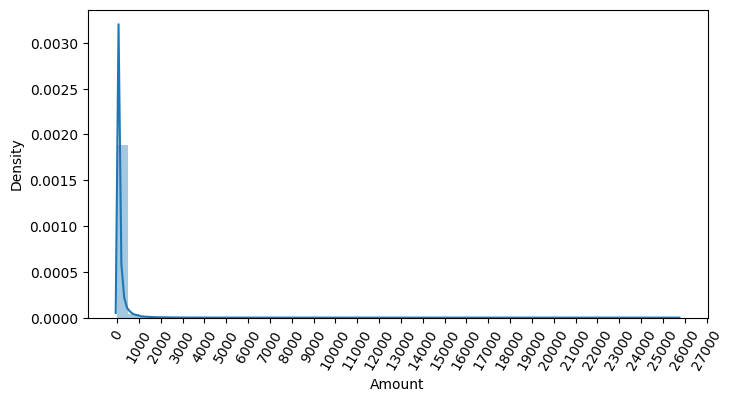

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [12]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [13]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500, F1: 0.8409, AUC:0.9779


In [14]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [15]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635, F1: 0.8496, AUC:0.9796


### 이상치 데이터 제거 후 모델 학습/예측/평가

**IQR(Inter Quantile Range**
<img src=./img/IQR.png width=700>

* Q1(25%), Q3(75%)이고 Q3 - Q1이 IQR이 되며, Q1에서 1.5 * IQR을 빼준 값을 최소 제한, Q3에서 1.5 * IQR을 더해준 값을 최대 제한
* (Q1 - 1.5 * IQR) ~ (Q3 + 1.5 * IQR) 구간을 벗어나는 데이터는 이상치라고 한다

<Axes: >

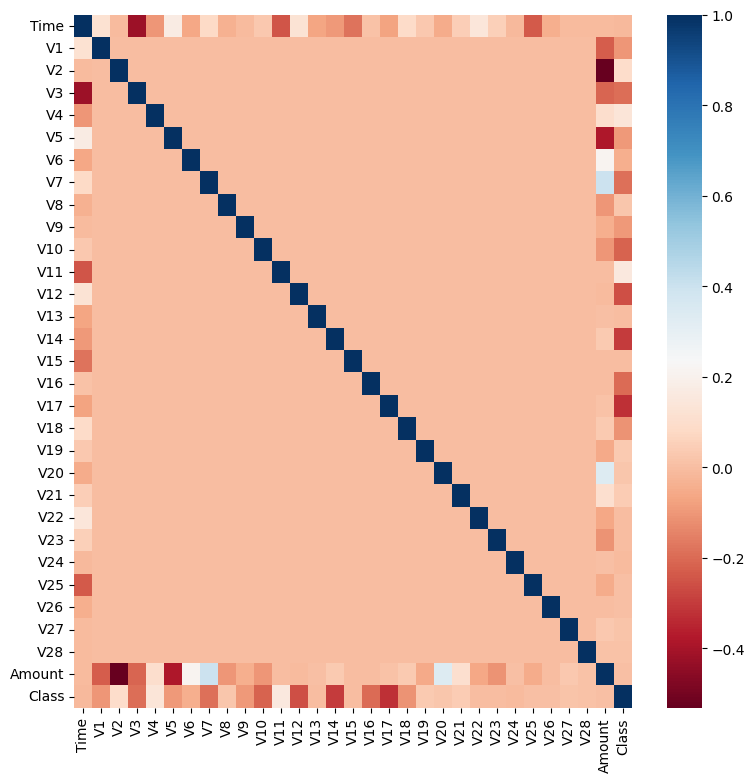

In [16]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [17]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [18]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

''' 4개의 이상치 데이터 추출 '''

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


' 4개의 이상치 데이터 추출 '

In [19]:
outlier_index = get_outlier(df=card_df, column='V17', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

''' 0개의 이상치 데이터 추출 '''

이상치 데이터 인덱스: Int64Index([], dtype='int64')


' 0개의 이상치 데이터 추출 '

In [20]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print("")
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, AUC:0.9743

### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288, F1: 0.8897, AUC:0.9780


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [22]:
lr_clf = LogisticRegression()

# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

# 실제 원본 데이터의 유형보다 너무 많은 Class=1 데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class=1로 적용해 정밀도가 급락

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, AUC:0.9737


In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

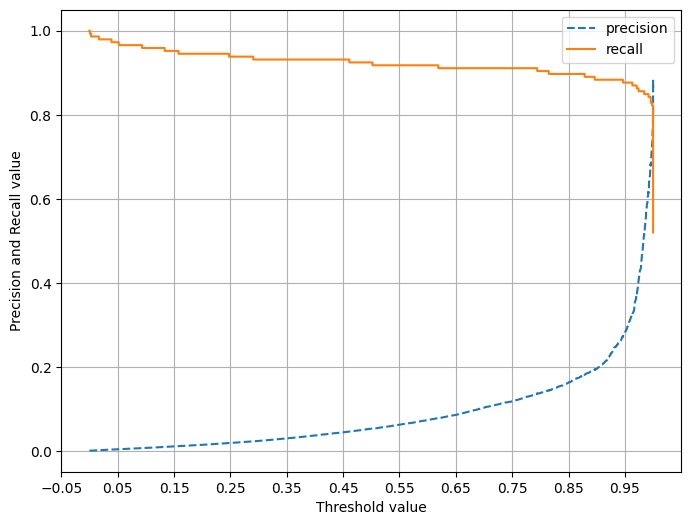

In [24]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, AUC:0.9814


# 10. 스태킹 앙상블(Stacking Ensemble)

**스태킹(Stacking)**

<img src=./img/Stacking_base.png width=700>

    개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅(Bagging)과 부스팅(Boosting)과 공통점을 가지고 있지만, 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 점이 다르다

### 기본 스태킹 모델

In [26]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [27]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [28]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [29]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [30]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [31]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9649


### CV 세트 기반의 스태킹

**CV 세트 기반의 스태킹**

<img src=./img/CV_Stacking.png width=600>

    과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용
    
* **Step 1**

    각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성
    
<br>
    
* **Step 2**

    개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용 데이터 세트를 생성한다. 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측한 최종 테스트 데이터 세트를 생성한다. 

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [33]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [34]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [35]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
